# 使用八种算法对GSE数据集进行聚类，并对比分析不同算法特点


## 一、摘要

我的工作主要包括：

- 数据集的格式转化处理、探索性数据分析，通过利用GEO2R工具、分析数据集的特征分布、统计指标和相关性等信息，对数据集有了初步了解，并确定了要使用的特征。
- 然后，进行了数据集预处理，主要包括处理缺失值和标准化，以确保数据的质量和一致性，为后续的分类任务做好了准备。
- 接着，使用了PCA降维技术，将原始的高维数据转换为低维特征表示。这些降维技术减少了特征的数量，同时保留了数据集中的关键信息，为分类算法的训练和预测提供了更高效的特征表示。
- 在聚类算法方面，尝试了8个常见的分类算法，包括'K-means', 'Mini Batch K-means', 'Hierarchical Clustering', 'DBSCAN', 'OPTICS', 'GMM', 'Mean Shift', 'Affinity Propagation'。使用了网格搜索、肘部法、轮廓图、树形图、轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores等技术和指标对这些算法进行了调参和评估。通过调整参数和评估指标，找到了最佳模型，并对模型性能进行了评估和可视化。
- 最后综合多个算法分类结果，进行了对比分析，判断出了更为适合的聚类算法。


## 二、相关技术

### 2.1 Z-score标准化

- 概念：

    Z-score标准化，也称为标准差标准化或零均值标准化，是一种常用的数据标准化方法。它通过对原始数据进行线性变换，使得数据符合标准正态分布（均值为0，标准差为1），从而消除了原始数据的量纲差异，使得不同特征具有可比性。

- 优点：
    - 保留了原始数据的分布形态，只是进行了线性变换。
    - 将数据转换为以0为均值和1为标准差的标准正态分布，方便进行比较和统计分析。
    - 适用于大多数统计方法和机器学习算法，能够减少不同特征之间尺度差异对结果的影响。

- 步骤：
    1. 计算每个特征列的均值（mean）和标准差（standard deviation）。
    2. 对于每个样本，将特征值减去对应特征列的均值，得到差值（即样本值与均值的差）。
    3. 将差值除以对应特征列的标准差，得到标准化后的值（即差值除以标准差）。
    4. 重复步骤2和步骤3，对所有特征列进行标准化。
    5. 标准化后的数据集即为Z-score标准化后的结果。

    通过Z-score标准化，数据的每个特征都会围绕均值0上下波动，标准差为1，使得数据的分布更接近标准正态分布。这种标准化方法适用于数据分布接近正态分布的情况，并且不会改变数据的分布形状，只是改变了数据的尺度。

    
- Z-score标准化的公式可以表示为：Z = (X - μ) / σ
    
    其中，Z是标准化后的值，X是原始数据，μ是特征列的均值，σ是特征列的标准差。

### 2.2 K-means聚类

- 概念：

    K均值聚类（k-means）是基于样本集合划分的聚类算法。K均值聚类将样本集合划分为k个子集，构成k个类，将n个样本分到k个类中，每个样本到其所属类的中心距离最小，每个样本仅属于一个类，这就是k均值聚类，同时根据一个样本仅属于一个类，也表示了k均值聚类是一种硬聚类算法。K-means的工作方式是定义球形聚类，这些聚类是可分离的，这样平均值就会向聚类中心收敛，正因为如此，K-means有时可能表现不佳。

- K-means聚类的结果是：
    - K组的中心点可用于标记新数据
    - 得到训练数据的标签（每个数据点都被分配到一个聚类）
    
    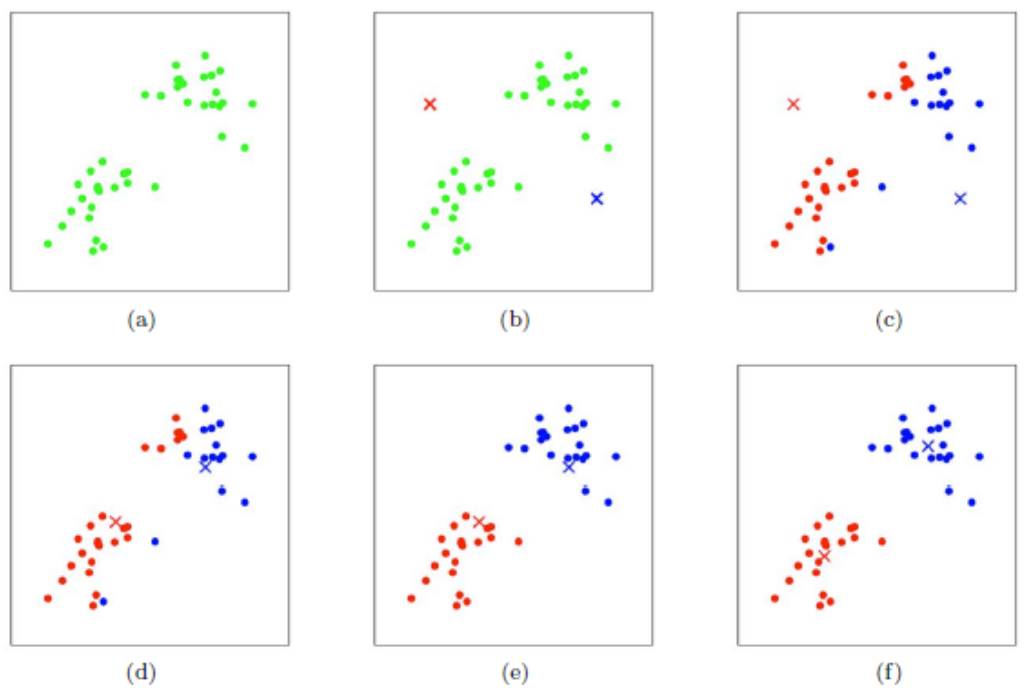

- 步骤：Κ-means聚类算法的输入是聚类数量Κ和数据集。算法从对Κ中心点的初始估计开始，这些中心点可以是随机生成的，也可以是从数据集中随机选择的。然后，该算法在两个步骤之间反复进行：
    1. 数据分配步骤：每个中心点都定义了一个聚类。在这个步骤中，每个数据点根据欧氏距离的平方被分配到其最近的中心点。如果ci是集合C中的中心点的集合，那么每个数据点x都被分配到一个集群中,基于下方公式，其中dist(·)是标准的(L2)欧氏距离：
    \begin{array}{c}
    \min _{c_{i} \in C} \operatorname{dist}\left(c_{i}, x\right)^{2}
    \end{array}
    2. 中心点更新步骤：通过取所有分配到该中心点聚类的数据点的平均值，重新计算中心点。该算法在第一和第二步之间迭代，直到满足停止标准（没有数据点改变聚类，距离之和最小，或达到某些最大迭代次数）。这个算法可能会收敛在一个局部最优上。用随机的起始中心点来评估该算法的一次以上的运行可能会得到更好的结果。

    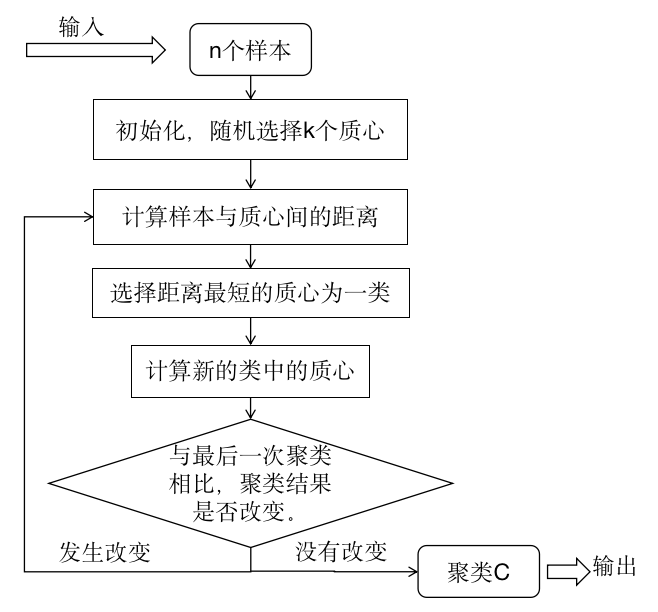
    
    3. 选择参数K：为了得到最佳的聚类数量，K-Means聚类可以使用 Elbow Criterion , Silhouette Coefficient , cross-validation, information criteria, the information theoretic jump method, the G-means algorithm等多种方法进行评估，而在本文中将使用 Elbow Criterion (肘形判据)和Silhouette Coefficient (轮廓系数)。

### 2.3 Mini Batch K-means 聚类
- 概念：

    Mini Batch K-means是一种迭代的聚类算法，它通过将数据集划分为小批量（mini-batch）样本来进行聚类。每个小批量样本都会更新聚类中心，最终得到最优的聚类结果。Mini Batch K-means的原理与K-means类似，都是基于迭代更新聚类中心的思想。

- 步骤：
    1. 初始化聚类中心：随机选择K个数据点作为初始聚类中心。
    2. 从数据集中随机选择一个小批量样本（通常是几百或几千个样本）。
    3. 对于每个样本，计算其与当前聚类中心的距离，并将样本分配给距离最近的聚类中心。
    4. 更新聚类中心：对于每个小批量样本，根据分配给它们的聚类中心，计算该聚类的新中心。
    5. 重复步骤2至步骤4，直到达到指定的迭代次数或收敛条件。

- 与K-means的区别：
    - 计算效率：Mini Batch K-means采用随机采样小批量样本进行聚类，因此相比K-means算法，计算速度更快，尤其适用于大规模数据集。
    - 内存消耗：Mini Batch K-means只需存储小批量样本和聚类中心，内存消耗较少。
    - 聚类质量：由于Mini Batch K-means采用小批量样本进行聚类，因此相对于K-means，聚类质量可能稍微降低，但在实际应用中，往往可以接受这种损失。

    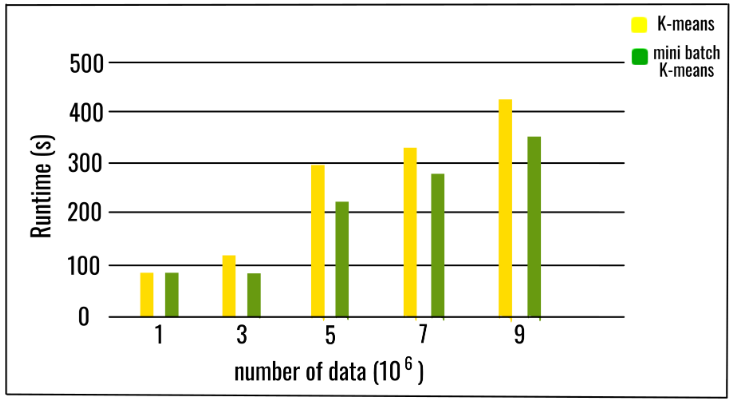

### 2.4 层次聚类
- 概念：

    层次聚类(Hierarchical Clustering)是聚类算法的一种，通过计算不同类别数据点间的相似度来创建一棵有层次的嵌套聚类树，距离越小，相似度越高。层次聚类将先计算样本之间的距离，每次将距离最近的点合并到同一个类，然后再计算类与类之间的距离，将距离最近的类合并为一个大类。不停的合并，直到合成了一个类。创建聚类树有自下而上合并和自上而下分裂两种方法，这两种方法分别称为聚合与分裂：

    - 聚合：这是一种 "自下而上 "的方法：每个观测值都从它自己的聚类开始，随着层次结构的上升，成对的聚类被合并起来
    - 分裂：这是一种 "自上而下 "的方法：所有的观测值都从一个聚类开始，随着层次结构的下移而递归地进行分割树状图将被用于可视化分组的历史，并找出最佳的集群数量。然后利用生成的树状图，我们确定不与其他任何集群相交的最大垂直距离。然后，在两个极端画一条阈值/水平线。最后，集群的最佳数量等于穿过水平线的垂直线的数量。例如，在下面的案例中，集群数量的最佳选择将是4：

    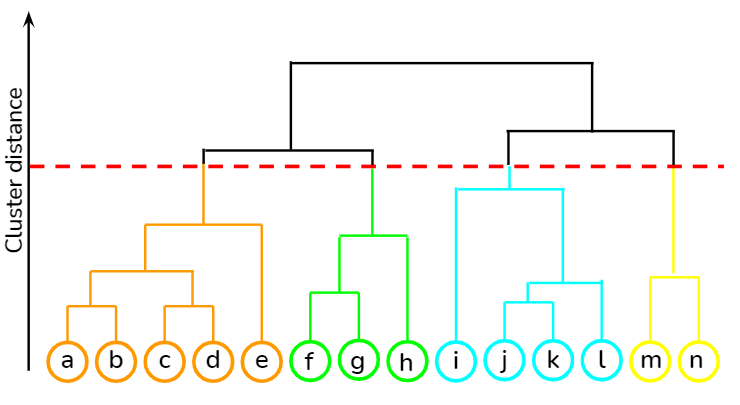

- 步骤：聚合型层次聚类的策略是先将每个对象作为一个簇，然后合并这些原子簇为越来越大的簇，直到所有对象都在一个簇中，或者某个终结条件被满足。绝大多数层次聚类属于聚合型层次聚类，它们只是在簇间相似度的定义上有所不同。 这里给出采用最小距离的聚合层次聚类算法流程：
    1. 将每个对象看作一类，计算两两之间的最小距离；
    2. 将距离最小的两个类合并成一个新类；
    3. 重新计算新类与所有类之间的距离；
    4. 重复第二、三步，直到所有类最后合并成一类。

    比如下图中我们有六个数据点{A、B、C、D、E、F}，在最初的步骤中，我们将所有六个数据点视为单独的聚类，第一步是确定哪些元素要合并到一个聚类中。通常情况下，我们要根据选择的距离，取两个最接近的元素。在这个阶段，我们构建一个距离矩阵，其中第i行第j列的数字是第i和第j元素之间的距离。然后，随着聚类的进行，行和列会随着聚类的合并和距离的更新而合并。B,C和D,E是类似的聚类，在第二步中被合并。再次计算新聚类的接近度，并将相似的聚类合并，形成新的聚类A、BC、DEF。集群DEF和BC是相似的，合并在一起形成一个新的集群。现在我们只剩下两个聚类A，BCDEF。最后，所有的聚类被合并在一起，形成一个单一的聚类:

    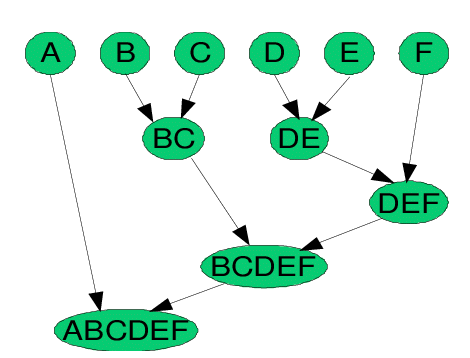

### 2.5 DBSCAN

- 概念：

    DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，它通过将样本点的密度作为聚类的基础，将高密度区域划分为簇，并通过密度可达关系将低密度区域划分为噪音。DBSCAN算法通过定义两个重要的参数：邻域半径(ε)和最小样本数(MinPts)。其中，邻域半径定义了一个样本点的邻域范围，最小样本数定义了一个样本点的核心对象的条件。根据样本点在邻域范围内的密度情况，DBSCAN将样本点分为三类：核心对象、边界点和噪音点。

    例如：图中MinPts=5，红色的点都是核心对象，因为其ϵ-邻域至少有5个样本。黑色的样本是非核心对象。所有核心对象密度直达的样本在以红色核心对象为中心的超球体内，如果不在超球体内，则不能密度直达。图中用绿色箭头连起来的核心对象组成了密度可达的样本序列。在这些密度可达的样本序列的ϵϵ-邻域内所有的样本相互都是密度相连的。

    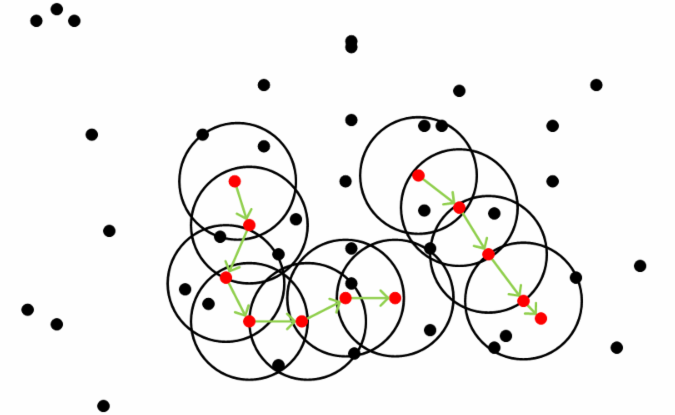

- 步骤：
    1. 初始化：给定数据集和两个参数 ε 和 MinPts。
    2. 随机选择一个未访问的样本点p。
    3. 检查点p的邻域内是否有至少MinPts个样本点。
        - 如果有，将点p标记为核心对象，创建一个新簇，并将邻域内的所有样本点加入簇中。
        - 如果没有，将点p标记为噪音点。
    4. 对于核心对象的每个邻域样本点q：
        - 如果点q未被访问，将点q标记为已访问，并检查点q的邻域内是否有至少MinPts个样本点。
        - 如果有，将邻域内的所有样本点加入当前簇中。
        - 如果没有，继续下一个邻域点的探索。
    5. 重复步骤2至步骤4，直到所有样本点都被访问。
    6. 形成多个簇，每个簇包含核心对象和与其密度可达的边界点。
    7. 所有未被分配到任何簇的样本点被标记为噪音点。

### 2.6 OPTICS



- 概念：

    OPTICS（Ordering Points To Identify the Clustering Structure）是一种密度聚类算法，它基于DBSCAN算法的思想，通过计算每个样本点的可达距离和核心距离来确定聚类结构。OPTICS算法将数据集中的每个样本点与其他样本点进行距离计算，并将其排列成一个有序列表。通过分析有序列表中的距离信息，可以确定样本点的密度可达性，并基于此构建聚类结果。用核心距离判断一个样本是否为core points， 如果核心距离小于等于eps, 则样本为核心样本点；如果核心距离大于eps, 则样本点不是核心样本点，图示如下：

    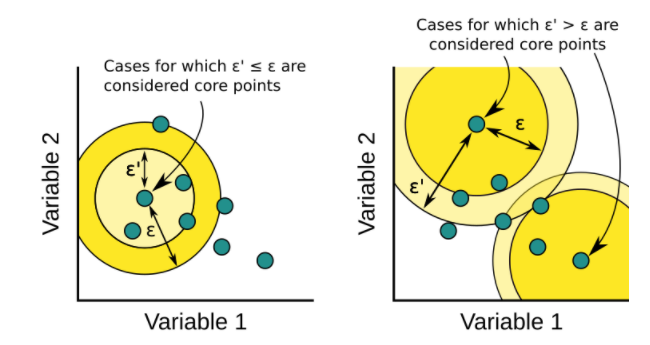

- 步骤：

    1. 初始化：给定数据集和两个参数 ε 和 MinPts。
    2. 对每个样本点计算其与其他样本点之间的距离。
    3. 根据距离信息对样本点进行排序，形成一个有序列表。
    4. 选择一个未访问的样本点p作为当前点。
    5. 检查点p的邻域内是否有至少MinPts个样本点。
        - 如果有，计算点p与其邻域内样本点的可达距离（reachability distance）。
        - 如果没有，将点p标记为噪音点。
    6. 对于核心对象的每个邻域样本点q：
        - 如果点q未被访问，计算点q与其邻域内样本点的可达距离。
        - 如果可达距离小于等于ε，将点q的可达距离作为点q的核心距离（core distance）。
        - 如果可达距离大于ε，将点q的核心距离设为无穷大。
        - 更新点q的可达距离和核心距离。
    7. 根据核心距离对所有样本点进行排序。
    8. 重复步骤4至步骤7，直到所有样本点都被访问。
    9. 根据可达距离和核心距离的信息，形成一个有序列表，表示样本点的聚类结构。
    10. 根据有序列表中的信息划分聚类簇。
    11. 所有未被分配到任何簇的样本点被标记为噪音点。

- OPTICS与DBSCAN的区别：
    - 参数设置：OPTICS不需要事先设置邻域半径，而是通过核心距离来自适应地确定，相比之下，DBSCAN需要明确设置邻域半径。
    - 可达距离图：OPTICS生成了一个可达距离图，其中记录了每个样本点与其他样本点之间的可达距离。DBSCAN没有这样的图。
    - 噪音点和边界点的处理：OPTICS通过聚类的密度可达关系判断噪音点和边界点，而DBSCAN直接将未被分配到任何簇的样本点标记为噪音点。
    - 相比于DBSCAN，OPTICS的优点在于它可以识别不同密度的簇，并且不需要事先设置邻域半径，更适合处理具有变化密度的数据集。然而，由于OPTICS生成的可达距离图相对复杂，其计算复杂度也较高，适用于中小规模的数据集。

    
### 2.7 高斯混合模型

- 概念：

    高斯混合模型（Gaussian Mixture Model，GMM）是一种概率模型，用于对复杂数据集进行建模和聚类。它假设数据集由多个高斯分布组成，每个高斯分布代表一个聚类簇。每个样本点都以一定概率属于不同的聚类簇，而不是确定地归属于某个簇。高斯混合模型通过一些参数来描述数据集的分布，包括聚类簇的数量、每个簇的均值、协方差矩阵和权重。其中，均值和协方差矩阵表示每个高斯分布的形状和位置，权重表示每个簇的重要程度。

- 步骤：

    1. 初始化：确定聚类簇的数量K，并初始化每个簇的均值、协方差矩阵和权重。
    2. E步（Expectation）：计算每个样本点属于每个簇的后验概率，即给定数据点和模型参数条件下，样本点属于每个簇的概率。
    3. M步（Maximization）：根据E步计算得到的后验概率更新每个簇的均值、协方差矩阵和权重，使得似然函数最大化。
    4. 重复执行E步和M步，直到模型收敛或达到指定的迭代次数。
    5. 输出最终的模型参数和样本点的聚类结果。

    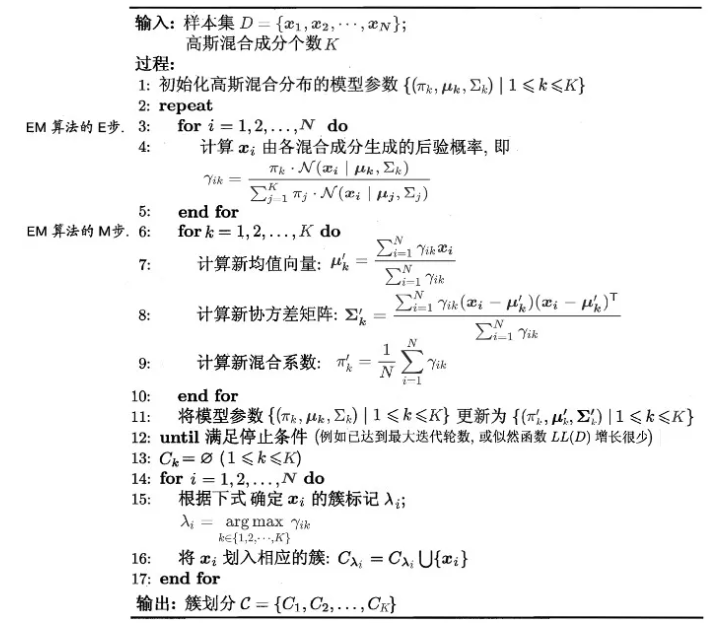

    在E步中，通过使用期望最大化（Expectation-Maximization，EM）算法来计算后验概率。EM算法是一种迭代优化算法，用于求解具有隐变量的概率模型的最大似然估计。在E步中，根据当前的模型参数计算样本点属于每个簇的概率。在M步中，根据E步计算得到的后验概率更新模型参数，使得似然函数最大化。

### 2.8 Mean Shift

- 概念：

    Mean Shift是一种基于密度的非参数聚类算法，它能够自动识别数据中的聚类中心并将数据点分配到相应的聚类中心。相比于传统的基于距离的聚类算法，如K-means，Mean Shift不需要预先指定聚类数量，而是根据数据的密度分布自动确定聚类中心的数量。Mean Shift算法的核心思想是通过不断地更新数据点的位置，将数据点移向其局部密度最大的区域。它的名称"Mean Shift"表示数据点向密度均值的方向移动。具体来说，对于每个数据点，Mean Shift算法计算该点周围数据点的密度，并将该点移动到密度更高的区域，直到达到局部密度的极大值点。

- 步骤：
    
    1. 带宽选择：选择一个合适的带宽参数，用于定义数据点之间的距离。带宽参数决定了数据点的移动步长，它的选择对Mean Shift算法的效果有重要影响。
    2. 密度估计：对于每个数据点，计算其在给定带宽下的邻域内的样本点数量作为密度估计值。常用的密度估计方法是高斯核函数。
    3. 均值漂移：对于每个数据点，计算以该点为中心、以带宽为半径的圆形邻域的质心（mean）。将数据点向质心移动，直到达到局部密度的极大值点。
    4. 聚类中心标记：对于每个收敛的局部密度极大值点，标记为一个聚类中心。
    5. 聚类分配：对于每个数据点，将其分配给距离最近的聚类中心。
    6. 合并聚类：根据需要，对于距离较近的聚类中心进行合并，形成最终的聚类结果。

- 举例如下：

    - 选取中心点（图中蓝色的小圆圈），计算规定范围内（图中蓝色的大圆圈）的Mean shift 向量，图中橘色的小圆圈便是Mean shift计算出的下一个中心点：

    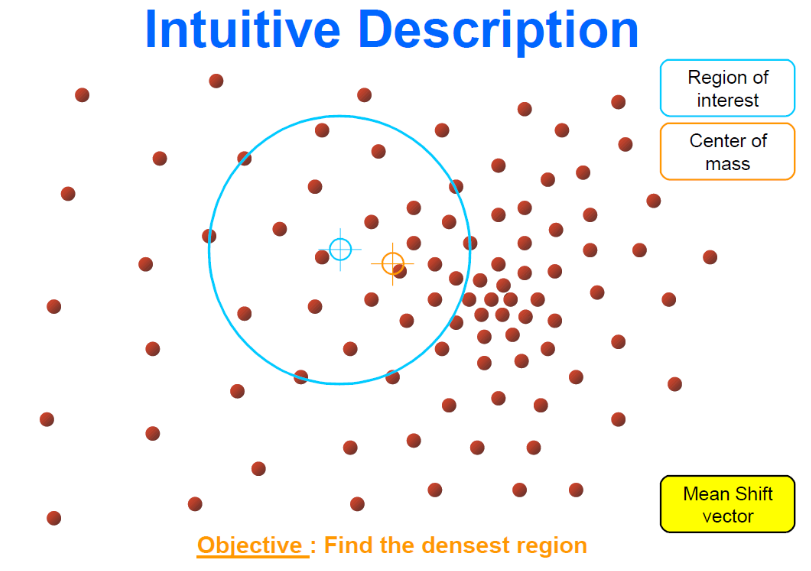

    - 根据计算出的Mean shift 向量，把中心点移动到新的中心点(图中橘色的小圆圈)：

    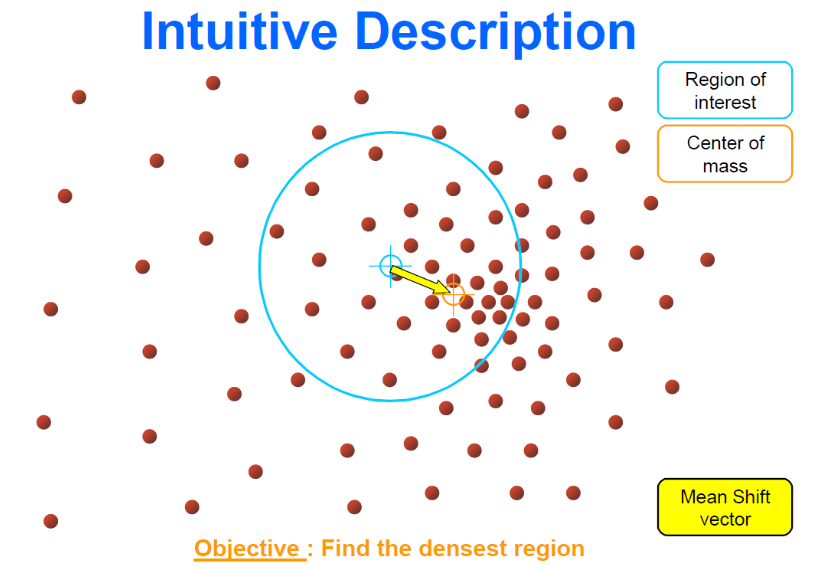

    - 以移动后的位置作为新的中心点（图中蓝色的小圆圈），再一次计算范围内（图中蓝色的大圆圈）的Mean shift 向量，图中橘色的小圆圈便是Mean shift计算出的下一个中心点。：​

    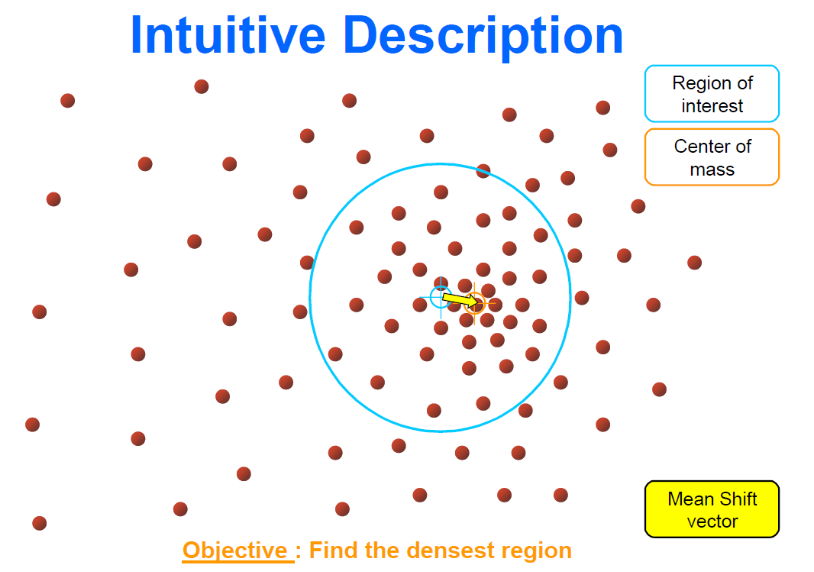

    - 根据计算出的Mean shift 向量，把中心点移动到新的位置：

    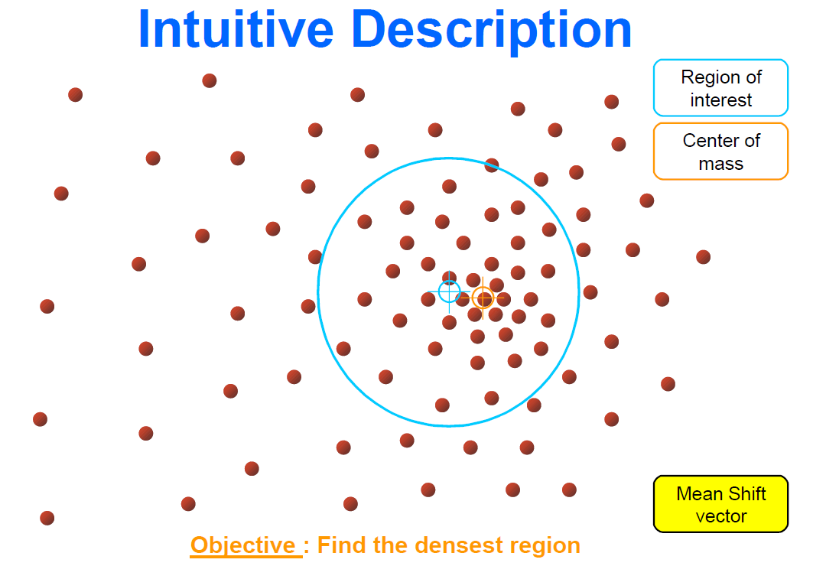

    - 重复上述过程，直至Mean shift 向量收敛，收敛处即为密度的最大处，也是对应的簇中心：

    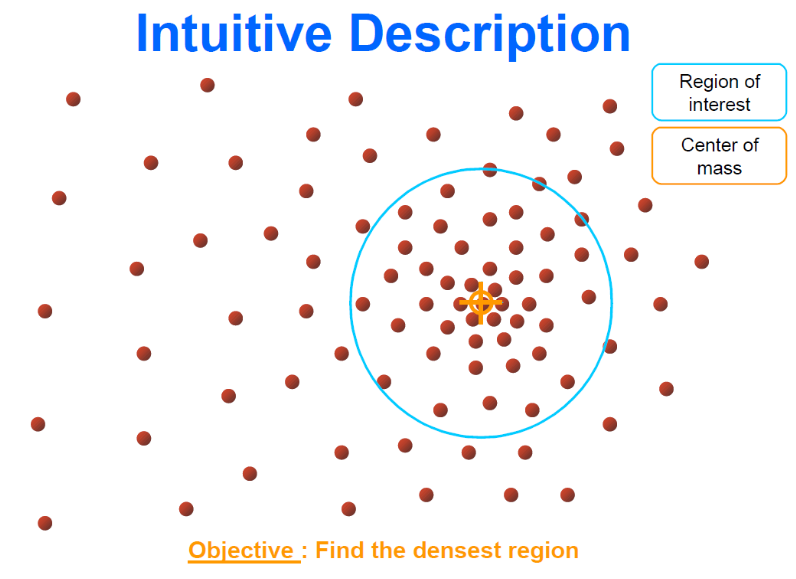

- Mean Shift与DBSCAN的区别：

    - 算法原理：Mean Shift是基于密度的聚类算法，通过数据点在密度上的漂移来寻找聚类中心；而DBSCAN是基于密度的聚类算法，通过寻找密度相连的数据点来形成聚类。
    - 聚类数量：Mean Shift不需要预先指定聚类数量，它通过局部密度的极大值点自动确定聚类中心的数量；而DBSCAN也不需要预先指定聚类数量，它根据数据点的密度连接性来确定聚类数量。
    - 数据分布：Mean Shift对于数据分布的形状不敏感，可以适应任意形状的聚类；而DBSCAN对于高维、不规则形状的聚类效果较好，但在处理数据分布较为均匀的情况下可能存在困难。

### 2.9 Affinity Propagation

- 概念：
    Affinity Propagation是一种基于图模型的聚类算法，它能够自动识别数据中的聚类中心并将数据点分配到相应的聚类中心。相比于传统的基于距离的聚类算法，如K-means，Affinity Propagation不需要预先指定聚类数量，而是通过数据之间的相似度计算自动确定聚类中心的数量。Affinity Propagation算法的核心思想是通过消息传递的方式，同时更新数据点之间的两个消息：responsibility（责任）和availability（可用性）。Responsibility表示数据点希望其它数据点作为聚类中心的程度，Availability表示数据点希望自己被其它数据点选择为聚类中心的程度。通过迭代更新这两个消息，最终收敛到稳定的聚类结果。

    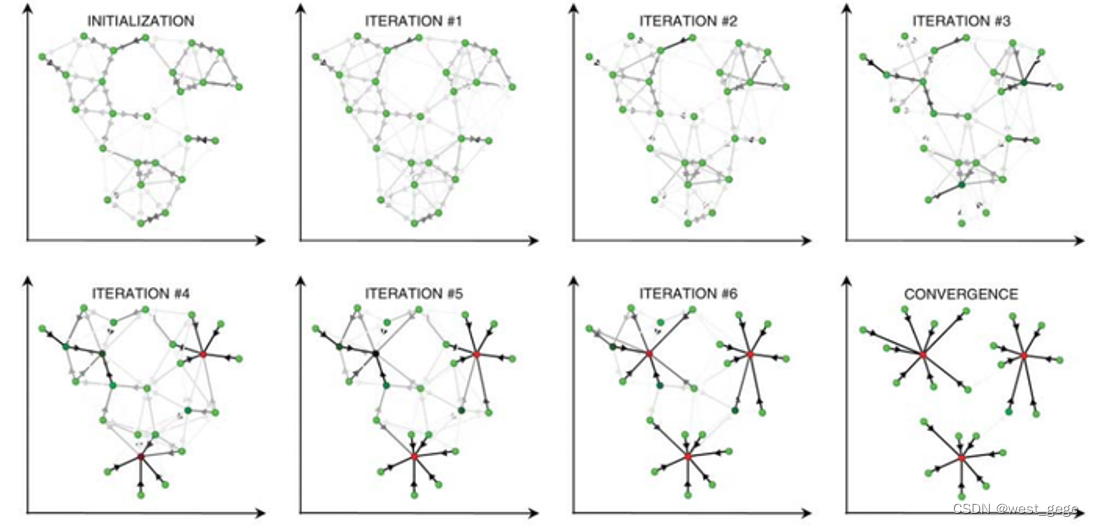

- 步骤：

    1. 相似度矩阵计算：根据数据点之间的相似度，构建一个相似度矩阵。相似度可以使用欧氏距离、相关系数等度量方式计算。
    2. 初始化消息：初始化Responsibility矩阵和Availability矩阵为零矩阵。
    3. 迭代更新消息：
        - 更新Responsibility矩阵：对于每个数据点i，计算其与所有其他数据点j的相似度加上j的Availability的和的最大值，作为数据点i选择数据点j作为聚类中心的程度。
        - 更新Availability矩阵：对于每个数据点i，根据Responsibility矩阵和数据点j的Responsibility矩阵，更新数据点i选择数据点j作为聚类中心的程度。
        - 更新Responsibility和Availability矩阵：根据前两步的更新结果，更新Responsibility和Availability矩阵。
        - 重复上述步骤直到收敛（达到最大迭代次数或Responsibility和Availability的变化小于阈值）。
    4. 聚类结果确定：根据Responsibility矩阵和Availability矩阵，确定数据点的聚类结果。将Responsibility矩阵中最大值对应的数据点作为聚类中心，将选择该聚类中心的数据点划分到对应的聚类中心。

### 2.10 评估指标

1. 轮廓系数（Silhouette Coefficient）：
    - 轮廓系数是一种衡量聚类结果紧密度和分离度的指标。对于每个数据点，轮廓系数计算其与同簇内的平均距离（a）和与最近簇内的平均距离（b），并通过以下公式计算轮廓系数：轮廓系数 = (b - a) / max(a, b)

    轮廓系数的取值范围在[-1, 1]之间，值越接近1表示聚类结果越好，值越接近-1表示聚类结果较差。

2. Calinski-Harabasz指数（Calinski-Harabasz Index）：
    - Calinski-Harabasz指数是基于簇内的离散度和簇间的分离度来评估聚类结果的紧密度和分离度的指标。指数计算方法如下：CH = (B / W) * (N - K) / (K - 1)
    
    B是簇间离散度，W是簇内离散度，N是数据点总数，K是簇的数量。Calinski-Harabasz指数的取值越大表示聚类结果越好。

3. Davies-Bouldin指数（Davies-Bouldin Index）：
    - Davies-Bouldin指数衡量簇内的紧密度和簇间的分离度，值越小表示聚类结果越好。指数的计算方法如下：DB = (1 / K) * Σ(Ri + max(Rj))，其中i和j表示不同的簇，Ri是簇内的紧密度，max(Rj)是簇间的分离度。

    Davies-Bouldin指数的取值范围在[0, +∞)，值越小表示聚类结果越好。

4. Rand index兰德指数（Rand Index）：
    - 兰德指数是一种衡量聚类结果与真实标签之间的相似度的指标。它将聚类结果与真实标签进行比较，计算聚类结果中的数据点对的相似度与真实标签中的数据点对的相似度的一致性。
    
    兰德指数的取值范围在[0, 1]之间，值越接近1表示聚类结果与真实标签越一致。

5. Fowlkes-Mallows scores（FM指数）：
    - Fowlkes-Mallows scores是一种衡量聚类结果与真实标签之间的相似度的指标，类似于兰德指数。它通过计算聚类结果中的数据点对的相似度与真实标签中的数据点对的相似度的精确度和召回率来评估聚类结果的质量。

    FM指数的取值范围在[0, 1]之间，值越接近1表示聚类结果与真实标签越一致。

## 三、数据集分析与预处理

### 3.1 GEO2R

上次使用GEO2R功能时出现了一些bug，误以为是因为输入数据的某些方面与GEOquery、limma 或 DESeq2 软件包不兼容，<mark>但是在看到有同学成功运行后，便请教得知：是因为样本过大分析无法完成，需要减少标记的样本数量，于是重新使用GEO2R工具进行分析，并仅选取每类的1/5进行标记。</mark>

- 定义样本组：按照使用要求，先定义测试组(control->non cancer)，然后定义控制组(3组：breast cancer , prostate disease , benign breast disease) ，这样，对数折叠更改方向将遵循与对照组相比。

- 将样本分配给每个组：通过单击表标题对列进行排序后通过将光标拖到连续的样本上或使用 Ctrl 或 Shift 键，可以突出显示多行。 突出显示相关样本后，单击组名称以将这些样本分配给组。对每组重复此操作，得到分组结果如下：

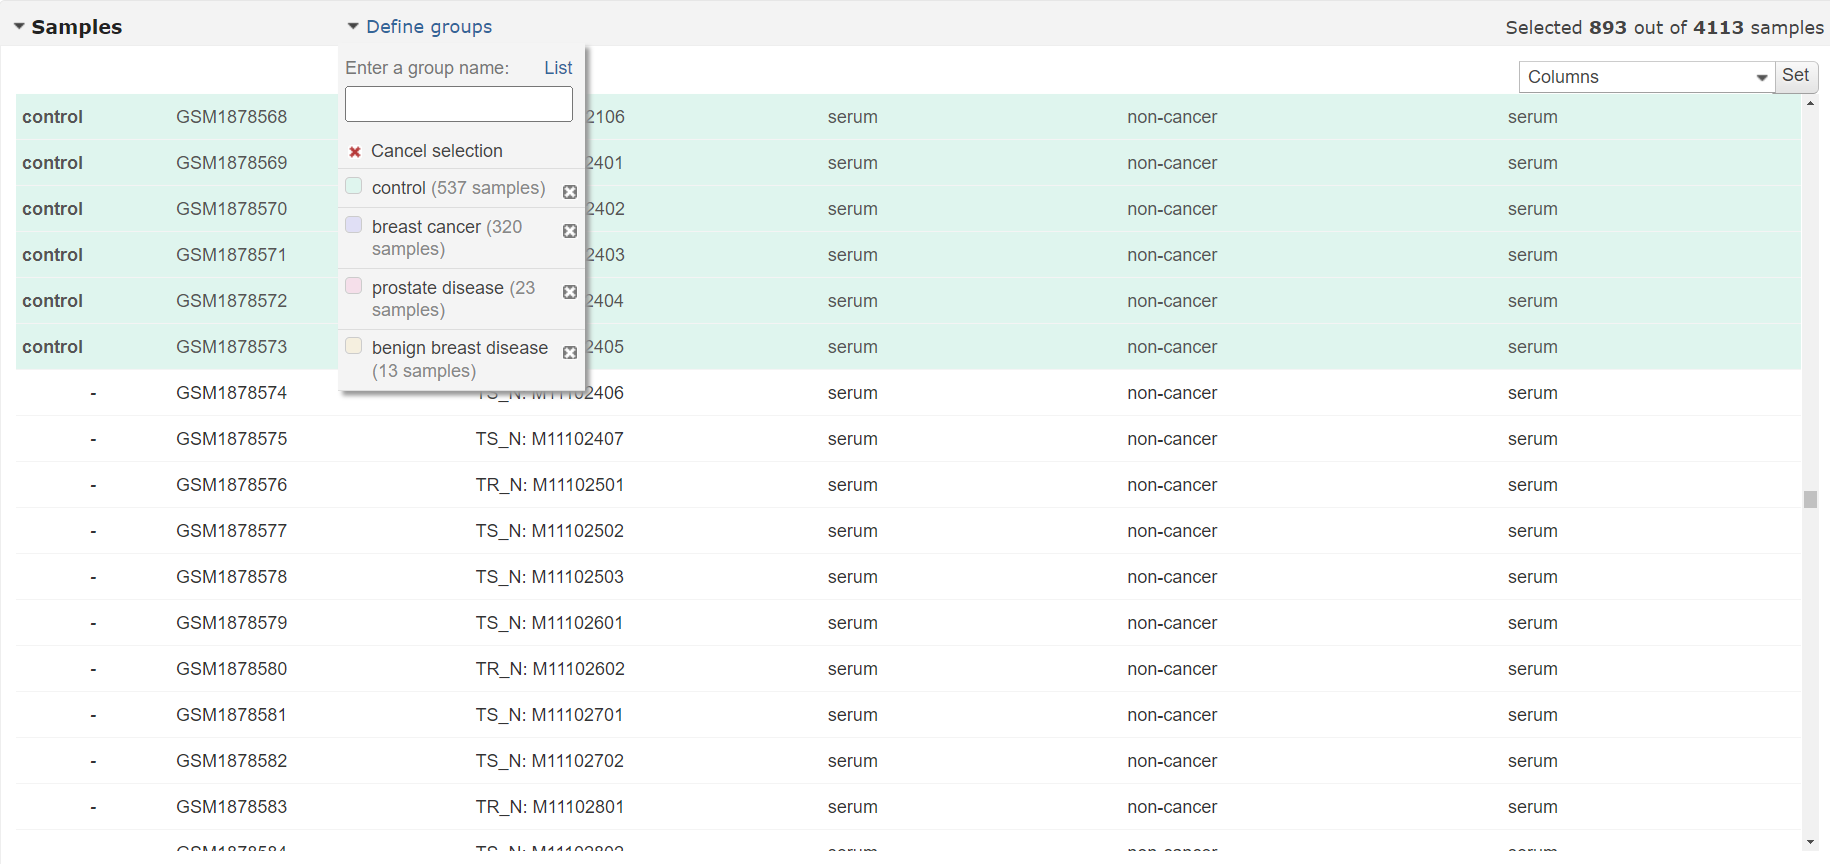

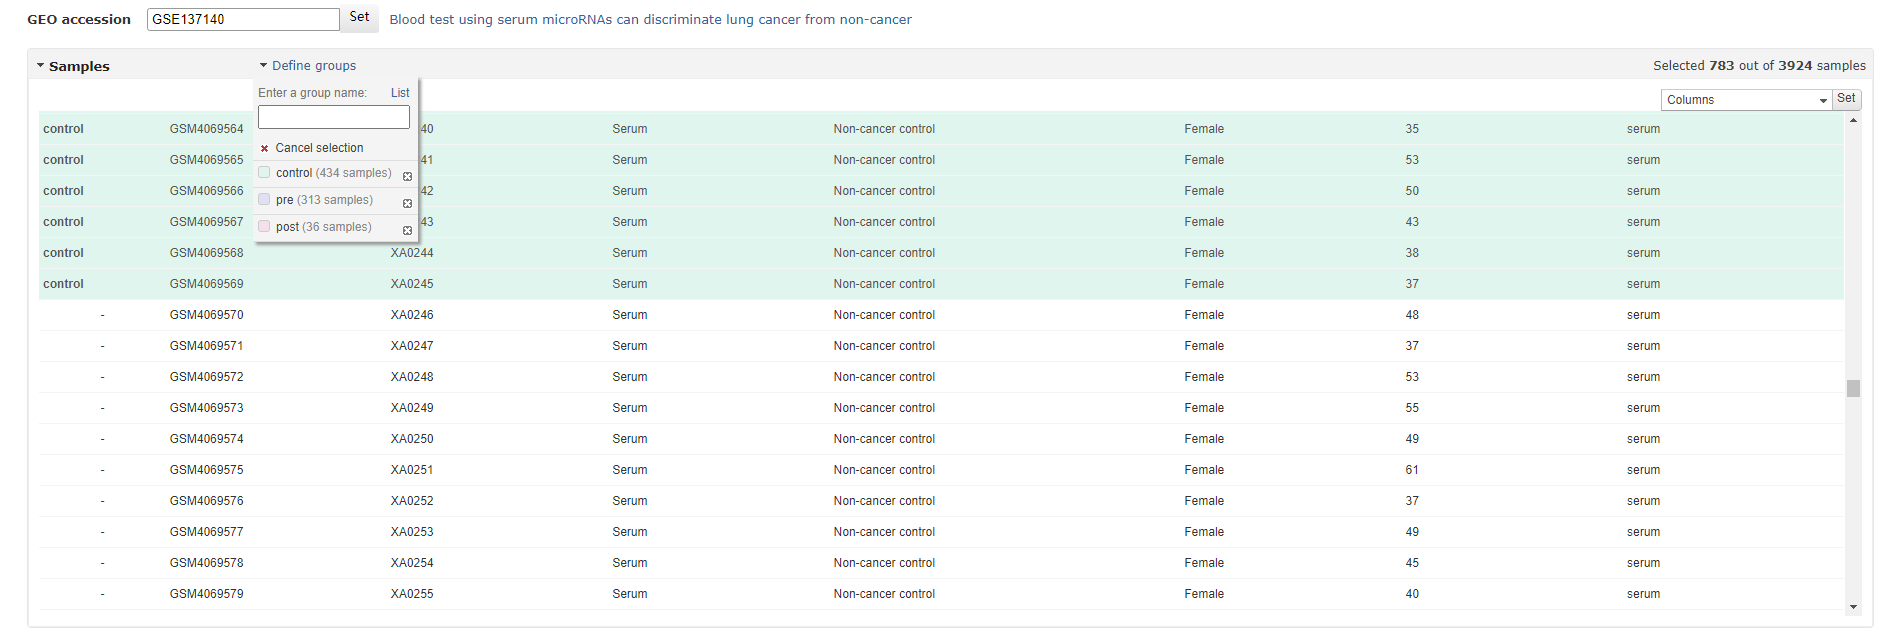

- 执行分析：
1. 显著差异基因列表：结果显示为按 P 值排名的前 250 个基因的表格。单击其中某一行，可以显示该基因的基因表达谱图：

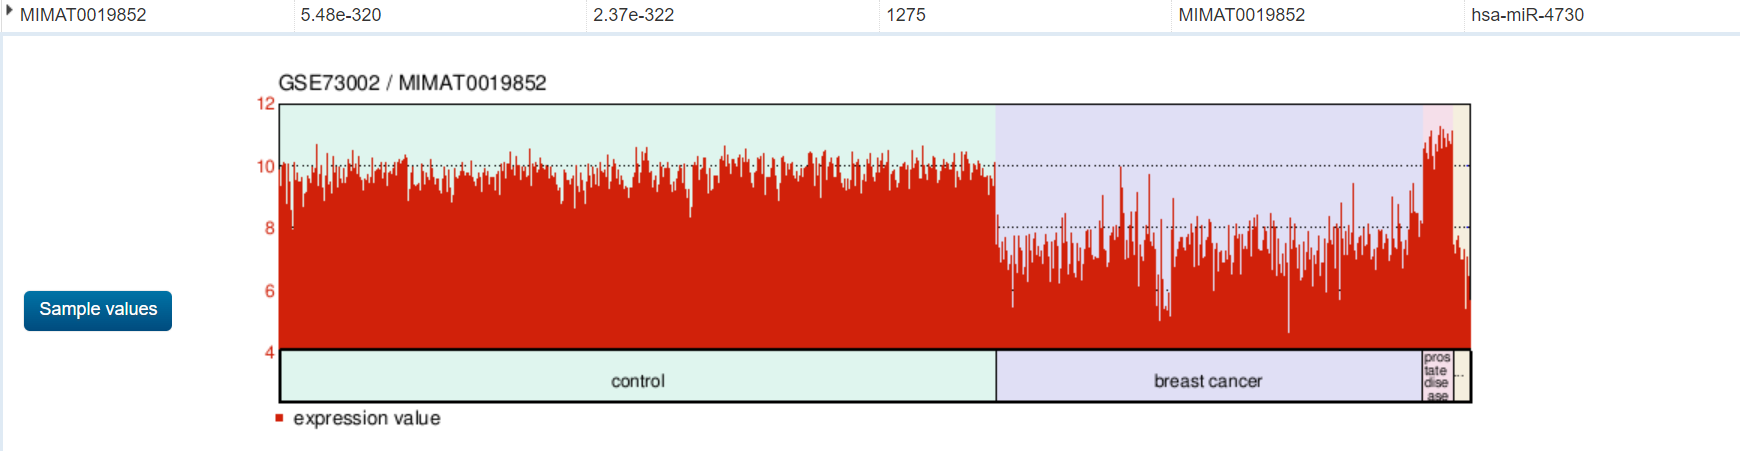

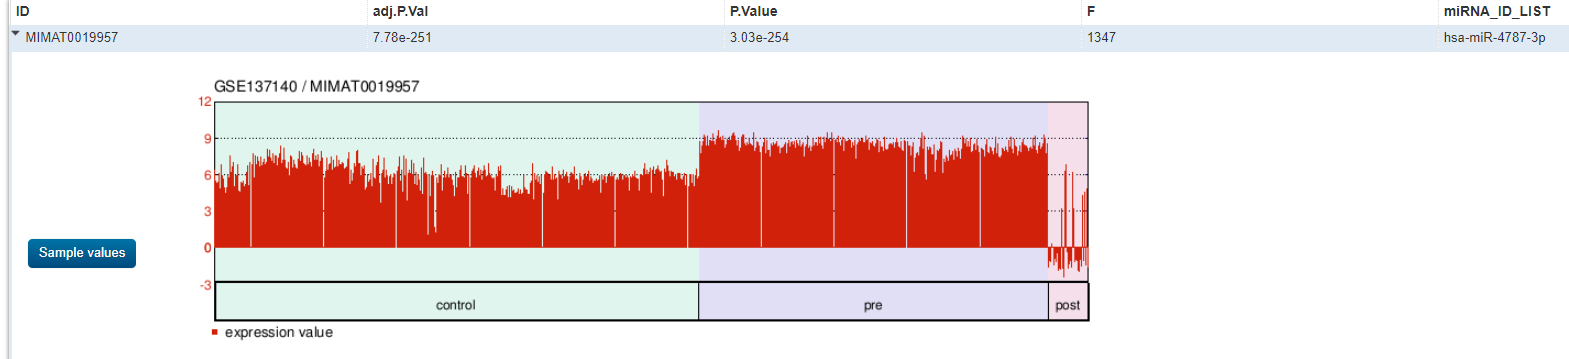

2. 火山图：图中每一个点代表一个基因，由 limma（volcanoplot）算法生成，火山图可以显示统计显著性（-log10 P 值）与变化幅度（log2 倍变化）的对比，可用于可视化差异表达的基因：

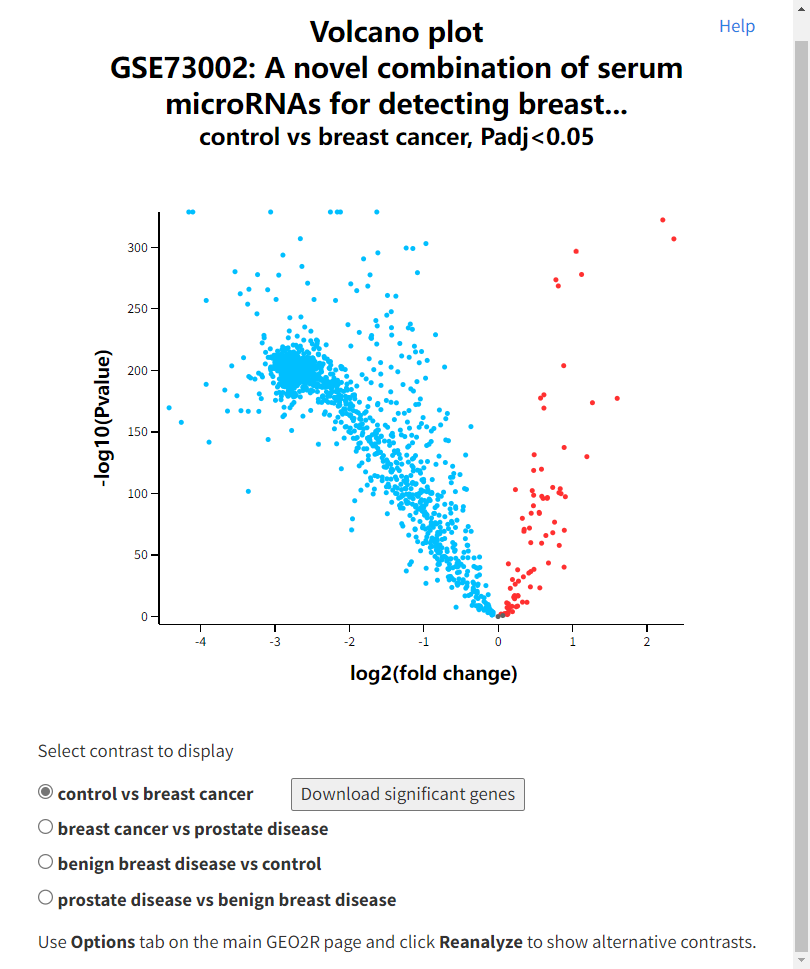

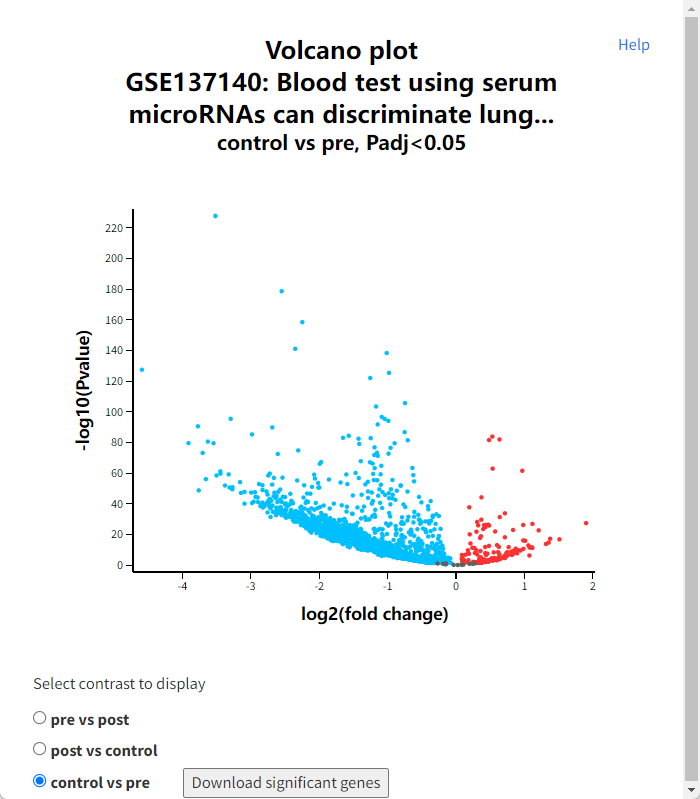

3. 平均差图：使用 limma（plotMD）包生成的平均差（MD）图可以显示 log2 倍数变化与平均 log2 表达值之间的关系，用于可视化差异表达的基因：

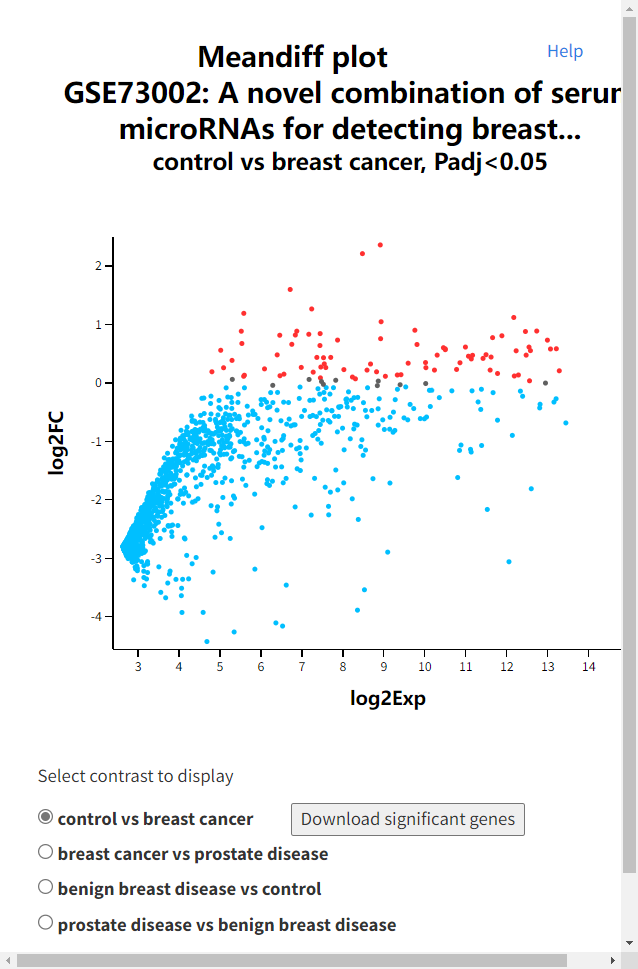

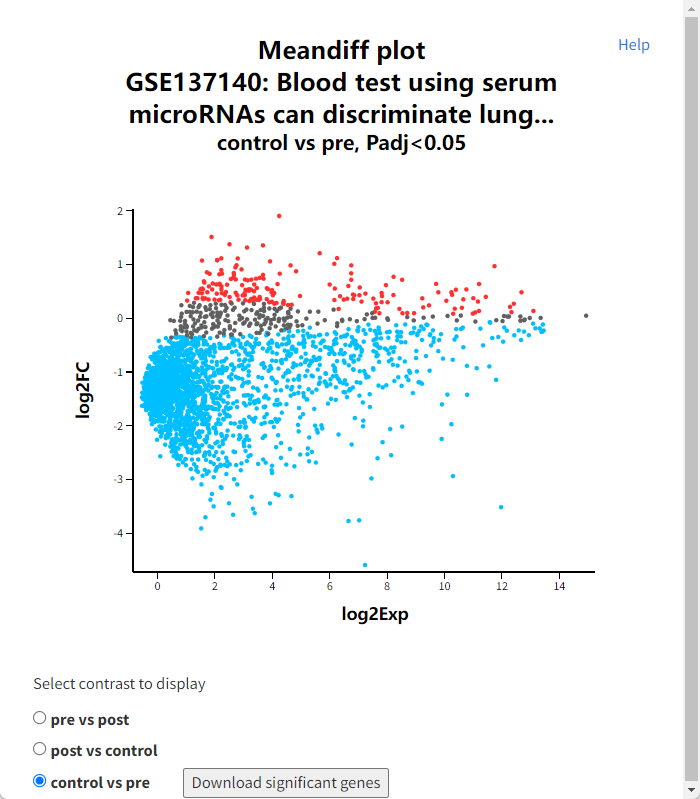

4. UMAP 图：可以帮助判断，定义的样本是否整体上确实存在比较明显的差别：

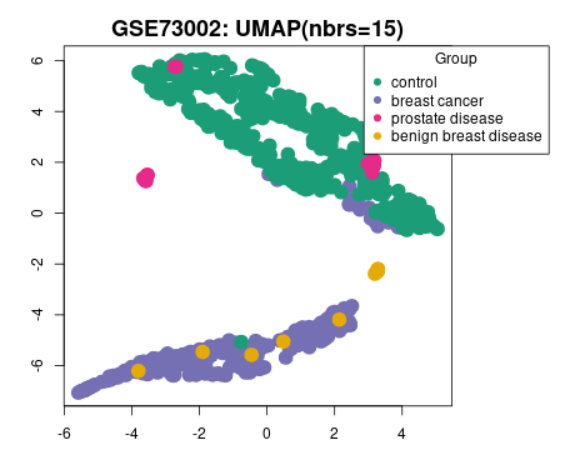

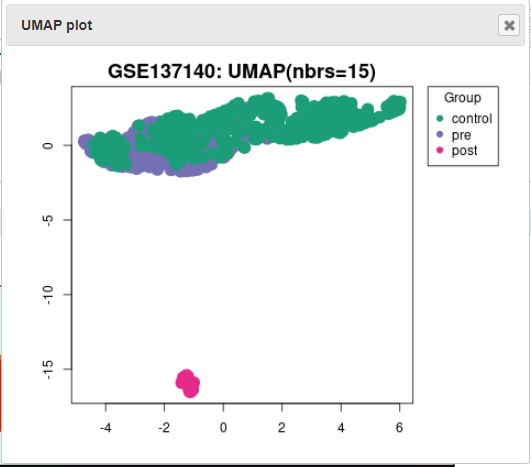

5. 维恩图：使用 limma（vennDiagram）算法生成，用于研究多个组别之间重要基因的重叠关系：

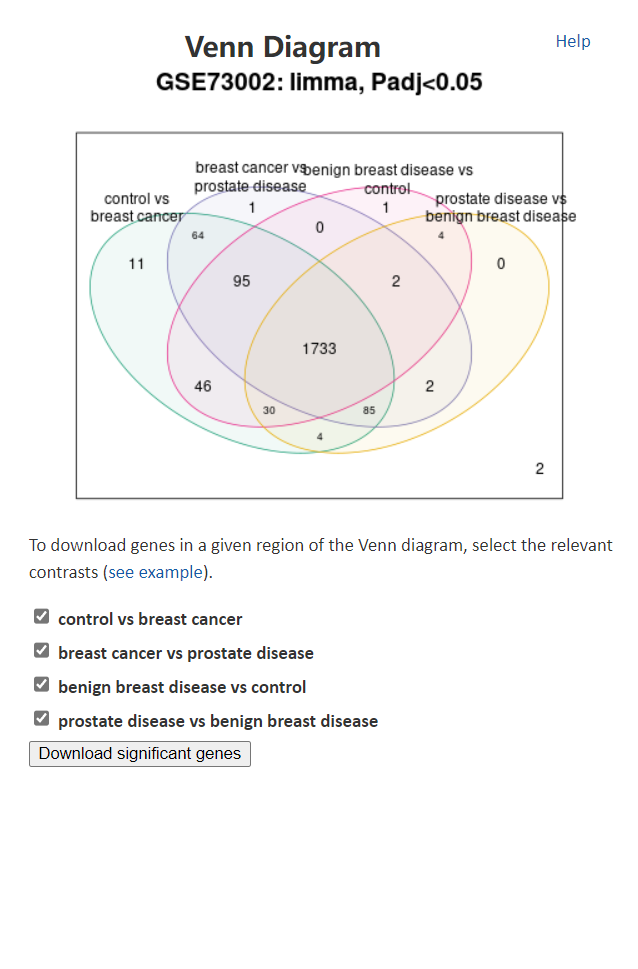

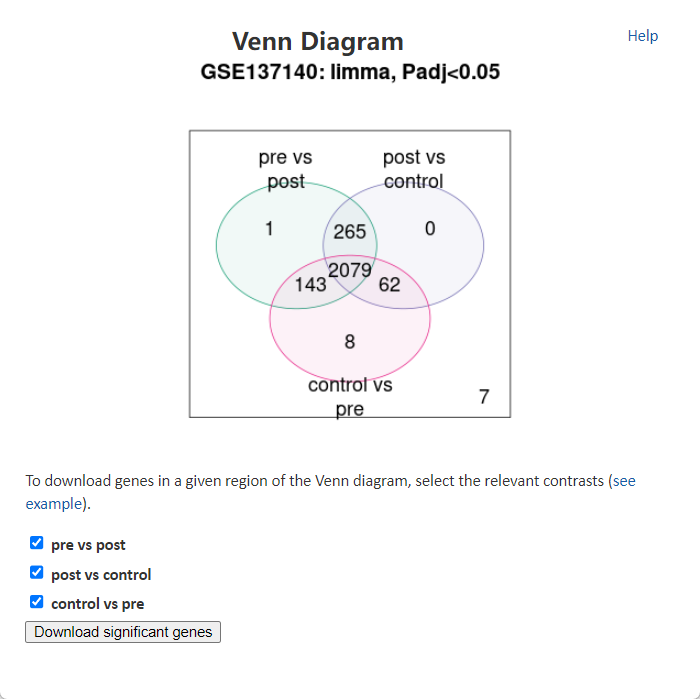

6. 箱线图：使用 R boxplot 算法生成，用于查看所选样本的值分布。查看分布对确定我们选择的样本是否适合差异表达分析很有帮助。通常来说，以中位数为中心的值表示数据已标准化且可交叉比较：

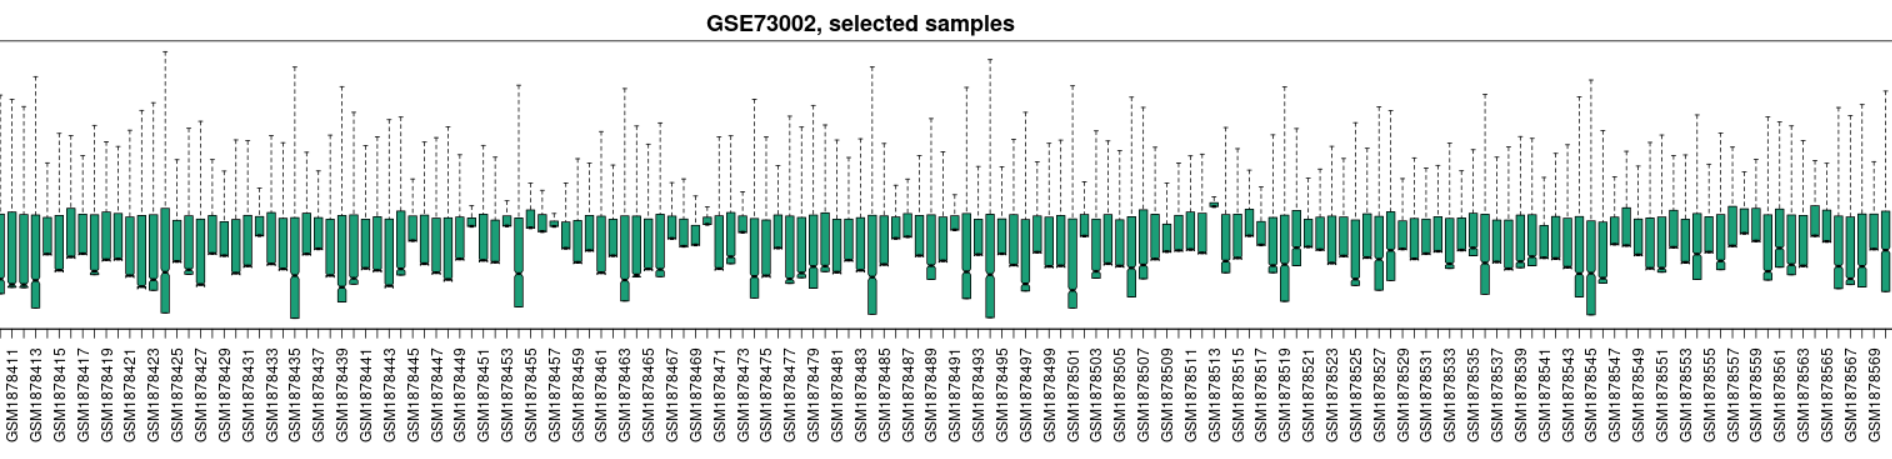

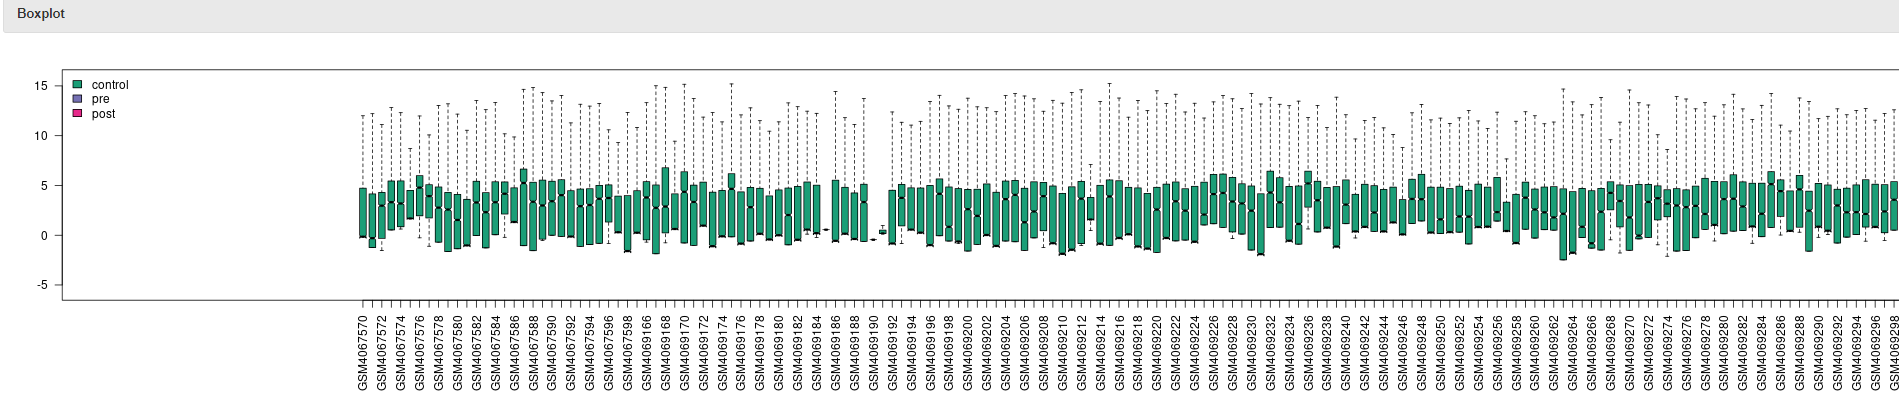

7. 表达密度图：使用 R limma（plotDensities）算法生成，用于在差异表达分析之前检查数据归一化，如果每个样品的密度曲线差异很大，则可以考虑在强制规范化：

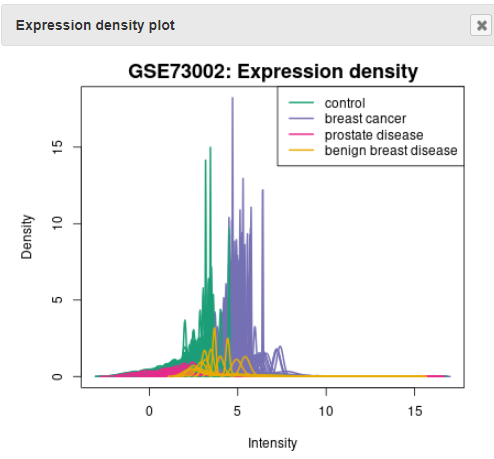

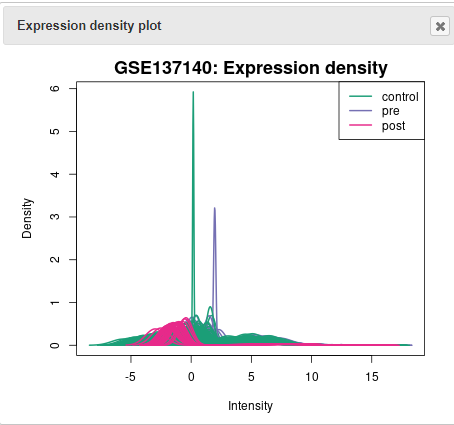

8. 样本分位数图：使用 limma（qqt）算法生成，根据 t 分布的理论分位数绘制数据样本的分位数。理想情况下，这些点应沿一条直线上，这会表明在测试过程中计算出的调节 t 统计量的值遵循其理论预测的分布：

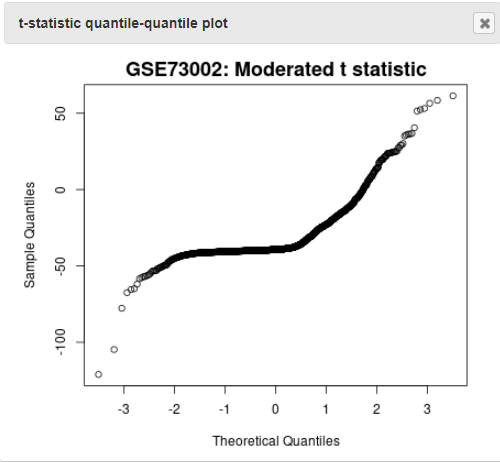

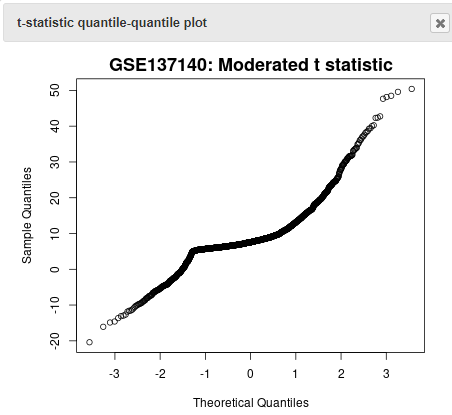

9. 平均方差趋势图：使用 R limma（plotSA， vooma）算法生成，拟合线性模型后，平均方差趋势图可以检查表达数据的均值-方差关系，它可以帮助显示数据间是否变化过大。当存在很强的均方差趋势时，精确权重可提高测试结果的准确性：

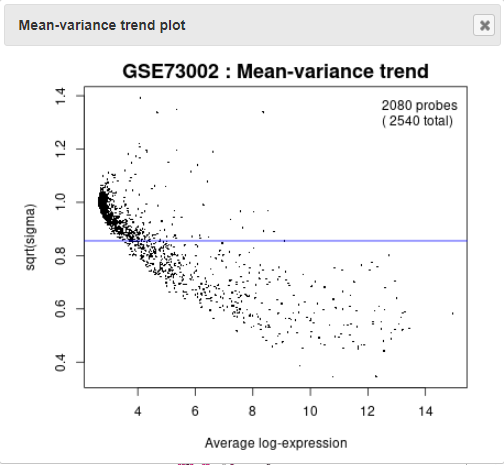

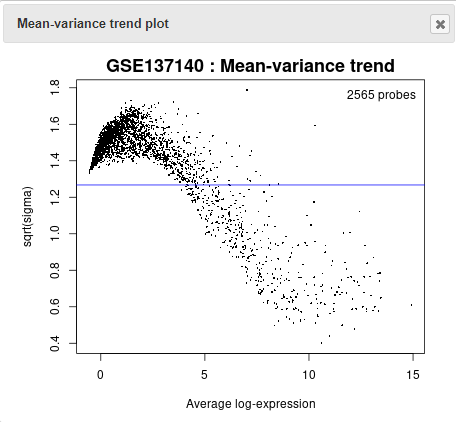

### 3.2 数据集分析

<mark>由于上次已经对数据集结构、类型、缺失值情况、特征相关性进行了分析，所以本次不再赘述，而是结合GEO2R结果更新对数据集特点的分析结果：</mark>

- 缺失值：仅有GSE73002数据集存在缺失值，GSE137140数据集不存在缺失值
    - 处理方式：删除GSE73002数据集含有4个以上缺失值的样本，对于缺失值小于等于4的样本使用均值填充的方法进行填充
- 左偏分布/右偏分布：由箱线图可以看出很多项并未呈正态分布，数据存在较大的偏斜或不均衡
    - 处理方式：进行数据标准化或归一化的操作

### 3.3 格式预处理
<mark>本文中将上次的代码进行封装优化，以实现复用，减少重复内容。</mark>
- 导包：

In [307]:
import csv
import re
import pandas as pd
import shutil

- 定义pretreatment函数，对原文件进行split，转置，替换等系列操作：

In [308]:
def pretreatment(filename, output_filename, reference_filename):
    # 1.删除文件中不需要的注解信息
    with open(filename, 'r') as file:
        content = file.readlines()
    new_content = [] # 创建一个空的列表，用于存储删除注解信息后的行数据
    # 遍历文件内容的每一行
    for line in content:
        line = line.strip() # 去除行首尾的空白字符
        # 检查行是否以"!"开头，或者是否为空行
        if not line.startswith('!') and line != '':
            new_content.append(line + '\n')
    # 将删除注解信息后的数据写入新的文件中
    with open(filename, 'w') as file:
        file.writelines(new_content)

    # 2."MIMAT0004806, MIMAT0022738, MIMAT0022740", split to three lines keep data
    with open(filename, 'r') as file:
        content = file.readlines()
    new_content = [] # 创建一个空的列表，用于存储拆分后的行数据
    # 遍历文件内容的每一行
    for line in content:
        # 检查第一列是否包含逗号
        if ',' in line.split('\t')[0]:
            values = line.split('\t')[0].split(',') # 拆分第一列，并创建多行数据
            # 遍历新创建的多行数据，并替换第一列的值
            for value in values:
                new_line = line.replace(line.split('\t')[0], value.strip())
                new_content.append(new_line)
        # 如果第一列不包含逗号，则直接将该行数据添加到列表中
        else:
            new_content.append(line)
    # 将拆分后的数据写入新的文件中
    with open(filename, 'w') as file:
        file.writelines(new_content)

    # 3.将文件转置并转换为.csv文件
    with open(filename, 'r') as file:
        content = file.readlines()
    transposed_data = zip(*[line.strip().split('\t') for line in content]) # 转置数据
    transposed_data = [[value.strip('"') for value in row] for row in transposed_data] # 去除双引号
    # 将转置后的数据保存为 CSV 文件
    with open(output_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(transposed_data)

    # 4."MIMAT0000062" -> hsa-let-7a-5p via mature.fa
    data = pd.read_csv(output_filename)
    mapping = {} # 创建一个字典，用于存储特征名称和替换名称的映射关系
    with open(reference_filename, "r") as f:
        # 遍历mature.fa文件的每一行
        for line in f:
            # 检查行是否以">"开头
            if line.startswith(">"):
                match = re.match(r">(\S+)\s+(\S+)", line) # 使用正则表达式匹配特征名称和替换名称
                # 如果匹配成功，则将特征名称和替换名称添加到字典中
                if match:
                    replacement_name = match.group(1)
                    feature_name = match.group(2)
                    mapping[feature_name] = replacement_name
    data.rename(columns=mapping, inplace=True) # 替换列名
    data.to_csv(output_filename, index=False) # 保存替换后的数据为新的CSV文件

- 定义文件位置，调用pretreatment函数，依次处理两个数据集：

In [309]:
# 处理GSE73002数据集的格式
def process_73002():
    file_name = "Data/GSE73002_series_matrix.txt"
    file_name_copy = "Data/GSE73002_copy.txt"
    output_filename = "Data/GSE73002.csv"
    reference_filename = "Data/mature.fa"
    shutil.copyfile(file_name, file_name_copy)
    pretreatment(file_name_copy, output_filename, reference_filename)

# 处理GSE137140数据集的格式
def process_137140():
    file_name = "Data/GSE137140_series_matrix.txt"
    file_name_copy = "Data/GSE137140_copy.txt"
    output_filename = "Data/GSE137140.csv"
    reference_filename = "Data/mature.fa"
    shutil.copyfile(file_name, file_name_copy)
    pretreatment(file_name_copy, output_filename, reference_filename)

process_73002()
process_137140()

- 依次打印两个数据集，查看格式处理结果：

In [310]:
data = pd.DataFrame(pd.read_csv('Data/GSE73002.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(4113, 2563)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM1876422       3.582417       3.582417       3.582417       3.582417   
1  GSM1876423       2.218250       2.218250       2.218250       2.218250   
2  GSM1876424       3.844989       4.320819       3.844989       5.023958   
3  GSM1876425       4.625125       4.625125       4.625125       4.625125   
4  GSM1876426       5.176016       5.176016       5.176016       5.176016   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       3.582417       3.582417        3.582417       3.582417       3.582417   
1       2.218250       2.218250        2.218250       2.218250       2.218250   
2       3.844989       3.844989        5.506825       6.111806       3.844989   
3       4.625125       4.625125        4.625125       4.625125       4.625125   
4       5.176016       5.176016        5.176016       5.176016       5.176016   

   ...  hsa-miR-128-2-5p  hsa-miR-1199-5p  hsa-miR-1199-3p  hsa-miR-548ba  \
0  ...         12.170751         5.235212         3.582417       3.582417   
1  ...         11.922791         5.677817         2.218250       2.218250   
2  ...         11.277825              NaN         3.844989       3.844989   
3  ...         11.920829         4.625125         4.625125       4.625125   
4  ...         11.544950         5.176016         5.176016       5.176016   

   hsa-miR-7973  hsa-miR-7974  hsa-miR-7975  hsa-miR-7976  hsa-miR-7977  \
0      3.582417      3.582417      6.344336      3.582417      7.444098   
1      2.218250      2.218250      7.606908      4.419750      7.980262   
2      3.844989      3.844989      7.987828      4.102383      8.650182   
3      4.625125      4.625125      7.076282      4.625125      8.035574   
4      5.176016      5.176016      8.547952      5.176016      8.663436   

   hsa-miR-7978  
0      3.582417  
1      2.218250  
2      3.844989  
3      4.625125  
4      5.176016  

[5 rows x 2563 columns]

In [311]:
data = pd.DataFrame(pd.read_csv('Data/GSE137140.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(3924, 2589)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM4067570       4.393092       6.306405       5.736186       3.923085   
1  GSM4067571       3.817744      -1.240936       3.740098       2.193073   
2  GSM4067572       3.779668       3.997013       0.503678       3.724792   
3  GSM4067573       5.537473       1.593298       3.843516       5.464836   
4  GSM4067574       5.953741       3.073890       0.853141       4.977867   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       4.903123      -0.152745       -0.152745      -0.152745       3.958537   
1       2.147514       3.169063        3.485990       3.674215       5.033756   
2       1.606391       3.221160        2.860850       4.332943       4.093647   
3       0.530399       2.489050        3.275917       0.530399       5.951552   
4       0.853141       6.203541        0.853141       0.853141       0.853141   

   ...  hsa-miR-301b-5p  hsa-miR-1249-5p  MIMAT0032110  hsa-miR-548ad-5p  \
0  ...        -0.152745         5.312396     -0.152745         -0.152745   
1  ...         1.314120         6.919166     -1.240936         -1.240936   
2  ...        -1.353647         6.632532     -1.531527         -1.531527   
3  ...         0.530399         7.903956      4.832157          0.530399   
4  ...         3.142655         8.361825      0.853141          0.853141   

   hsa-miR-548ae-5p  hsa-miR-4485-5p  hsa-miR-8485  hsa-miR-9500  \
0         -0.152745         7.239878      3.096798     -0.152745   
1         -1.240936         6.827426      4.358254      2.766291   
2         -1.531527         5.173705      4.844177      1.146725   
3          0.530399         6.444462      4.290578      0.530399   
4          0.853141         3.301567      0.853141      0.853141   

   hsa-miR-548bb-5p  hsa-miR-548bb-3p  
0         -0.152745          0.252979  
1         -1.240936         -1.240936  
2         -1.531527         -1.531527  
3          4.570456          4.113035  
4          0.853141          0.853141  

[5 rows x 2589 columns]

- 提取数据集的label列，便于用相关评估指标分析聚类结果

In [312]:
with open('Data/GSE73002_series_matrix.txt', 'r') as file:
    content = file.readlines()
labels = [] # 创建一个空列表，用于存储提取出的标签
# 遍历文件内容，查找包含"diagnosis:"的行，并提取标签
for line in content:
    if line.startswith('!Sample_characteristics_ch1'):
        line = line.strip().split('\t')  # 去除行首尾的空白字符，并按制表符分隔行数据
        for item in line:
            if 'diagnosis: ' in item:
                label = item.replace('diagnosis: ', '')  # 去除标签中的前缀"diagnosis: "
                label = label.strip('"')  # 去除标签中的双引号
                labels.append(label)
df = pd.DataFrame(labels, columns=['diagnosis'])  # 将标签数据转为DataFrame，列名为'diagnosis'
df.to_csv('Data/GSE73002_labels.csv', index=False)  # 保存为.csv文件
print(df.shape)  # 输出数据的行数和列数

(4113, 1)


In [313]:
with open('Data/GSE137140_series_matrix.txt', 'r') as file:
    content = file.readlines()
labels = [] # 创建一个空列表，用于存储提取出的标签
# 遍历文件内容，查找包含"diagnosis:"的行，并提取标签
for line in content:
    if line.startswith('!Sample_characteristics_ch1'):
        line = line.strip().split('\t')  # 去除行首尾的空白字符，并按制表符分隔行数据
        for item in line:
            if 'disease state: ' in item:
                label = item.replace('disease state: ', '')  # 去除标签中的前缀"disease state: "
                label = label.strip('"')  # 去除标签中的双引号
                labels.append(label)
df = pd.DataFrame(labels, columns=['disease state'])  # 将标签数据转为DataFrame，列名为'disease state'
df.to_csv('Data/GSE137140_labels.csv', index=False)  # 保存为.csv文件
print(df.shape)

(3924, 1)


### 3.4 处理缺失值

- GSE73002数据集仅有2500左右的样本不含有缺失值。如果将含有缺失值的样本全部删除，会导致样本量减少，影响建模的可靠性和泛化能力。绝大部分样本的缺失值不超过4。对于缺失值数量较少的样本，可以采用填充的方法来处理缺失值。缺失值较多可能会导致样本的信息严重不完整，若对缺失值数量较大的样本进行填充，填充的数据可能存在较大误差。


注意，在删除GSE73002数据集的样本时同时删除GSE73002_label.csv中对应的值。

In [314]:
import pandas as pd

# 处理GSE73002数据集的缺失值
data = pd.DataFrame(pd.read_csv('Data/GSE73002.csv')) # 读取数据
labels = pd.DataFrame(pd.read_csv('Data/GSE73002_labels.csv')) # 读取标签数据

missing_values_per_sample = data.isnull().sum(axis=1) # 计算每个样本的缺失值数量
valid_samples = missing_values_per_sample <= 4 # 判断哪些样本是有效的

data = data[valid_samples] # 删除含有4个以上缺失值的样本
labels = labels[valid_samples] # 删除对应的标签

# 使用均值填充缺失值
mean_values = data.mean()
data = data.fillna(mean_values)

data.to_csv("Data/GSE73002.csv", index=False) # 保存处理后的数据为.csv文件
labels.to_csv("Data/GSE73002_labels.csv", index=False) # 保存处理后的标签为.csv文件

C:\Users\Admin\AppData\Local\Temp\ipykernel_14712\300133915.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


- 再次输出处理后的缺失值排序数列的，可见缺失值全部都被处理了。同时相较于4113的初始样本数量，处理后的数据集并未减少过多样本。

In [315]:
data = pd.DataFrame(pd.read_csv('Data/GSE73002.csv')) # 读取数据
print(data.shape) # 打印处理后的数据集形状
data.isnull().sum().sort_values(ascending=False).head() # 检查是否还有缺失值

(4011, 2563)


ID_REF             0
hsa-miR-3620-5p    0
hsa-miR-4798-3p    0
hsa-miR-4799-5p    0
hsa-miR-4799-3p    0
dtype: int64

- 验证label是否和数据集同步删除了对应的样本：

In [316]:
data = pd.DataFrame(pd.read_csv('Data/GSE73002_labels.csv')) # 读取数据
print(data.shape) # 输出数据的行数和列数

(4011, 1)


### 3.5 Z-score标准化
定义zscore_normalization的函数，该函数将文件名作为输入，并对CSV文件中的数据执行z-score规范化。该函数使用pandas读取CSV文件，提取特征数据，创建'StandardScaler'类的实例，拟合和转换特征数据，并用规范化数据替换原始数据。最后，它将规范化数据保存到相同的CSV文件中。然后用不同的文件名作为输入调用该函数两次，以规范化两个不同的数据集。

In [317]:
from sklearn.discriminant_analysis import StandardScaler

# z-score 标准化
def zscore_normalization(filename):
    data = pd.read_csv(filename) # 读取数据
    features = data.iloc[:, 1:] # 提取特征数据, 从第二列开始, 第一列是样本ID
    scaler = StandardScaler() # 创建标准化器
    scaled_features = scaler.fit_transform(features) # 标准化特征数据
    data.iloc[:, 1:] = scaled_features # 将标准化后的特征数据替换原始数据
    data.to_csv(filename, index=False) # 保存

zscore_normalization("Data/GSE73002.csv") # 标准化GSE73002数据集
zscore_normalization("Data/GSE137140.csv") # 标准化GSE137140数据集

分别打印z-score标准化处理后的两个数据集：

In [318]:
data = pd.DataFrame(pd.read_csv('Data/GSE73002.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(4011, 2563)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM1876422       0.348337       0.317605       0.387185       0.386836   
1  GSM1876423      -0.441037      -0.486661      -0.405076      -0.414891   
2  GSM1876424       0.500273       0.752941       0.539677       1.234036   
3  GSM1876426       1.270471       1.257136       1.312692       1.323401   
4  GSM1876427       0.797957       0.775707       0.838450       0.843492   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       0.517291       0.521957        0.423753       0.263293       0.323857   
1      -0.322675      -0.312371       -0.369518      -0.463053      -0.471207   
2       0.678966       0.682546        1.542807       1.610056       0.476889   
3       1.498526       1.496606        1.350440       1.111799       1.252639   
4       0.995728       0.997183        0.875593       0.677013       0.776718   

   ...  hsa-miR-128-2-5p  hsa-miR-1199-5p  hsa-miR-1199-3p  hsa-miR-548ba  \
0  ...          1.849813     1.971107e-01        -0.089954       0.628133   
1  ...          1.548517     8.373894e-01        -1.378956      -0.233891   
2  ...          0.764820     1.284852e-15         0.158151       0.794054   
3  ...          1.089403     1.114771e-01         1.415840       1.635137   
4  ...          0.700140     1.604181e-01         0.644251       1.119135   

   hsa-miR-7973  hsa-miR-7974  hsa-miR-7975  hsa-miR-7976  hsa-miR-7977  \
0      0.614026      0.468465     -0.754274      0.384668     -0.384552   
1     -0.266556     -0.515268      0.158874      1.052063      0.059762   
2      0.783519      0.657812      0.434372      0.799106      0.614917   
3      1.642710      1.617648      0.839478      1.654843      0.625900   
4      1.115599      1.028791     -0.010105      1.003988      0.134611   

   hsa-miR-7978  
0      0.612962  
1     -0.250154  
2      0.779093  
3      1.621241  
4      1.104585  

[5 rows x 2563 columns]

In [319]:
data = pd.DataFrame(pd.read_csv('Data/GSE137140.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(3924, 2589)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM4067570       0.837220       1.460057       1.388123       0.755574   
1  GSM4067571       0.664639      -0.963559       0.783915       0.236650   
2  GSM4067572       0.653218       0.718460      -0.195737       0.696095   
3  GSM4067573       1.180488      -0.053425       0.815219       1.218028   
4  GSM4067574       1.305351       0.422025      -0.089955       1.071960   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       1.459146      -0.133192       -0.286965      -0.711016       0.745365   
1       0.541803       0.989128        0.840737       0.505124       1.098808   
2       0.361663       1.006730        0.646996       0.714456       0.789778   
3       0.003464       0.759376        0.775632      -0.493925       1.400504   
4       0.110905       2.014370        0.024776      -0.391363      -0.275434   

   ...  hsa-miR-301b-5p  hsa-miR-1249-5p  MIMAT0032110  hsa-miR-548ad-5p  \
0  ...         0.170260        -1.399416     -0.218710          0.353797   
1  ...         0.733487        -0.130587     -0.655974         -0.113279   
2  ...        -0.290847        -0.356935     -0.772741         -0.238008   
3  ...         0.432564         0.647078      1.784355          0.647018   
4  ...         1.435583         1.008646      0.185481          0.785547   

   hsa-miR-548ae-5p  hsa-miR-4485-5p  hsa-miR-8485  hsa-miR-9500  \
0          0.353797         1.094252     -0.546923     -1.540911   
1         -0.113279         0.715273      0.115846     -0.100155   
2         -0.238008        -0.804241      0.371149     -0.899528   
3          0.647018         0.363388      0.080288     -1.203730   
4          0.785547        -2.524445     -1.725739     -1.044433   

   hsa-miR-548bb-5p  hsa-miR-548bb-3p  
0          0.161501          0.382111  
1         -0.285563         -0.171408  
2         -0.404947         -0.279077  
3          2.101947          1.812323  
4          0.574752          0.604481  

[5 rows x 2589 columns]

- 在PCA降维前复制一份数据集，以分析聚类算法对高维度的数据集的处理时间等：

In [333]:
import shutil
shutil.copy2('Data/GSE137140.csv', 'Data/GSE137140_contrast.csv') # 复制数据集
df = pd.read_csv('Data/GSE137140_contrast.csv')
df = df.iloc[:, 1:] # 删除第一列
df.to_csv('Data/GSE137140_contrast.csv', index=False)

### 3.6 PCA降维
- 对数据进行主成分分析（PCA）的预处理，并选择主成分数量。首先，通过pandas读取数据文件，然后删除数据中"ID_REF"列。接着，计算数据的协方差矩阵以及其特征向量和特征值。然后，计算每个主成分的方差贡献率并绘制方差贡献率图。最后，根据Kaiser准则选择主成分数量，即选择特征值大于1的数量作为主成分数量。

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def PCA_pretreatment(filename):
    data = pd.DataFrame(pd.read_csv(filename)) # 读取数据
    data = data.drop(['ID_REF'], axis=1) # 将ID_REF列删除

    cov_matrix = np.cov(data.T) # data转置后计算协方差矩阵
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # 计算特征值和特征向量

    # 计算主成分
    total_variance = np.sum(eigenvalues) # 计算总方差
    variance_ratio = eigenvalues / total_variance # 计算每个主成分的方差贡献率
    sorted_variance_ratio = np.sort(variance_ratio)[::-1] # 按方差贡献率从大到小排序
    cumulative_variance_ratio = np.cumsum(sorted_variance_ratio) # 计算累计方差贡献率

    # 绘制方差贡献率图
    plt.plot(range(1, len(sorted_variance_ratio)+1), cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Ratio')
    plt.title('Variance Contribution of Principal Components')
    plt.xlim(0, 100)  # 设置x轴范围
    plt.show()

    # 根据Kaiser准则选择主成分数量
    n_components = 0
    # 遍历特征值, 如果特征值大于1，则将主成分数量加1
    for i in range(len(eigenvalues)):
        if eigenvalues[i] > 1:
            n_components += 1

    print("选择的主成分数量为：", n_components)

- 分别计算两个数据集的主成分数量：

d:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


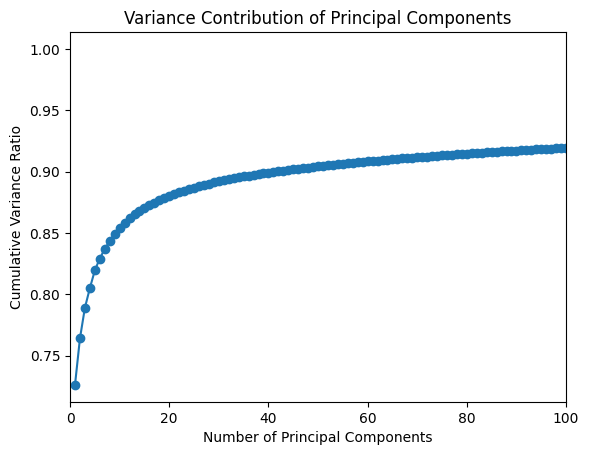

选择的主成分数量为： 56


In [322]:
PCA_pretreatment("Data/GSE73002.csv") # PCA处理GSE73002数据集

d:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


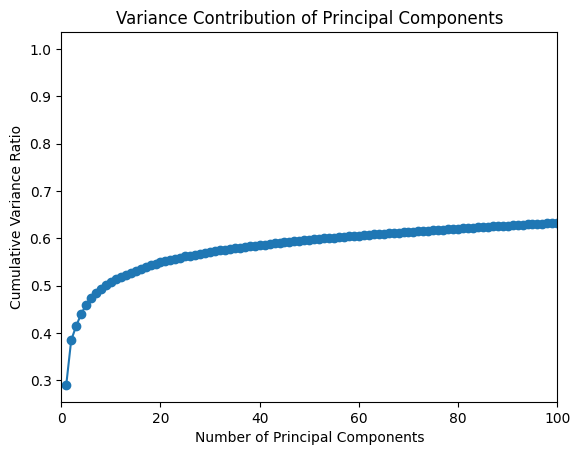

选择的主成分数量为： 300


In [323]:
PCA_pretreatment("Data/GSE137140.csv") # PCA处理GSE137140数据集

- 实现一个自定义的PCA函数，可以读取一个指定文件的数据集，对其中的特征进行标准化处理，然后使用PCA算法进行降维操作，并将降维后的数据保存为.csv文件：

In [324]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def myPCA(filename, n):
    data = pd.read_csv(filename) # 读取数据
    features = data.iloc[:, 1:] # 提取特征数据, 从第二列开始, 第一列是样本ID

    scaler = StandardScaler() # 创建标准化器
    scaled_features = scaler.fit_transform(features) # 标准化特征数据

    pca = PCA(n_components=n) # 创建PCA对象，并指定要保留的主成分数量

    pca.fit(scaled_features) # 训练PCA模型
    reduced_data = pca.transform(scaled_features) # 降维
    reduced_data = pd.DataFrame(reduced_data) # 将降维后的数据转换为DataFrame对象
    # reduced_data.insert(0, 'ID_REF', data['ID_REF']) # 将样本ID插入到第一列

    print("Dimension after PCA:", reduced_data.shape) # 打印降维后的数据维度
    reduced_data.to_csv(filename, index=False) # 保存为.csv文件

- 分别对两个数据集进行PCA降维：

In [325]:
myPCA("Data/GSE73002.csv", 56) # PCA处理GSE73002数据集

Dimension after PCA: (4011, 56)


In [326]:
myPCA("Data/GSE137140.csv", 300) # PCA处理GSE137140数据集

Dimension after PCA: (3924, 300)


## 四、K-means聚类

### 4.1 肘部法和轮廓系数进行调参
- 使用来自sklearn的KMeans聚类算法在数据集中找到最优的聚类数量：使用pandas读取CSV文件，然后设置一个K值范围，以尝试使用聚类算法。对于每个K值，使用fit()方法在数据上训练一个KMeans模型，并计算用于评估聚类质量的SSE(惯性)和剪影分数。最后，绘制了每个K值的SSE和剪影分数，以帮助确定聚类数据的最佳K值。采用肘形法根据SSE图确定最优聚类数量，采用剪影系数评价聚类质量。

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def kmeans_search_k(filename):
    data = pd.read_csv(filename) # 读取数据

    # 寻找最佳K值
    k_values = range(2, 11)  # 设置K值的范围
    inertias = [] # 创建一个空列表，用于存储每个K值对应的SSE
    silhouette_scores = [] # 创建一个空列表，用于存储每个K值对应的轮廓系数

    # 遍历K值的范围
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42) # 创建KMeans对象
        kmeans.fit(data) # 训练KMeans模型
        inertias.append(kmeans.inertia_) # 将SSE添加到列表中
        silhouette_scores.append(silhouette_score(data, kmeans.labels_)) # 将轮廓系数添加到列表中

    # 绘制肘部法图像
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, inertias, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # 绘制轮廓系数图像
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Coefficient')
    plt.show()

    # 根据肘部法和轮廓系数选择最佳K值
    best_k_elbow = np.argmin(np.diff(inertias)) + 2
    best_k_silhouette = np.argmax(silhouette_scores) + 2

    print("Best K value (Elbow Method):", best_k_elbow)
    print("Best K value (Silhouette Coefficient):", best_k_silhouette)


- 调用kmeans_search_k函数寻找GSE73002数据集的最佳K值：

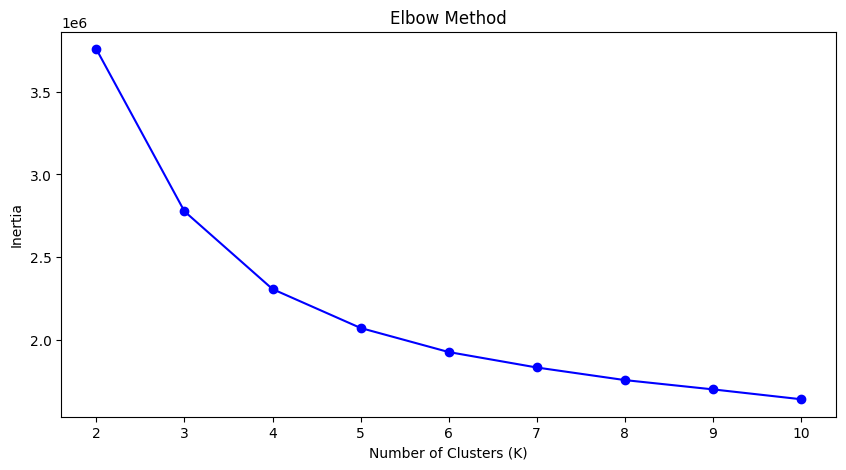

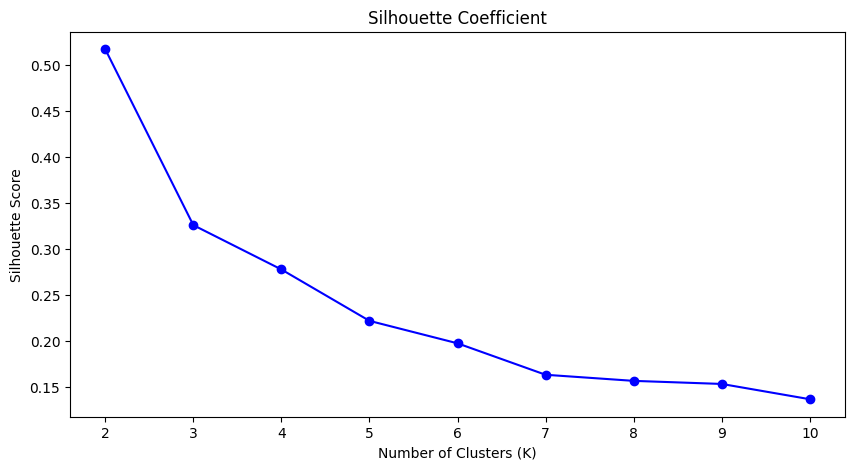

Best K value (Elbow Method): 2
Best K value (Silhouette Coefficient): 2


In [328]:
kmeans_search_k("Data/GSE73002.csv") # 寻找GSE73002数据集的最佳K值

- 分析结果可知：手肘法和轮廓系数均建议k取值为2。但肘部法中3、4更接近拐点，且因为k=3时的轮廓系数更高，所以选取k=3。

- 调用kmeans_search_k函数寻找GSE137140数据集的最佳K值：

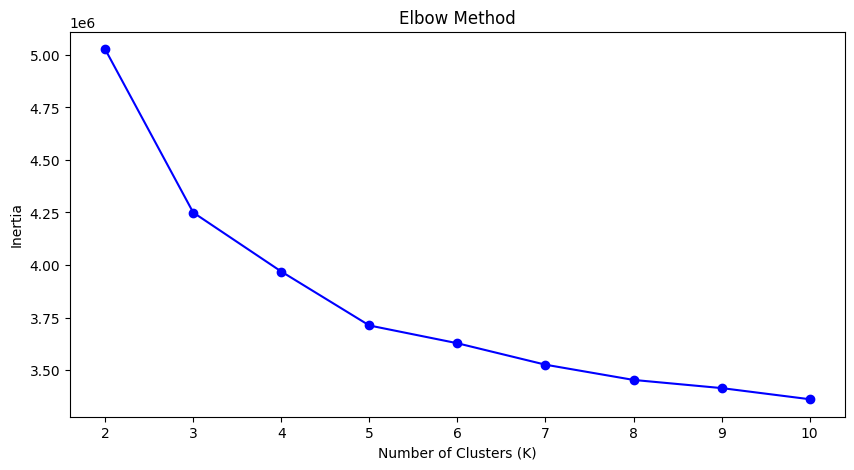

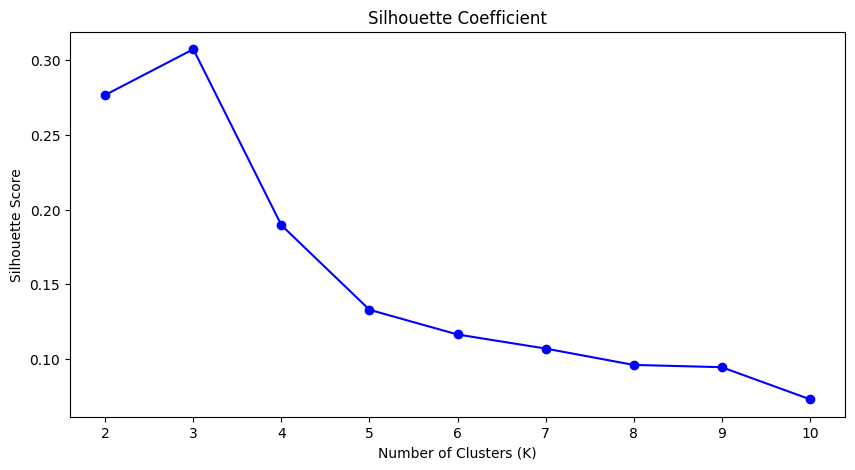

Best K value (Elbow Method): 2
Best K value (Silhouette Coefficient): 3


In [329]:
kmeans_search_k("Data/GSE137140.csv") # 寻找GSE137140数据集的最佳K值

- 分析结果可知：根据手肘法k应当选取2，根据轮廓系数应该选取3（sc值更大）。

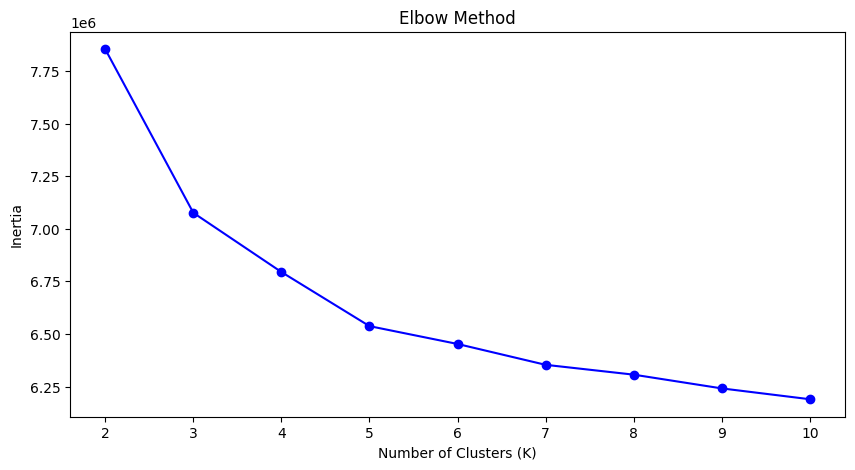

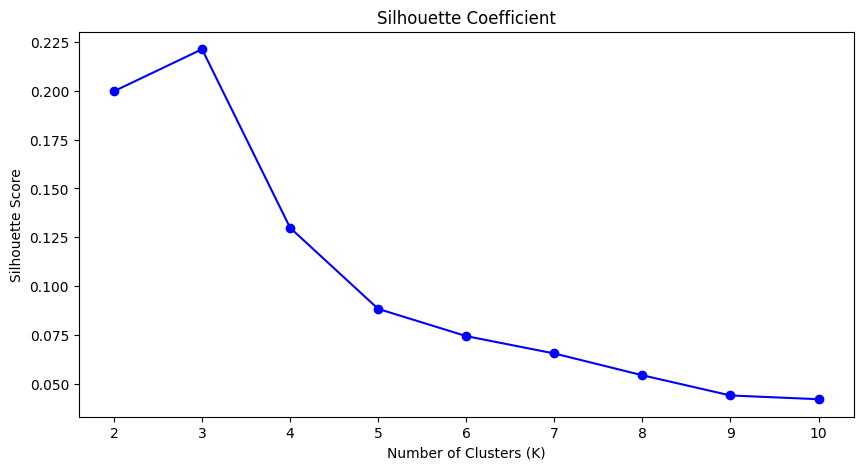

Best K value (Elbow Method): 2
Best K value (Silhouette Coefficient): 3


In [345]:
kmeans_search_k("Data/GSE137140_contrast.csv") # 寻找GSE137140_contract数据集的最佳K值

### 4.2 数据集聚类、结果可视化和打印评估指标

- 定义函数myKmeans，其接受两个参数：文件名filename和聚类簇数k。函数使用K-Means聚类算法对数据进行聚类，并输出聚类结果的散点图、轮廓图，并输出轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores。

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

def myKmeans(filename, k, true_labels_filename):
    data = pd.read_csv(filename) # 读取数据

    # 进行K-means聚类
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42) # 创建KMeans对象
    kmeans.fit(data) # 训练KMeans模型
    labels = kmeans.labels_ # 获取聚类标签

    # 提取第0、1列绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis') # 绘制散点图, 按照聚类标签着色, viridis是一种颜色映射表, 用于设置颜色
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering (K={})'.format(k))
    plt.colorbar() # 显示颜色映射表
    plt.show()


    silhouette_avg = silhouette_score(data, labels) # 计算轮廓系数
    # 绘制轮廓图
    plt.figure(figsize=(7, 5)) # 设置画布大小
    silhouette_values = silhouette_samples(data, labels) # 计算每个样本的轮廓系数
    y_lower = 10 # 设置y轴的初始值
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[labels == i] # 获取第i个簇的所有样本的轮廓系数
        ith_cluster_silhouette_values.sort() # 对轮廓系数进行排序
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # 获取第i个簇的样本数量
        y_upper = y_lower + size_cluster_i # 计算y轴的结束值
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7) # 绘制轮廓系数图
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i)) # 在轮廓系数图中添加簇的标签
        y_lower = y_upper + 10 # 计算下一个簇的y轴的初始值
    plt.xlabel("Silhouette coefficient values") # 设置x轴标签
    plt.ylabel("Cluster label") # 设置y轴标签
    plt.title("Silhouette plot for K-means clustering (K={})".format(k)) # 设置图像标题
    plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 绘制红色虚线
    plt.yticks([]) # 清空y轴刻度
    plt.show() # 显示图像

    # 打印轮廓系数
    print("Silhouette Coefficient:", silhouette_avg)
    # 打印Calinski-Harabasz指数
    calinski_harabasz = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    # 打印Davies-Bouldin指数
    davies_bouldin = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    true_labels = pd.read_csv(true_labels_filename) # 读取真实标签数据
    true_labels = true_labels.squeeze() # 将标签数据转换为一维数组

    # 计算Rand index
    rand_index = adjusted_rand_score(true_labels, labels)
    print("Rand index:", rand_index)

    # 计算Fowlkes-Mallows scores
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows scores:", fowlkes_mallows)

- 对GSE73002数据集进行K-means聚类

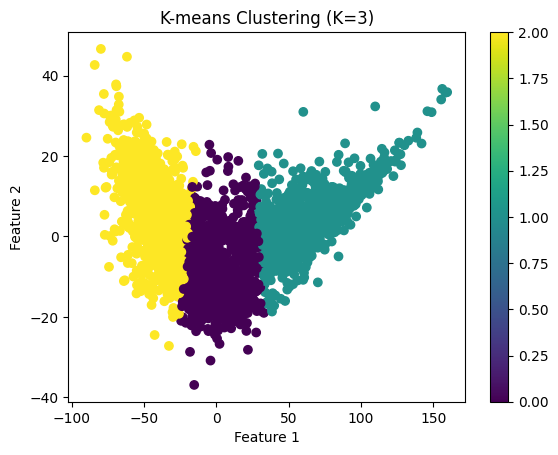

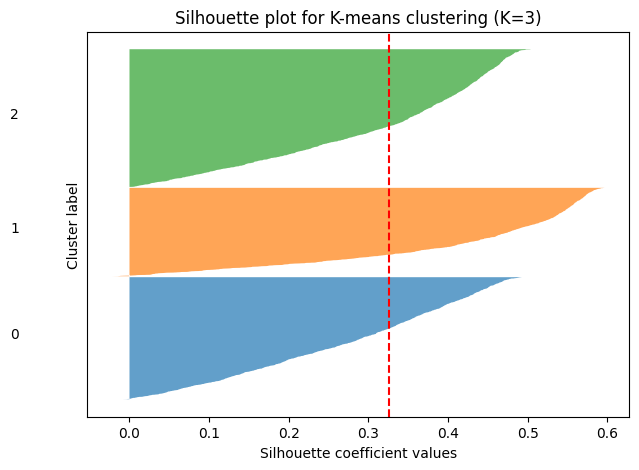

Silhouette Coefficient: 0.32594462559077975
Calinski-Harabasz Index: 4718.736019296377
Davies-Bouldin Index: 1.0582987737804583
Rand index: 0.35544349268709424
Fowlkes-Mallows scores: 0.6364159593004278


In [337]:
myKmeans("Data/GSE73002.csv", 3, "Data/GSE73002_labels.csv") # 对GSE73002数据集进行K-means聚类

- 对GSE137140数据集进行K-means聚类

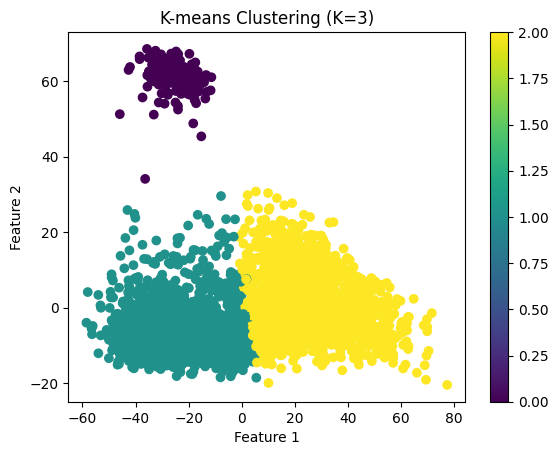

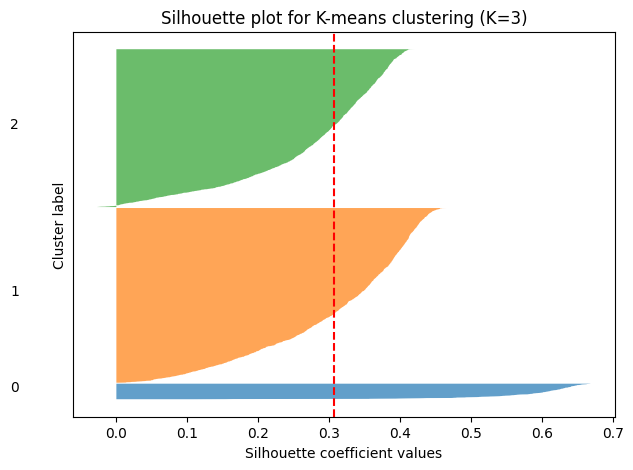

Silhouette Coefficient: 0.30720025605327195
Calinski-Harabasz Index: 1420.573253460615
Davies-Bouldin Index: 1.1489378347670283
Rand index: 0.7093935241555498
Fowlkes-Mallows scores: 0.8443433355819052


In [338]:
myKmeans("Data/GSE137140.csv", 3, "Data/GSE137140_labels.csv")

- 对GSE137140_contrast数据集进行聚类

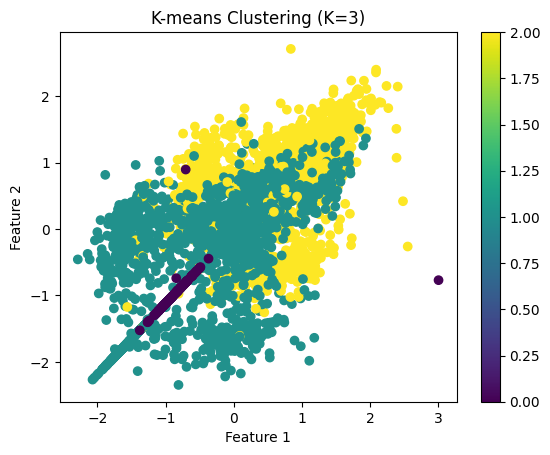

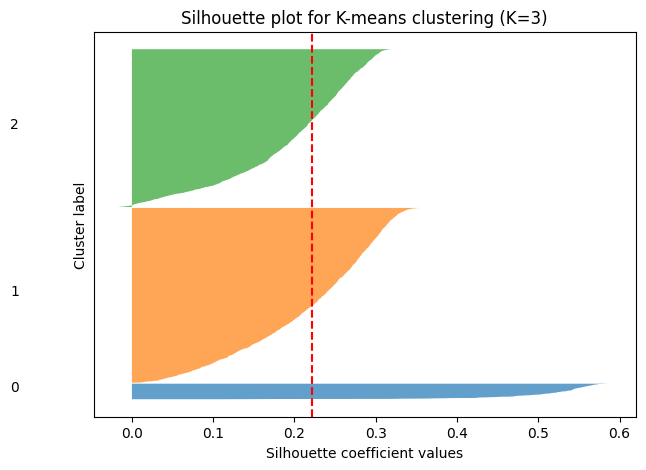

Silhouette Coefficient: 0.22134303716186907
Calinski-Harabasz Index: 853.2397964504764
Davies-Bouldin Index: 1.5029105711660258
Rand index: 0.7085866733772183
Fowlkes-Mallows scores: 0.8439144469001145


In [339]:
myKmeans("Data/GSE137140_contrast.csv", 3, "Data/GSE137140_labels.csv")

## 五、Mini Batch K-Means

### 5.1 肘部法和轮廓系数进行调参
- 读取一个CSV文件，然后遍历K值的范围，并在每个K值上运行一个MiniBatchKMeans聚类算法，计算并绘制肘部法和轮廓系数图像，最后选择最佳的K值并将其打印出来。其中，肘部法和轮廓系数都是基于SSE（Sum of Squared Errors）计算的，用于评估KMeans模型的聚类效果。

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def minkmeans_search_k(filename):
    data = pd.read_csv(filename) # 读取数据

    # 寻找最佳K值
    k_values = range(2, 11)  # 设置K值的范围
    inertias = [] # 创建一个空列表，用于存储每个K值对应的SSE
    silhouette_scores = [] # 创建一个空列表，用于存储每个K值对应的轮廓系数

    # 遍历K值的范围
    for k in k_values:
        minkmeans = MiniBatchKMeans(n_clusters=k, n_init='auto', random_state=42) # 创建MiniBatchKMeans对象
        minkmeans.fit(data) # 训练MiniBatchKMeans模型
        inertias.append(minkmeans.inertia_) # 将SSE添加到列表中
        silhouette_scores.append(silhouette_score(data, minkmeans.labels_)) # 将轮廓系数添加到列表中

    # 绘制肘部法图像
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, inertias, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # 绘制轮廓系数图像
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Coefficient')
    plt.show()

    # 根据肘部法和轮廓系数选择最佳K值
    best_k_elbow = np.argmin(np.diff(inertias)) + 2
    best_k_silhouette = np.argmax(silhouette_scores) + 2

    print("Best K value (Elbow Method):", best_k_elbow)
    print("Best K value (Silhouette Coefficient):", best_k_silhouette)

- 寻找GSE73002数据集的最佳K值

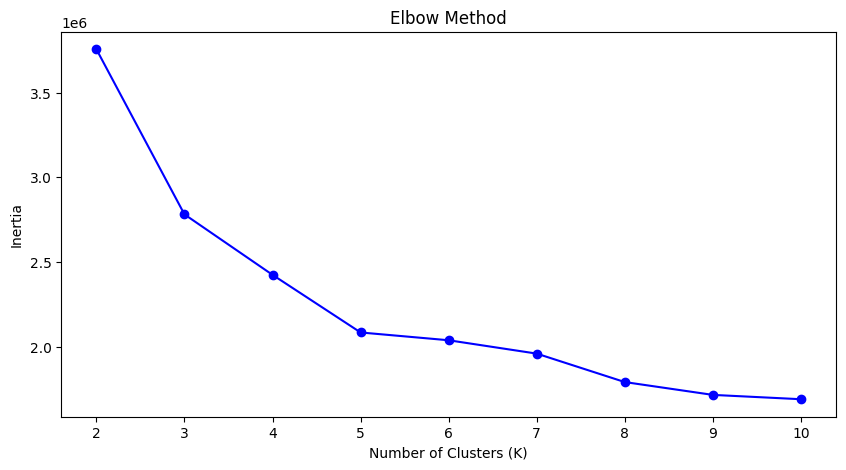

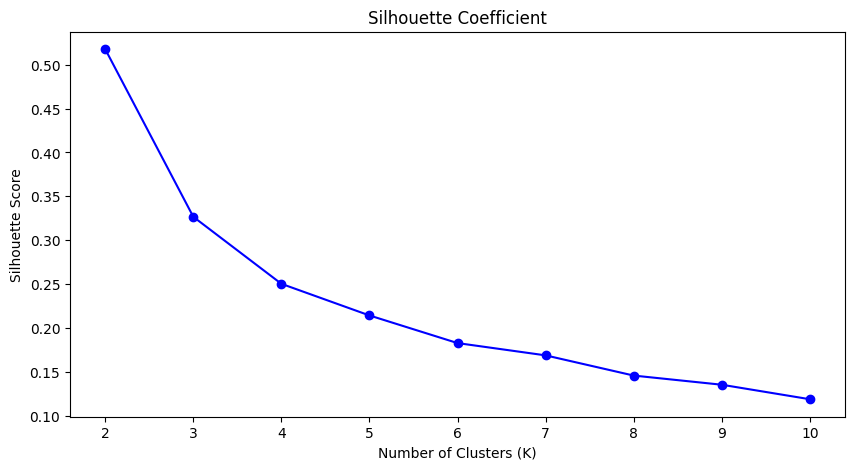

Best K value (Elbow Method): 2
Best K value (Silhouette Coefficient): 2


In [341]:
minkmeans_search_k("Data/GSE73002.csv")

- 分析结果可知：手肘法和轮廓系数均建议k取值为2。但肘部法中3，4，5更接近拐点，且因为k=3时的轮廓系数更高，所以选取k=3。

- 寻找GSE137140数据集的最佳K值：

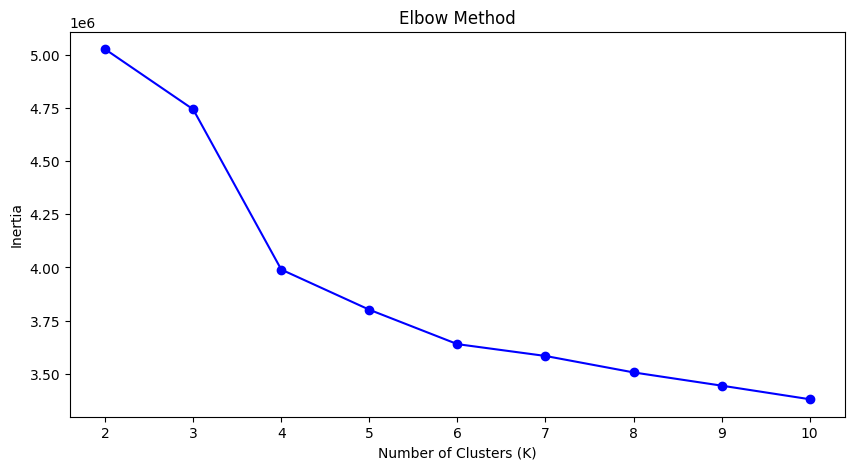

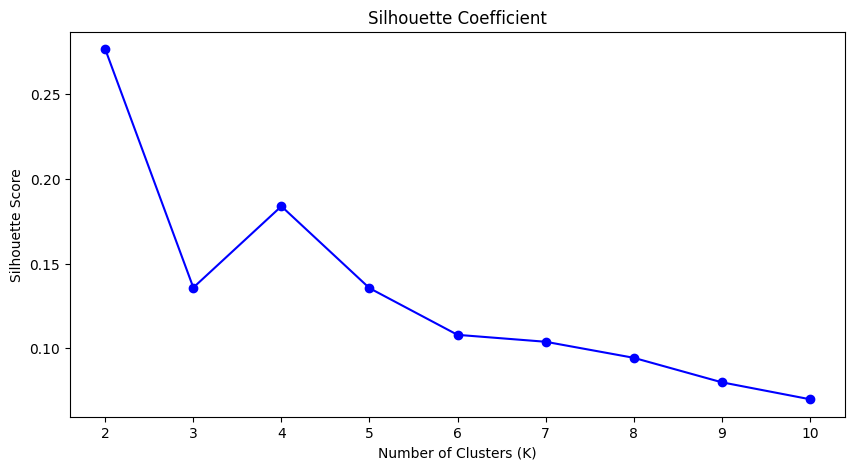

Best K value (Elbow Method): 3
Best K value (Silhouette Coefficient): 2


In [342]:
minkmeans_search_k("Data/GSE137140.csv")

- 分析结果可知：手肘法的拐点为4或5，但k=4时的轮廓系数更大，所以选取k=4。


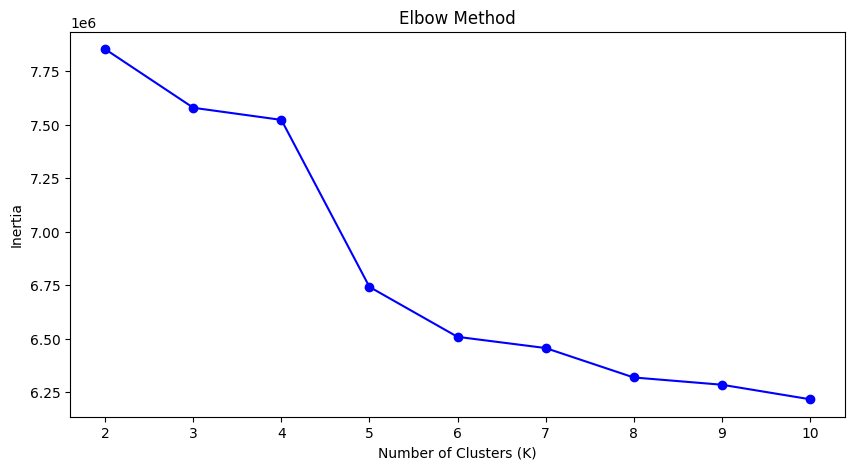

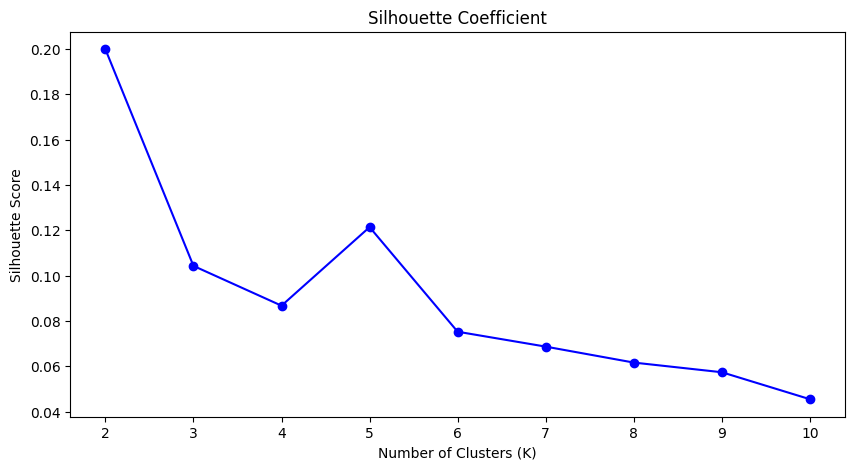

Best K value (Elbow Method): 4
Best K value (Silhouette Coefficient): 2


In [346]:
minkmeans_search_k("Data/GSE137140_contrast.csv")

### 5.2 数据集聚类、结果可视化和打印评估指标

- 使用MiniBatchKMeans聚类算法，并绘制了聚类结果的散点图和轮廓图，并输出了轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores等聚类性能指标

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

def my_minKmeans(filename, k, true_labels_filename):
    data = pd.read_csv(filename) # 读取数据

    # 进行K-means聚类
    minkmeans = MiniBatchKMeans(n_clusters=k, n_init='auto', random_state=42) # 创建MiniBatchKMeans对象
    minkmeans.fit(data) # 训练MiniBatchKMeans模型
    labels = minkmeans.labels_ # 获取聚类标签

    # 提取第0、1列绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis') # 绘制散点图, 按照聚类标签着色, viridis是一种颜色映射表, 用于设置颜色
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering (K={})'.format(k))
    plt.colorbar() # 显示颜色映射表
    plt.show()


    silhouette_avg = silhouette_score(data, labels) # 计算轮廓系数
    # 绘制轮廓图
    plt.figure(figsize=(7, 5)) # 设置画布大小
    silhouette_values = silhouette_samples(data, labels) # 计算每个样本的轮廓系数
    y_lower = 10 # 设置y轴的初始值
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[labels == i] # 获取第i个簇的所有样本的轮廓系数
        ith_cluster_silhouette_values.sort() # 对轮廓系数进行排序
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # 获取第i个簇的样本数量
        y_upper = y_lower + size_cluster_i # 计算y轴的结束值
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7) # 绘制轮廓系数图
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i)) # 在轮廓系数图中添加簇的标签
        y_lower = y_upper + 10 # 计算下一个簇的y轴的初始值
    plt.xlabel("Silhouette coefficient values") # 设置x轴标签
    plt.ylabel("Cluster label") # 设置y轴标签
    plt.title("Silhouette plot for K-means clustering (K={})".format(k)) # 设置图像标题
    plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 绘制红色虚线
    plt.yticks([]) # 清空y轴刻度
    plt.show() # 显示图像

    # 打印轮廓系数
    print("Silhouette Coefficient:", silhouette_avg)
    # 打印Calinski-Harabasz指数
    calinski_harabasz = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    # 打印Davies-Bouldin指数
    davies_bouldin = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    true_labels = pd.read_csv(true_labels_filename) # 读取真实标签数据
    true_labels = true_labels.squeeze() # 将标签数据转换为一维数组

    # 计算Rand index
    rand_index = adjusted_rand_score(true_labels, labels)
    print("Rand index:", rand_index)

    # 计算Fowlkes-Mallows scores
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows scores:", fowlkes_mallows)

- 对三个数据集分别进行MiniBatchKMeans聚类

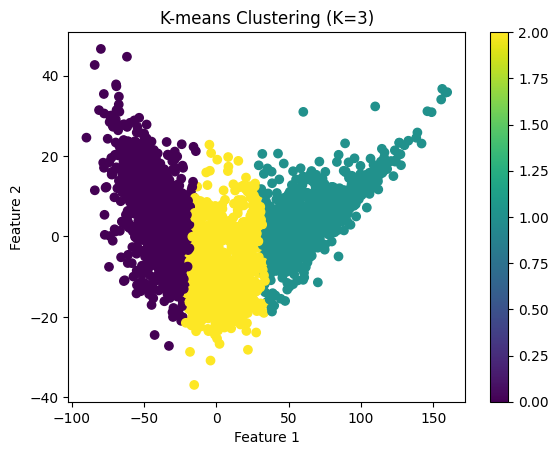

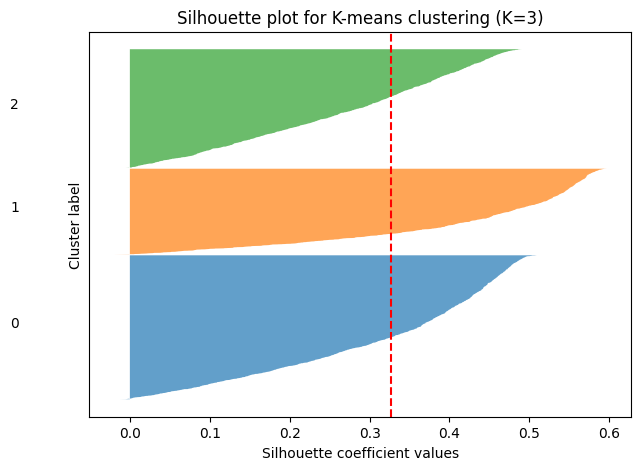

Silhouette Coefficient: 0.3265600440338948
Calinski-Harabasz Index: 4710.7508323112315
Davies-Bouldin Index: 1.0535687105643898
Rand index: 0.3543941102167509
Fowlkes-Mallows scores: 0.6368431255093524


In [348]:
my_minKmeans("Data/GSE73002.csv", 3, "Data/GSE73002_labels.csv")

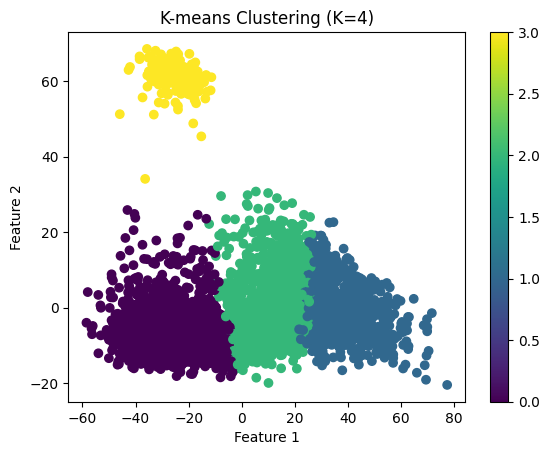

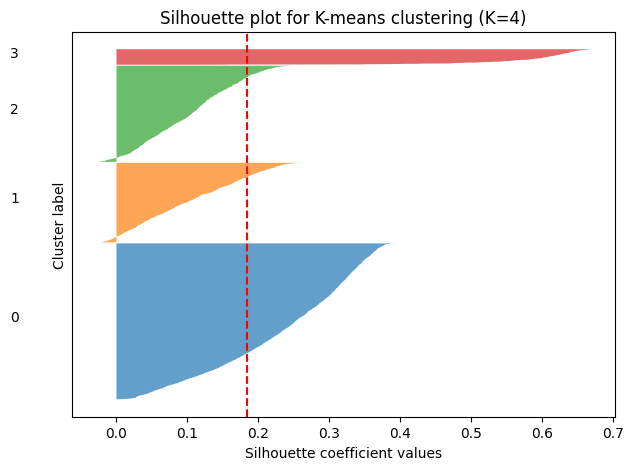

Silhouette Coefficient: 0.18390426914877106
Calinski-Harabasz Index: 1104.856088622889
Davies-Bouldin Index: 1.8132816078903027
Rand index: 0.5330760240247027
Fowlkes-Mallows scores: 0.7254687376349032


In [349]:
my_minKmeans("Data/GSE137140.csv", 4, "Data/GSE137140_labels.csv")

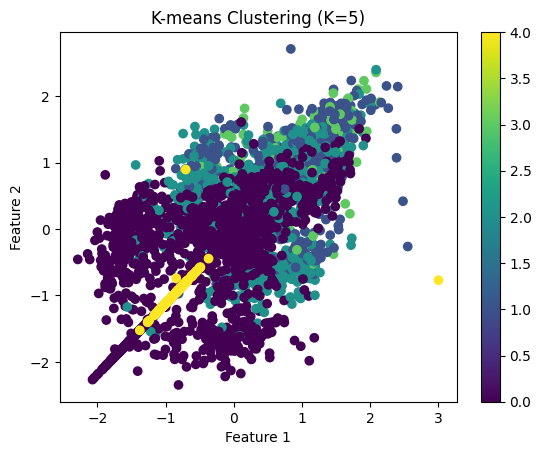

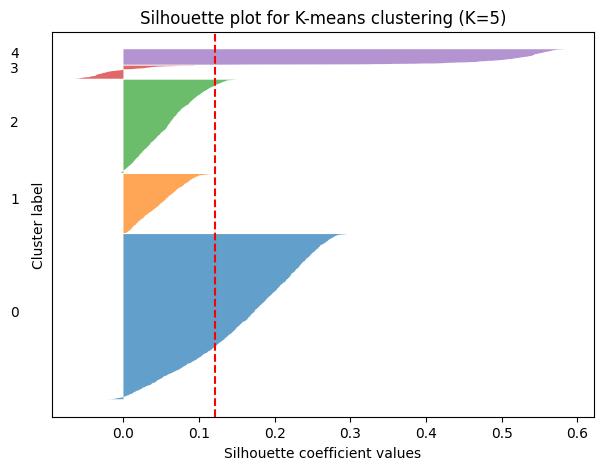

Silhouette Coefficient: 0.12136506557980849
Calinski-Harabasz Index: 497.71745613591634
Davies-Bouldin Index: 2.9314784847014
Rand index: 0.5699731596869321
Fowlkes-Mallows scores: 0.7483259974669598


In [351]:
my_minKmeans("Data/GSE137140_contrast.csv", 5, "Data/GSE137140_labels.csv")

## 六、层次聚类

### 6.1 树形图和轮廓系数进行调参

- 对给定数据文件进行层次聚类并计算轮廓系数，然后在图表中绘制轮廓系数图像，并选择最佳簇的数量。具体实现的过程中，先读取数据文件，然后绘制层次聚类图，并计算轮廓系数。接着绘制轮廓系数图像，以便选择最佳簇的数量。最终输出最佳簇的数量。


In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def hier_search_k(filename):
    data = pd.read_csv(filename) # 读取数据

    # 绘制层次聚类图
    Z = linkage(data, 'ward') # 使用ward方法计算层次聚类的距离
    plt.figure(figsize=(15, 15))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()

    # 寻找最佳K值
    k_values = range(2, 11)  # 设置K值的范围
    silhouette_scores = [] # 创建一个空列表，用于存储每个K值对应的轮廓系数

    # 遍历K值的范围
    for k in k_values:
        # 创建层次聚类对象
        hc = AgglomerativeClustering(n_clusters=k)
        # 执行聚类
        labels = hc.fit_predict(data)
        # 计算轮廓系数
        silhouette_scores.append(silhouette_score(data, labels))
    # 绘制轮廓系数图像
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Coefficient')
    plt.show()
    
    best_k_silhouette = np.argmax(silhouette_scores) + 2
    print("Best K value (Silhouette Coefficient):", best_k_silhouette)

- 寻找GSE73002数据集的最佳K值：

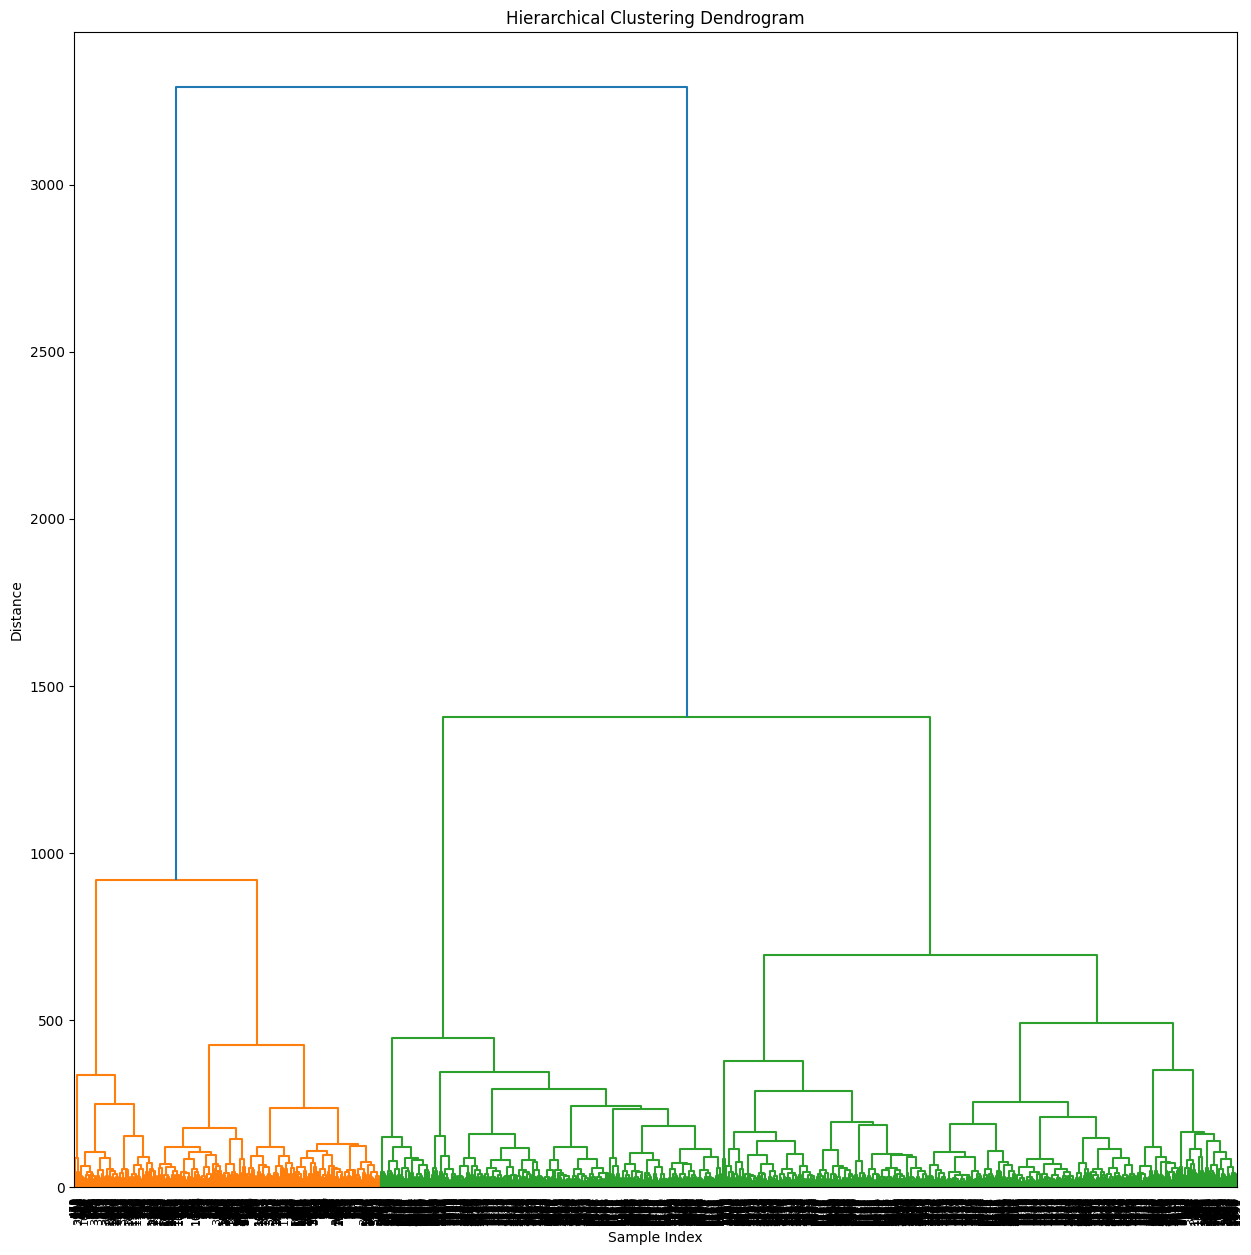

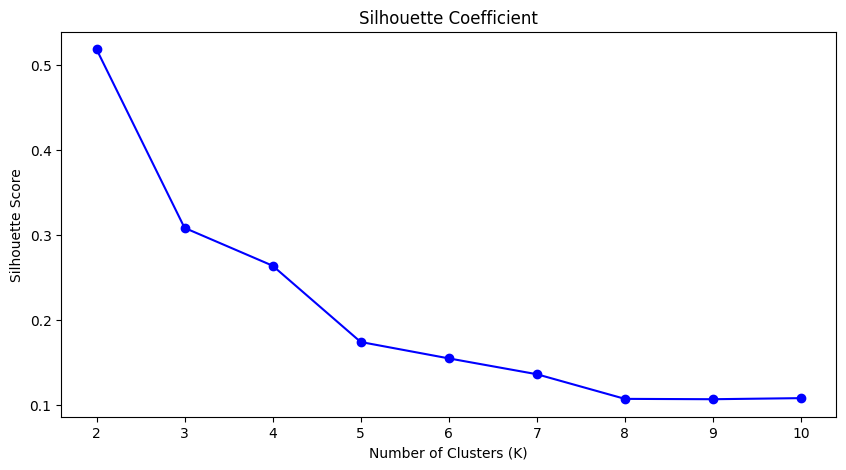

Best K value (Silhouette Coefficient): 2


In [353]:
hier_search_k("Data/GSE73002.csv")

- 分析结果可知：树形图和轮廓系数均建议k取值为2。

- 寻找GSE137140数据集的最佳K值：

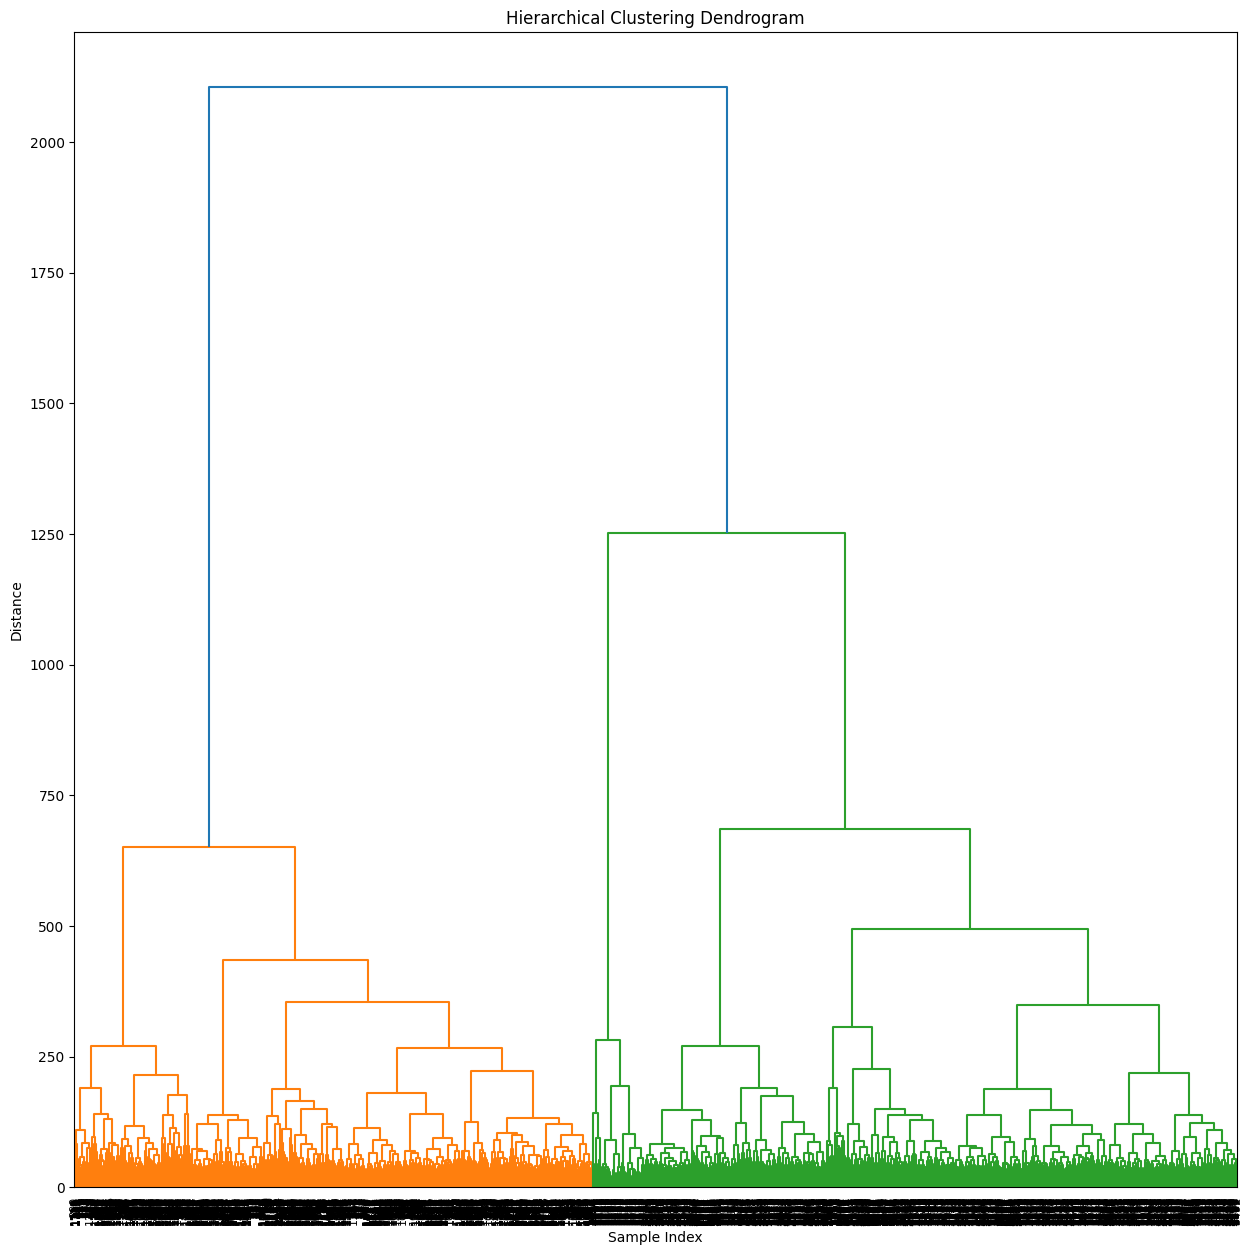

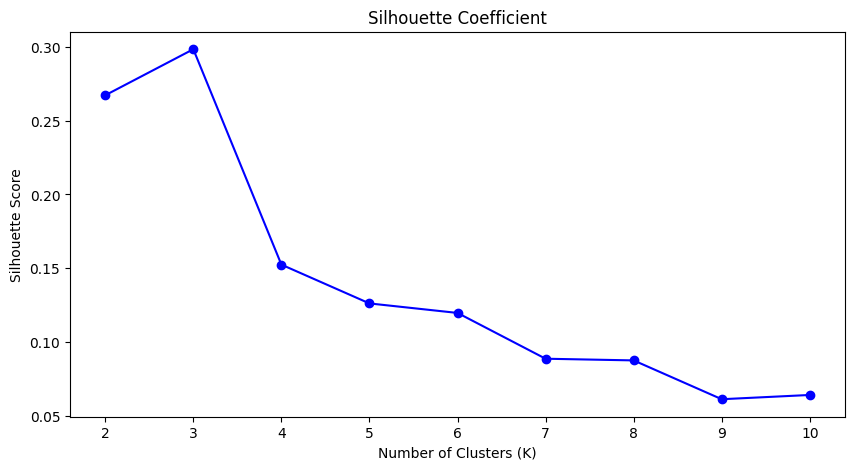

Best K value (Silhouette Coefficient): 3


In [355]:
hier_search_k("Data/GSE137140.csv")

- 分析结果可知：树形图和轮廓系数均建议k取值为3。

### 6.2 数据集聚类、结果可视化和打印评估指标

- 定义函数myHier，其接受两个参数：文件名filename和聚类簇数k。函数使用层次聚类算法对数据进行聚类，并输出聚类结果的散点图、轮廓图，并输出轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores。

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

def myHier(filename, k, true_labels_filename):
    data = pd.read_csv(filename) # 读取数据

    hc = AgglomerativeClustering(n_clusters=k) # 创建层次聚类对象
    labels = hc.fit_predict(data) # 执行聚类

    # 提取第0、1列绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis') # 绘制散点图, 按照聚类标签着色, viridis是一种颜色映射表, 用于设置颜色
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2')
    plt.title('Hierarchical Clustering (K={})'.format(k))
    plt.colorbar() # 显示颜色映射表
    plt.show()


    silhouette_avg = silhouette_score(data, labels) # 计算轮廓系数
    # 绘制轮廓图
    plt.figure(figsize=(7, 5)) # 设置画布大小
    silhouette_values = silhouette_samples(data, labels) # 计算每个样本的轮廓系数
    y_lower = 10 # 设置y轴的初始值
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[labels == i] # 获取第i个簇的所有样本的轮廓系数
        ith_cluster_silhouette_values.sort() # 对轮廓系数进行排序
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # 获取第i个簇的样本数量
        y_upper = y_lower + size_cluster_i # 计算y轴的结束值
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7) # 绘制轮廓系数图
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i)) # 在轮廓系数图中添加簇的标签
        y_lower = y_upper + 10 # 计算下一个簇的y轴的初始值
    plt.xlabel("Silhouette coefficient values") # 设置x轴标签
    plt.ylabel("Cluster label") # 设置y轴标签
    plt.title("Silhouette plot for Hierarchical Clustering (K={})".format(k)) # 设置图像标题
    plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 绘制红色虚线
    plt.yticks([]) # 清空y轴刻度
    plt.show() # 显示图像

    # 打印轮廓系数
    print("Silhouette Coefficient:", silhouette_avg)
    # 打印Calinski-Harabasz指数
    calinski_harabasz = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    # 打印Davies-Bouldin指数
    davies_bouldin = metrics.davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    true_labels = pd.read_csv(true_labels_filename) # 读取真实标签数据
    true_labels = true_labels.squeeze() # 将标签数据转换为一维数组

    # 计算Rand index
    rand_index = adjusted_rand_score(true_labels, labels)
    print("Rand index:", rand_index)

    # 计算Fowlkes-Mallows scores
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows scores:", fowlkes_mallows)

- 对GSE73002数据集进行层次聚类

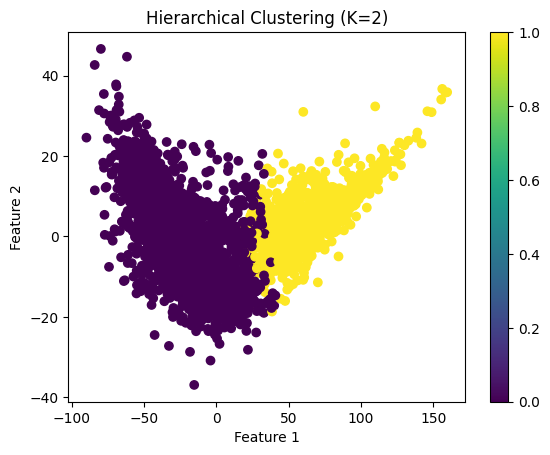

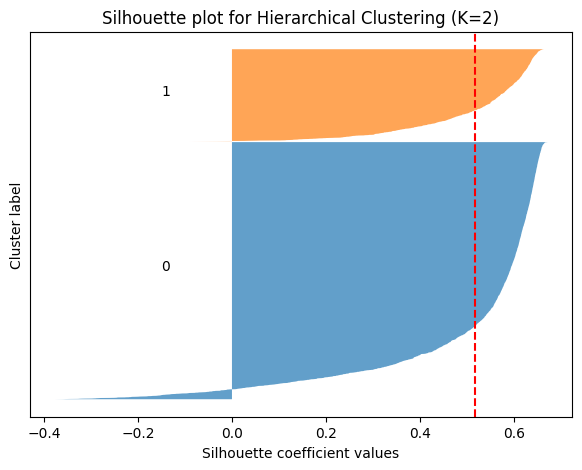

Silhouette Coefficient: 0.5184402529561942
Calinski-Harabasz Index: 5565.16444740165
Davies-Bouldin Index: 0.6899951023451484
Rand index: 0.6594357771152463
Fowlkes-Mallows scores: 0.8540416651391056


In [357]:
myHier("Data/GSE73002.csv", 2, "Data/GSE73002_labels.csv")

- 对GSE137140数据集进行层次聚类

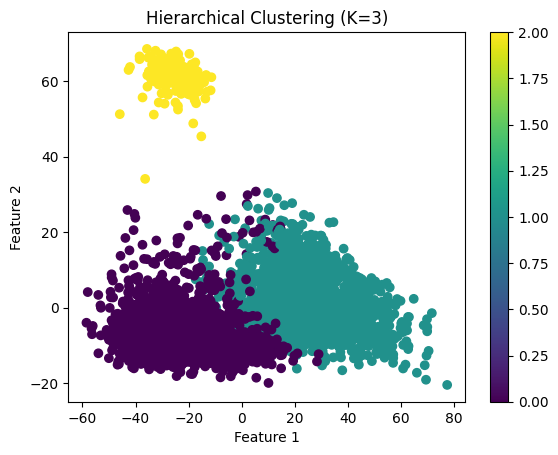

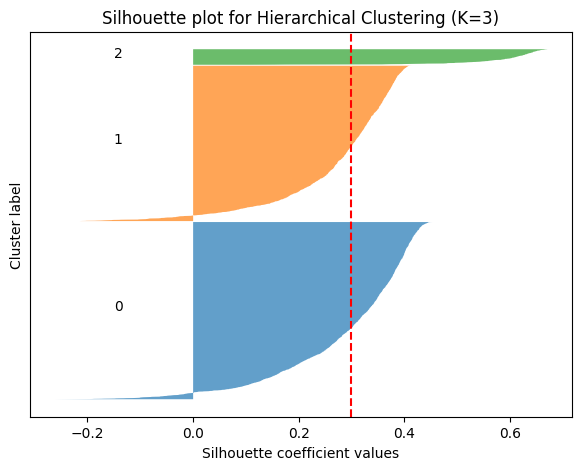

Silhouette Coefficient: 0.29833520464463237
Calinski-Harabasz Index: 1357.4974507913814
Davies-Bouldin Index: 1.1726783667378666
Rand index: 0.7946828519483078
Fowlkes-Mallows scores: 0.8901191024280286


In [358]:
myHier("Data/GSE137140.csv", 3, "Data/GSE137140_labels.csv")

## 七、DBSCAN

### 7.1 调参

- 使用 DBSCAN 进行聚类，并通过遍历不同的参数组合，选出最佳参数，同时绘制了轮廓系数图以展示聚类效果。其中，参数组合通过 eps_range 和 min_samples_range 两个数组存储，并遍历两个数组获取不同的参数组合。在每个参数组合下，代码创建 DBSCAN 对象进行聚类，计算轮廓系数，并存储在 silhouette_scores 数组中。最后根据轮廓系数的大小选出最佳参数，并打印输出。

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def dbscan_search_params(filename, eps_range, min_samples_range):
    data = pd.read_csv(filename) # 读取数据

    eps_range = eps_range# eps 参数的取值范围
    min_samples_range = min_samples_range # min_samples 参数的取值范围

    silhouette_scores = [] # 存储不同参数下的轮廓系数
    best_score = -1 # 最佳分数初始值
    best_params = {} # 最佳参数字典

    # 遍历参数组合
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples) # 创建 DBSCAN 对象
            labels = dbscan.fit_predict(data) # 执行聚类
            # 计算轮廓系数
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
            # # 打印当前参数下的轮廓系数
            # print(f"eps={eps}, min_samples={min_samples}:")
            # print("Silhouette Score:", score)
            # print()

            # 更新最佳分数和最佳参数
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

    # 绘制轮廓系数图
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
    plt.xticks(range(len(silhouette_scores)), [f"eps={eps}, min_samples={min_samples}" for eps in eps_range for min_samples in min_samples_range], rotation='vertical')
    plt.xlabel('Parameter Combination')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for DBSCAN')
    plt.tight_layout()
    plt.show()

    # 打印最佳参数和最佳分数
    print("Best Parameters:", best_params)
    print("Best Silhouette Score:", best_score)

- 根据官方文档中参数默认值为基础进行调参，但是出现了以下错误，由于 DBSCAN 聚类算法至少需要两个不同的类别标签才能进行聚类。这个错误说明当前的参数设置下，DBSCAN 算法无法将数据集分为多个簇，导致只有一个类别标签。这种情况下，需要<mark>进一步调整参数来处理数据集。尝试不同的 eps 和 min_samples 参数值，以寻找能够形成多个簇的参数组合。增大 eps 可以扩大簇的范围，减小 min_samples 可以允许更少的样本被视为核心样本</mark>：

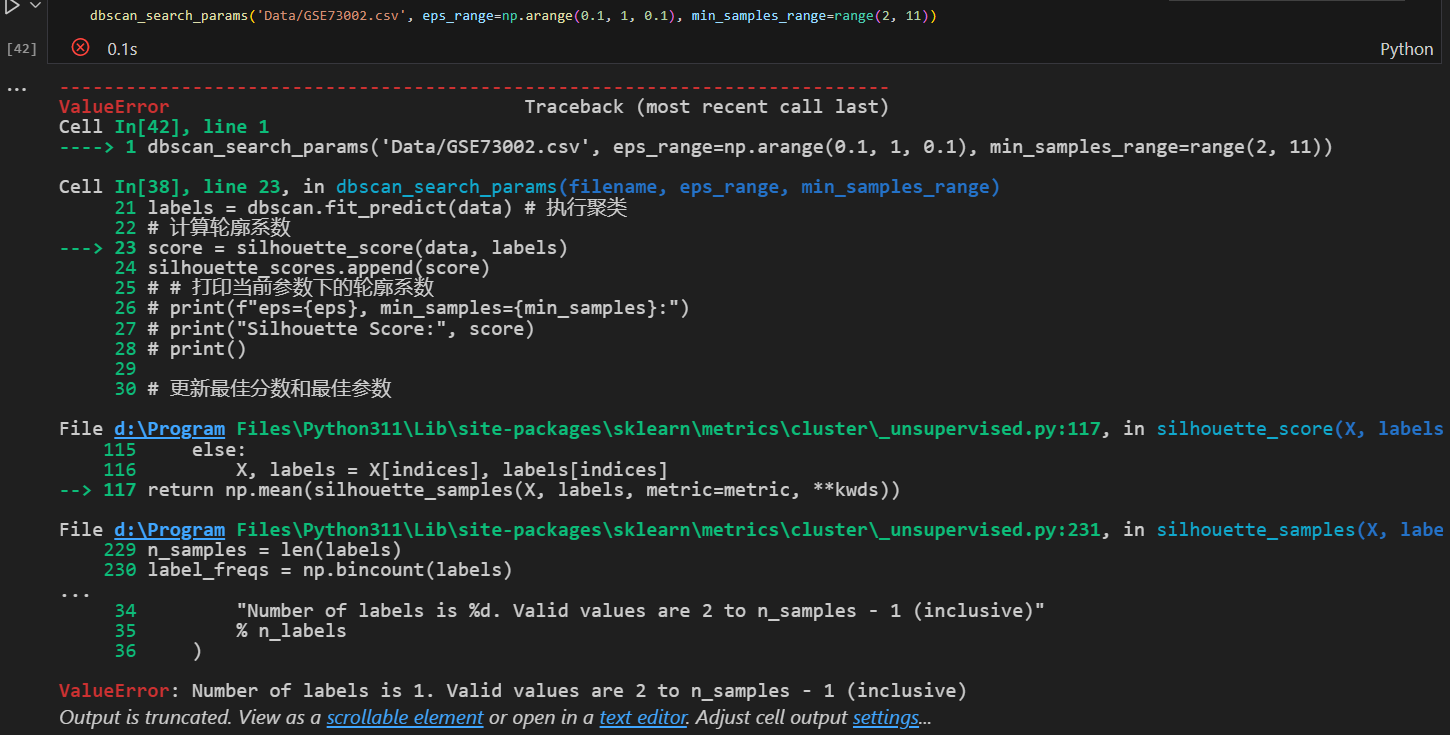

- 寻找GSE73002数据集的最佳参数

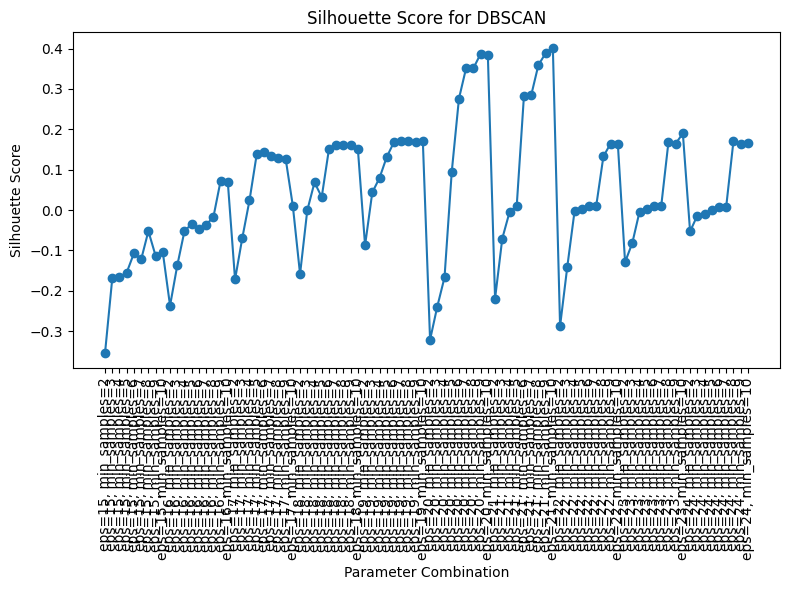

Best Parameters: {'eps': 21, 'min_samples': 10}
Best Silhouette Score: 0.40234859395644634


In [360]:
dbscan_search_params('Data/GSE73002.csv', eps_range=range(15, 25, 1), min_samples_range=range(2, 11))

- 寻找GSE137140数据集的最佳参数

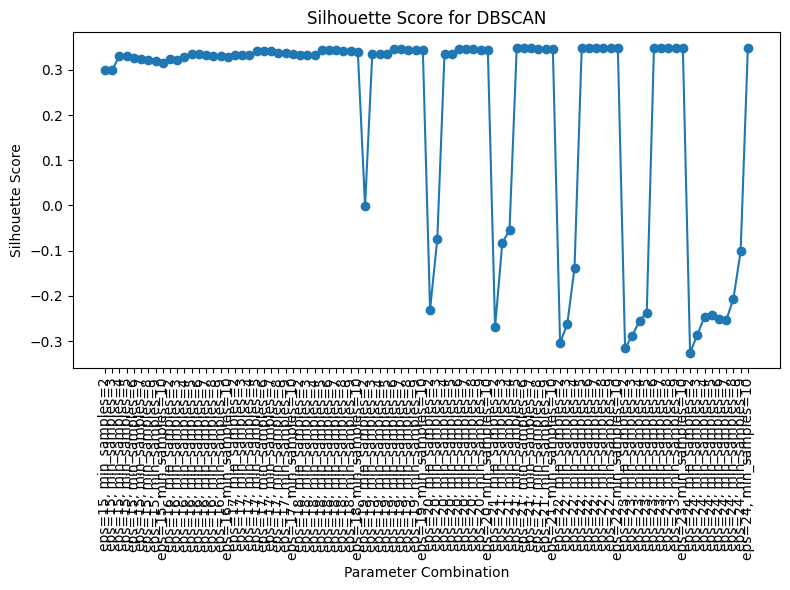

Best Parameters: {'eps': 22, 'min_samples': 5}
Best Silhouette Score: 0.34915189755397535


In [361]:
dbscan_search_params('Data/GSE137140.csv', eps_range=range(15, 25, 1), min_samples_range=range(2, 11))

### 7.2 数据集聚类、结果可视化和打印评估指标

- 使用 DBSCAN 算法进行聚类，绘制散点图、轮廓系数图，并进行轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores的计算。

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

def myDbscan(filename, eps, min_samples, true_labels_filename):
    data = pd.read_csv(filename) # 读取数据

    dbscan = DBSCAN(eps=eps, min_samples=min_samples) # 创建DBSCAN对象
    labels = dbscan.fit_predict(data) # 执行聚类

    # 绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis') # 绘制散点图, 按照聚类标签着色, viridis是一种颜色映射表, 用于设置颜色
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.colorbar() # 显示颜色映射表
    plt.show()

    silhouette_avg = silhouette_score(data, labels) # 计算轮廓系数
    # 绘制轮廓图
    plt.figure(figsize=(7, 5)) # 设置画布大小
    silhouette_values = silhouette_samples(data, labels) # 计算每个样本的轮廓系数
    y_lower = 10 # 设置y轴的初始值
    for i in np.unique(labels):
        ith_cluster_silhouette_values = silhouette_values[labels == i] # 获取第i个簇的所有样本的轮廓系数
        ith_cluster_silhouette_values.sort() # 对轮廓系数进行排序
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # 获取第i个簇的样本数量
        y_upper = y_lower + size_cluster_i # 计算y轴的结束值
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7) # 绘制轮廓系数图
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i)) # 在轮廓系数图中添加簇的标签
        y_lower = y_upper + 10 # 计算下一个簇的y轴的初始值
    plt.xlabel("Silhouette coefficient values") # 设置x轴标签
    plt.ylabel("Cluster label") # 设置y轴标签
    plt.title("Silhouette plot for DBSCAN Clustering") # 设置图像标题
    plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 绘制红色虚线
    plt.yticks([]) # 清空y轴刻度
    plt.show() # 显示图像

    # 打印轮廓系数
    print("Silhouette Coefficient:", silhouette_avg)
    # 打印Calinski-Harabasz指数
    calinski_harabasz = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    # 打印Davies-Bouldin指数
    davies_bouldin = metrics.davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    true_labels = pd.read_csv(true_labels_filename) # 读取真实标签数据
    true_labels = true_labels.squeeze() # 将标签数据转换为一维数组

    # 计算Rand index
    rand_index = adjusted_rand_score(true_labels, labels)
    print("Rand index:", rand_index)

    # 计算Fowlkes-Mallows scores
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows scores:", fowlkes_mallows)

- DBSCAN聚类GSE73002数据集

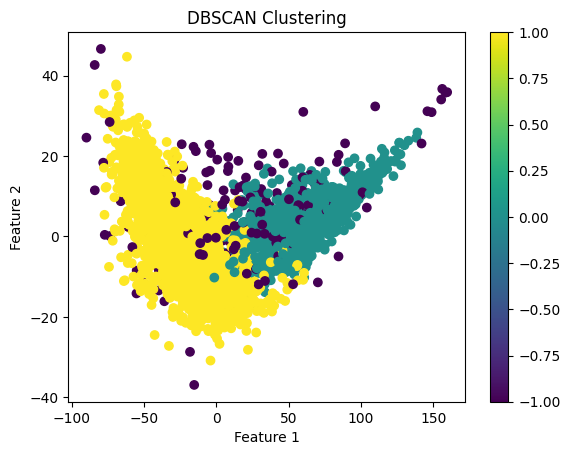

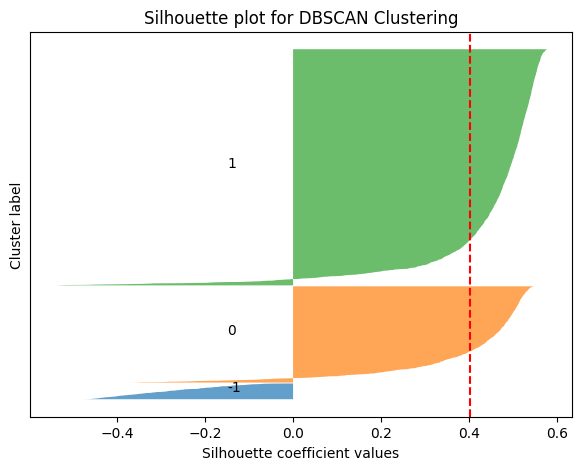

Silhouette Coefficient: 0.40234859395644634
Calinski-Harabasz Index: 2452.132466037934
Davies-Bouldin Index: 1.9970890662405323
Rand index: 0.7991225689045975
Fowlkes-Mallows scores: 0.9057485582452335


In [364]:
myDbscan("Data/GSE73002.csv", eps=21, min_samples=10, true_labels_filename="Data/GSE73002_labels.csv")

- DBSCAN聚类GSE137140数据集

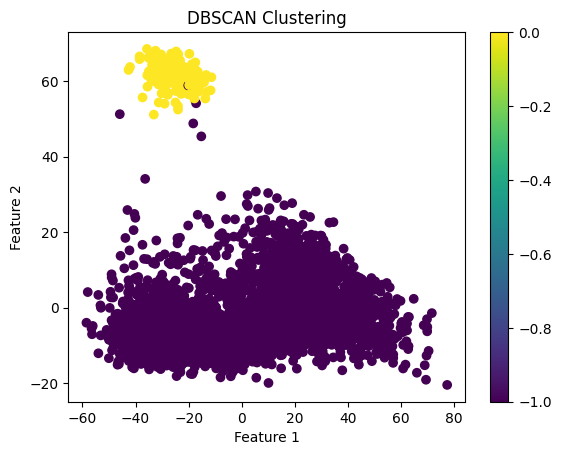

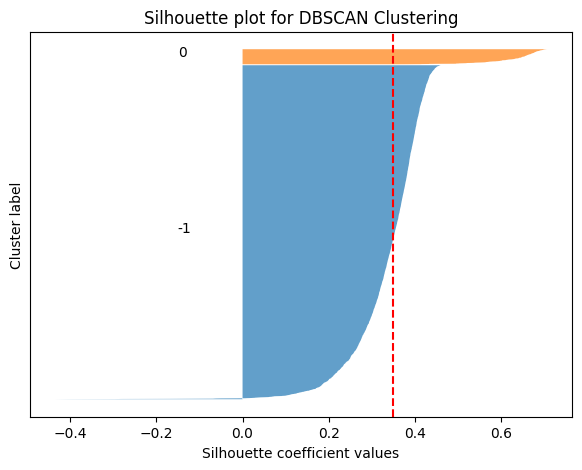

Silhouette Coefficient: 0.34915189755397535
Calinski-Harabasz Index: 497.1732318685936
Davies-Bouldin Index: 0.8773559516453687
Rand index: 0.14722802045223296
Fowlkes-Mallows scores: 0.715024903076796


In [365]:
myDbscan("Data/GSE137140.csv", eps=22, min_samples=5, true_labels_filename="Data/GSE137140_labels.csv")

## 八、OPTICS

### 8.1 调参
- 通过遍历参数组合来寻找 OPTICS 聚类算法最佳参数。在指定的文件名中读取数据，然后用指定范围内的 min_samples 和 xi 值生成 OPTICS 对象，执行聚类，计算轮廓系数，并根据最高分数更新最佳参数和最佳分数。最后，绘制轮廓系数图并打印最佳参数和最佳分数。

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

def optics_search_params(filename, min_samples_range, xi_range):
    data = pd.read_csv(filename) # 读取数据

    xi_range = xi_range
    min_samples_range = min_samples_range # min_samples 参数的取值范围

    silhouette_scores = [] # 存储不同参数下的轮廓系数
    best_score = -1 # 最佳分数初始值
    best_params = {} # 最佳参数字典

    # 遍历参数组合
    for xi in xi_range:
        for min_samples in min_samples_range:
            optics = OPTICS(xi=xi, min_samples=min_samples)  # 创建 OPTICS 对象
            labels = optics.fit_predict(data) # 执行聚类
            # 计算轮廓系数
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)

            # 更新最佳分数和最佳参数
            if score > best_score:
                best_score = score
                best_params = {'xi': xi, 'min_samples': min_samples}

    # 绘制轮廓系数图
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
    plt.xticks(range(len(silhouette_scores)), [f"xi={xi}, min_samples={min_samples}" for xi in xi_range for min_samples in min_samples_range], rotation='vertical')
    plt.xlabel('Parameter Combination')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for OPTICS')
    plt.tight_layout()
    plt.show()

    # 打印最佳参数和最佳分数
    print("Best Parameters:", best_params)
    print("Best Silhouette Score:", best_score)


- 寻找GSE73002数据集的最佳参数：经下图类型的调参，多次测试后可以逐渐得到适当的参数范围：

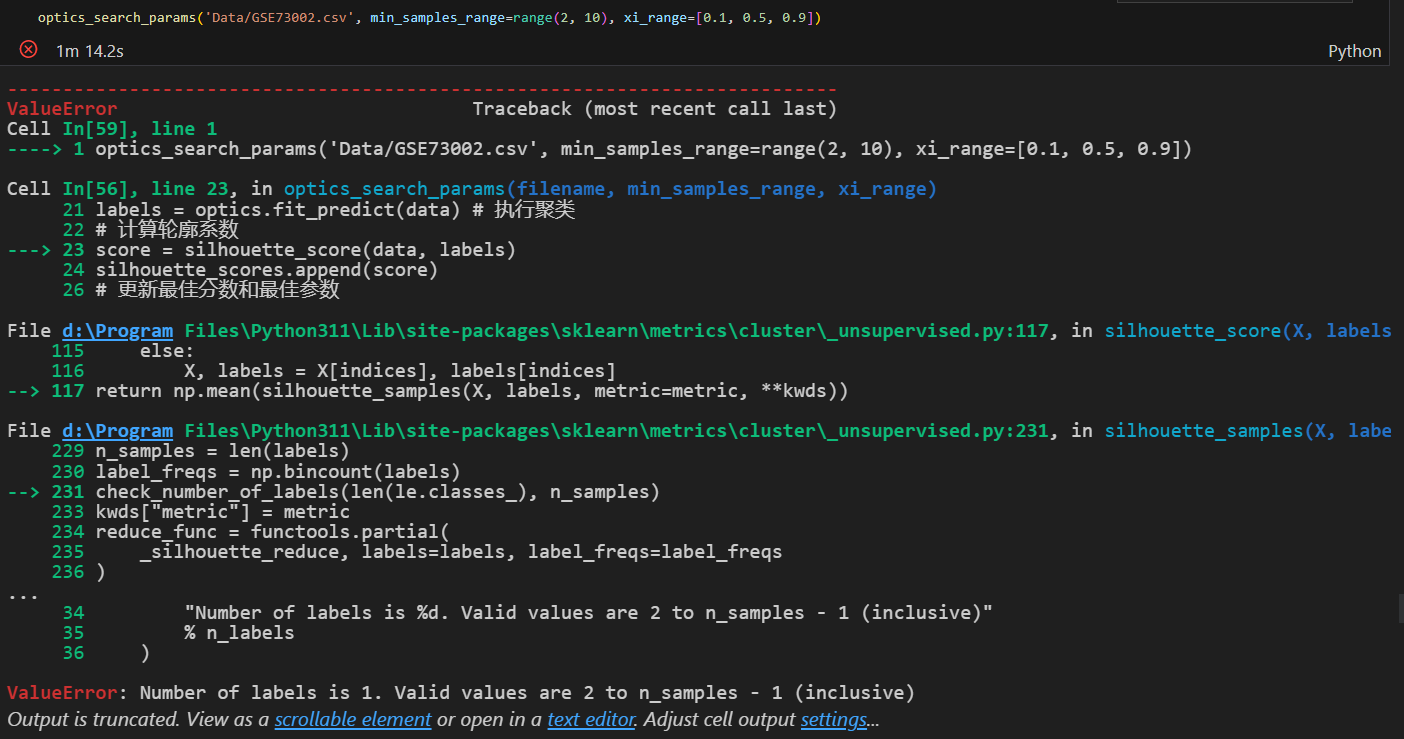

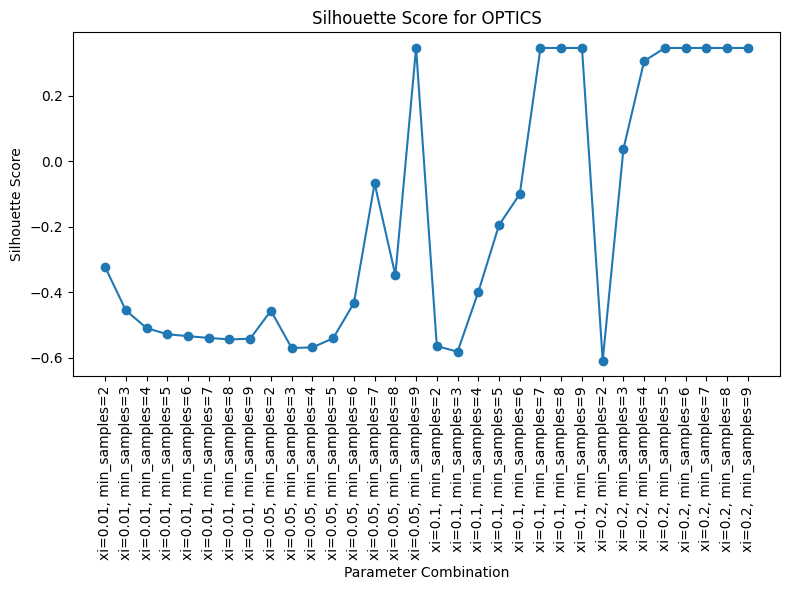

Best Parameters: {'xi': 0.05, 'min_samples': 9}
Best Silhouette Score: 0.344907356949071


In [368]:
optics_search_params('Data/GSE73002.csv', min_samples_range=range(2, 10), xi_range=[0.01, 0.05, 0.1, 0.2])

- 寻找GSE137140数据集的最佳参数

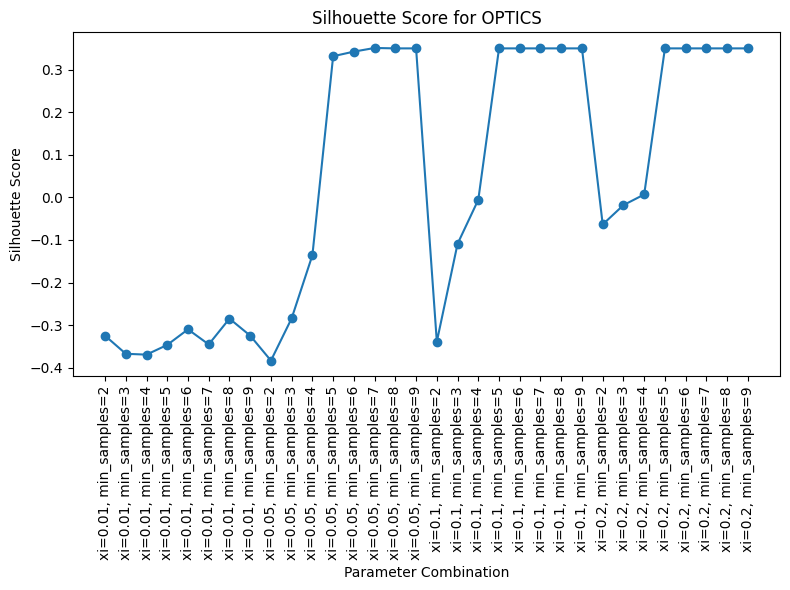

Best Parameters: {'xi': 0.05, 'min_samples': 7}
Best Silhouette Score: 0.3514871599610578


In [369]:
optics_search_params('Data/GSE137140.csv', min_samples_range=range(2, 10), xi_range=[0.01, 0.05, 0.1, 0.2])

### 8.2 数据集聚类、结果可视化和打印评估指标

- 使用 OPTICS 聚类算法对给定的数据进行聚类，并绘制了散点图、轮廓图以及计算了轮廓系数、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index兰德指数和Fowlkes-Mallows scores。

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

def my_optics(filename, eps, min_samples, true_labels_filename):
    data = pd.read_csv(filename)  # 读取数据

    optics = OPTICS(eps=eps, min_samples=min_samples)  # 创建 OPTICS 对象
    labels = optics.fit_predict(data)  # 执行聚类

    # 绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('OPTICS Clustering')
    plt.show()

    # # 计算轮廓系数
    silhouette_avg = silhouette_score(data, labels)
    # print("Average Silhouette Score:", silhouette_avg)

    # 计算每个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(data, labels)

    # 绘制轮廓图
    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(max(labels) + 1):
        # 获取当前簇的轮廓系数
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / max(labels))
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            fontsize=10,
            ha='center',
            va='center',
        )

        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for OPTICS")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    # 绘制平均轮廓系数竖线
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # 清除y轴标签
    plt.show()

    true_labels = pd.read_csv(true_labels_filename)  # 读取真实标签数据
    true_labels = true_labels.squeeze()  # 将标签数据转换为一维数组

    # 打印轮廓系数
    print("Silhouette Coefficient:", silhouette_avg)
    # 打印Calinski-Harabasz指数
    calinski_harabasz = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    # 打印Davies-Bouldin指数
    davies_bouldin = metrics.davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    # 计算Rand index
    rand_index = adjusted_rand_score(true_labels, labels)
    print("Rand index:", rand_index)

    # 计算Fowlkes-Mallows scores
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows scores:", fowlkes_mallows)

- OPTICS聚类GSE73002数据集

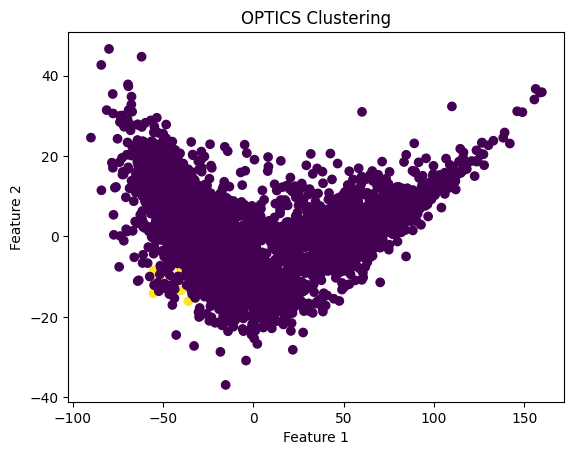

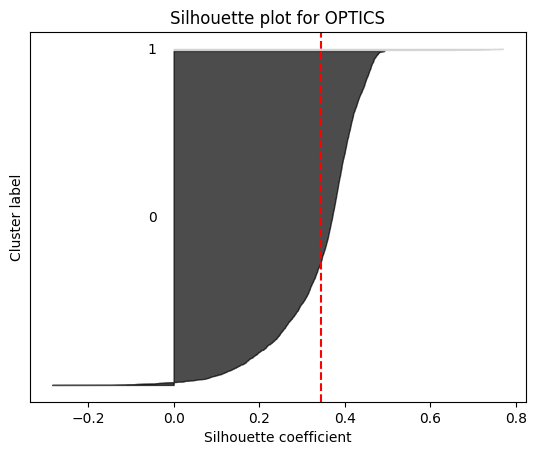

Silhouette Coefficient: 0.344907356949071
Calinski-Harabasz Index: 37.71588663397216
Davies-Bouldin Index: 0.7745211628898943
Rand index: 0.0062080642247839225
Fowlkes-Mallows scores: 0.7224449554063443


In [371]:
my_optics('Data/GSE73002.csv', eps=0.05, min_samples=9, true_labels_filename='Data/GSE73002_labels.csv')

- OPTICS聚类GSE137140数据集

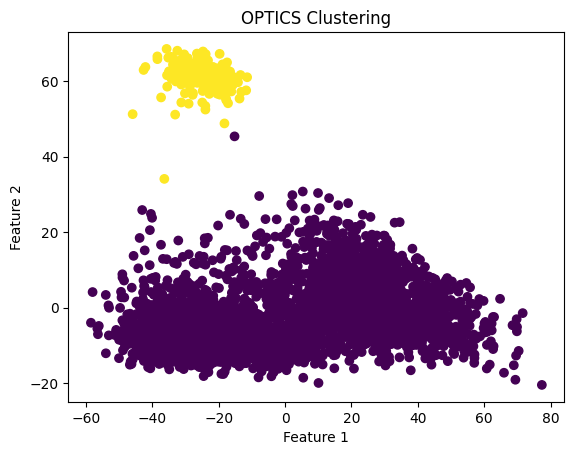

C:\Users\Admin\AppData\Local\Temp\ipykernel_14712\2788858622.py:39: RuntimeWarning: invalid value encountered in divide
  color = plt.cm.nipy_spectral(float(i) / max(labels))


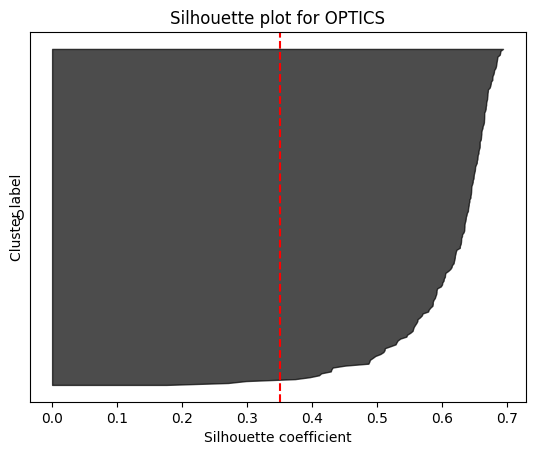

Silhouette Coefficient: 0.3514871599610578
Calinski-Harabasz Index: 508.2286120153844
Davies-Bouldin Index: 0.8961529273977833
Rand index: 0.15182904200068853
Fowlkes-Mallows scores: 0.7160965669398324


In [373]:
my_optics('Data/GSE137140.csv', eps=0.05, min_samples=7, true_labels_filename='Data/GSE137140_labels.csv') 

## 九、高斯混合模型(Gaussian Mixture Model)
### 9.1 网格搜索调参

- 使用高斯混合模型对数据进行聚类，使用网格搜索来寻找最优参数n_components_range和covariance_type_range，并在聚类时使用轮廓系数作为评价指标。

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

def gmm_search_param(filename, n_components_range, covariance_type_range):
    data = pd.read_csv(filename)  # 读取数据

    # 定义参数范围
    params = {'n_components': n_components_range, 'covariance_type': covariance_type_range}

    # 创建高斯混合模型对象
    gmm = GaussianMixture(random_state=0)

    # 自定义评价指标函数
    def custom_scorer(estimator, X):
        labels = estimator.fit_predict(X)
        return silhouette_score(X, labels) # 轮廓系数被用作参数优化的依据

    # 使用网格搜索进行参数调优
    grid_search = GridSearchCV(gmm, params, scoring=custom_scorer, cv=5)
    grid_search.fit(data)

    # 获取最佳参数
    best_n_components = grid_search.best_params_['n_components']
    best_covariance_type = grid_search.best_params_['covariance_type']
    print("Best Number of Components:", best_n_components)
    print("Best Covariance Type:", best_covariance_type)

    # 可视化网格搜索结果
    scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(n_components_range), len(covariance_type_range))
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt='.3f', xticklabels=covariance_type_range, yticklabels=n_components_range, cmap='viridis')
    plt.xlabel('Covariance Type')
    plt.ylabel('Number of Components')
    plt.title('Grid Search Results - Silhouette Score')
    plt.show()

- 网格搜索GSE73002数据集的最优参数

d:\Program Files\Python311\Lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
d:\Program Files\Python311\Lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Best Number of Components: 2
Best Covariance Type: tied


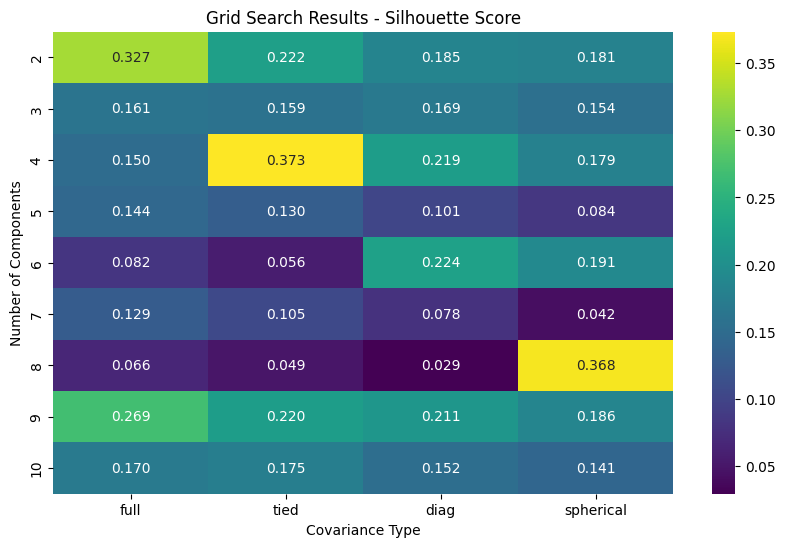

In [375]:
gmm_search_param('Data/GSE73002.csv', n_components_range=range(2, 11), covariance_type_range=['full', 'tied', 'diag', 'spherical'])

- 网格搜索GSE137140数据集的最优参数

d:\Program Files\Python311\Lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
d:\Program Files\Python311\Lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Best Number of Components: 2
Best Covariance Type: full


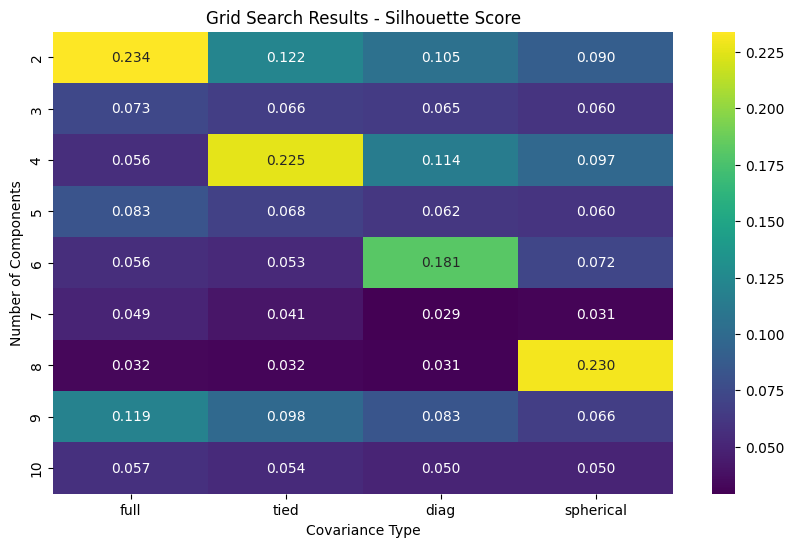

In [376]:
gmm_search_param('Data/GSE137140.csv', n_components_range=range(2, 11), covariance_type_range=['full', 'tied', 'diag', 'spherical'])

### 9.2 数据集聚类、结果可视化和打印评估指标
- 使用给定的参数（n_components和covariance_type）创建了一个GMM对象，并将其应用于数据集进行聚类，然后绘制了聚类结果的散点图，并计算了轮廓系数。同时，使用轮廓系数绘制了轮廓图，展示了每个簇的轮廓系数分布情况。然后，代码计算了其他评价指标，包Calinski-Harabasz指数、Davies-Bouldin指数、Rand index和Fowlkes-Mallows score，并将它们打印出来。

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, fowlkes_mallows_score
from sklearn.model_selection import GridSearchCV

def my_gmm(filename, n_components, covariance_type, true_labels_filename):
    data = pd.read_csv(filename)  # 读取数据
    true_labels = pd.read_csv(true_labels_filename).values.ravel() # 读取真实标签数据

    # 使用最佳参数进行聚类
    gmm_best = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=0)
    labels = gmm_best.fit_predict(data)

    # 绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Gaussian Mixture Model Clustering')
    plt.colorbar()
    plt.show()

    # 计算轮廓系数
    silhouette_avg = silhouette_score(data, labels)
    # 绘制轮廓图
    sample_silhouette_values = silhouette_samples(data, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(n_components):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_components)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            fontsize=10,
            ha='center',
            va='center',
        )

        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for Gaussian Mixture Model")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()


    print("Silhouette Coefficient:", silhouette_avg) # 打印轮廓系数
    # 计算Calinski-Harabasz指数
    calinski_harabasz = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)

    # 计算Davies-Bouldin指数
    davies_bouldin = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    # 计算评价指标
    rand_index = rand_score(true_labels, labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)

    print("Rand index:", rand_index) # 打印Rand index
    print("Fowlkes-Mallows score:", fowlkes_mallows) # 打印Fowlkes-Mallows score

- 高斯混合模型对GSE73002数据集聚类

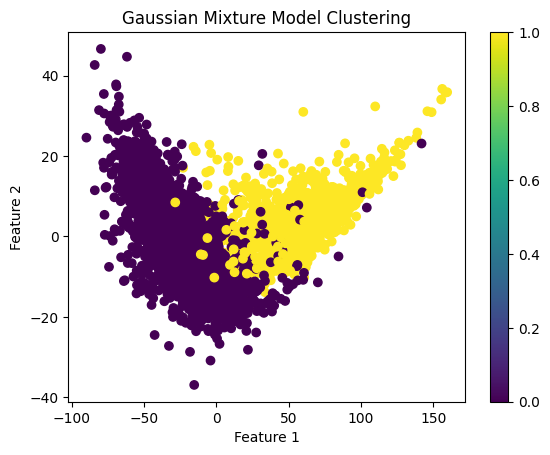

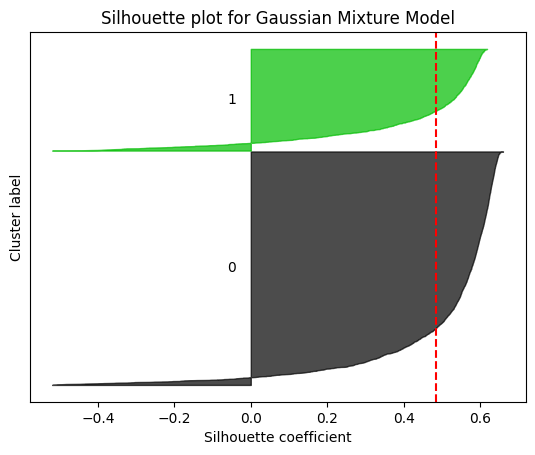

Silhouette Coefficient: 0.4840620038774371
Calinski-Harabasz Index: 4877.282804485292
Davies-Bouldin Index: 0.7741038008487785
Rand index: 0.9202230027026674
Fowlkes-Mallows score: 0.9286056309590542


In [378]:
my_gmm('Data/GSE73002.csv', n_components=2, covariance_type='tied', true_labels_filename='Data/GSE73002_labels.csv')

- 高斯混合模型对GSE137140数据集聚类

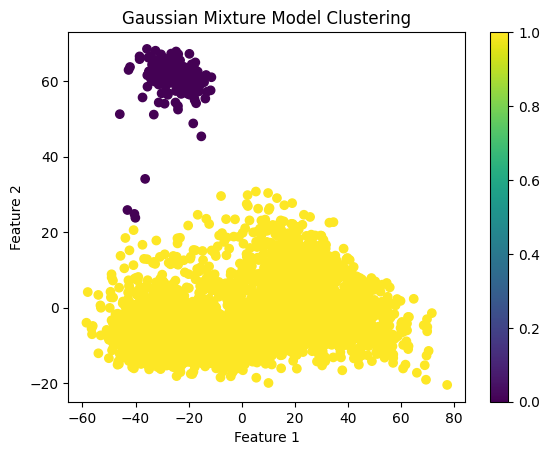

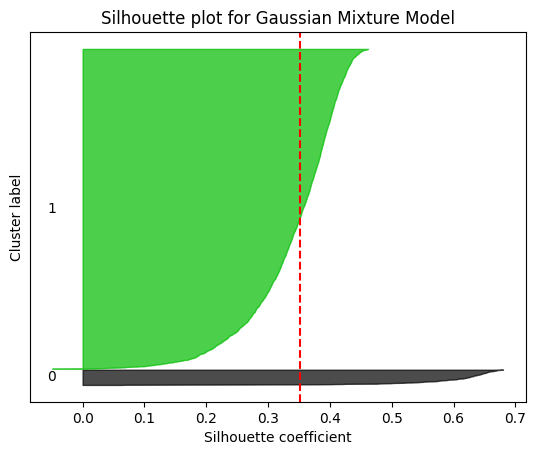

Silhouette Coefficient: 0.3517403234887526
Calinski-Harabasz Index: 509.6772830455284
Davies-Bouldin Index: 0.9220565165190235
Rand index: 0.5545272229458877
Fowlkes-Mallows score: 0.7155626477937428


In [379]:
my_gmm('Data/GSE137140.csv', n_components=2, covariance_type='full', true_labels_filename='Data/GSE137140_labels.csv')

## 十、Mean Shift
### 10.1 调参
- 使用Mean Shift对数据进行聚类，使用网格搜索来寻找最优参数bandwidth_range，并在聚类时使用轮廓系数作为评价指标。

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def meanshift_search_param(filename, bandwidth_range):
    # 读取数据集
    data = pd.read_csv(filename)
    # 定义带宽参数范围
    bandwidth_range = bandwidth_range

    # 初始化最佳分数和最佳参数
    best_sscore = -1
    best_chscore = 0
    best_dbscore = 100
    best_sbandwidth = None
    best_chbandwidth = None
    best_dbbandwidth = None

    # 保存评估指标
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    # 遍历带宽参数范围
    for bandwidth in bandwidth_range:
        # 创建Mean Shift聚类对象
        ms = MeanShift(bandwidth=bandwidth)
        # 执行Mean Shift聚类
        labels = ms.fit_predict(data)
        # 计算评估指标
        silhouette_avg = silhouette_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        # 保存评估指标
        silhouette_scores.append(silhouette_avg)
        calinski_harabasz_scores.append(calinski_harabasz)
        davies_bouldin_scores.append(davies_bouldin)
        # 更新最佳分数和最佳参数
        if silhouette_avg > best_sscore:
            best_sscore = silhouette_avg
            best_sbandwidth = bandwidth
        if calinski_harabasz > best_chscore:
            best_chscore = calinski_harabasz
            best_chbandwidth = bandwidth
        if davies_bouldin < best_dbscore:
            best_dbscore = davies_bouldin
            best_dbbandwidth = bandwidth
        # 打印当前带宽参数的评估指标
        print(f"Bandwidth={bandwidth}:")
        print("Silhouette Score:", silhouette_avg)
        print("Calinski-Harabasz Score:", calinski_harabasz)
        print("Davies-Bouldin Score:", davies_bouldin)
        print()

    # 输出最佳参数和最佳分数
    print("Bandwidth with Best Silhouette Score:", best_sbandwidth)
    print("Bandwidth with Best Calinski-Harabasz Score:", best_chbandwidth)
    print("Bandwidth with Best Davies-Bouldin Score:", best_dbbandwidth)


    # 绘制带宽参数与评估指标之间的关系图
    plt.figure(figsize=(10, 6))
    plt.plot(bandwidth_range, silhouette_scores, label='Silhouette Score')
    plt.plot(bandwidth_range, calinski_harabasz_scores, label='Calinski-Harabasz Score')
    plt.plot(bandwidth_range, davies_bouldin_scores, label='Davies-Bouldin Score')
    plt.xlabel('Bandwidth')
    plt.ylabel('Score')
    plt.title('Mean Shift Clustering Parameter Tuning')
    plt.yscale('log')  # 设置y轴为对数刻度
    plt.legend()
    plt.grid(True)
    plt.show()

- 调用meanshift_search_param，搜索GSE73002数据集的最优参数

Bandwidth=8:
Silhouette Score: 0.004385838308376867
Calinski-Harabasz Score: 81.90686841765873
Davies-Bouldin Score: 0.21383765085164225

Bandwidth=9:
Silhouette Score: 0.009514828054954943
Calinski-Harabasz Score: 51.3227380133752
Davies-Bouldin Score: 0.35447662153169684

Bandwidth=10:
Silhouette Score: 0.009911145271559138
Calinski-Harabasz Score: 40.66635049662225
Davies-Bouldin Score: 0.46004981024680563

Bandwidth=11:
Silhouette Score: 0.0011195742551582957
Calinski-Harabasz Score: 36.06843483007611
Davies-Bouldin Score: 0.5636077137255426

Bandwidth=12:
Silhouette Score: -0.011555332624601903
Calinski-Harabasz Score: 36.37175815206657
Davies-Bouldin Score: 0.6777610541017073

Bandwidth=13:
Silhouette Score: -0.019505676972285717
Calinski-Harabasz Score: 39.16219023649
Davies-Bouldin Score: 0.7898787581650569

Bandwidth=14:
Silhouette Score: -0.016329813015489122
Calinski-Harabasz Score: 45.1196422974551
Davies-Bouldin Score: 0.9159149766000052

Bandwidth with Best Silhouette Sco

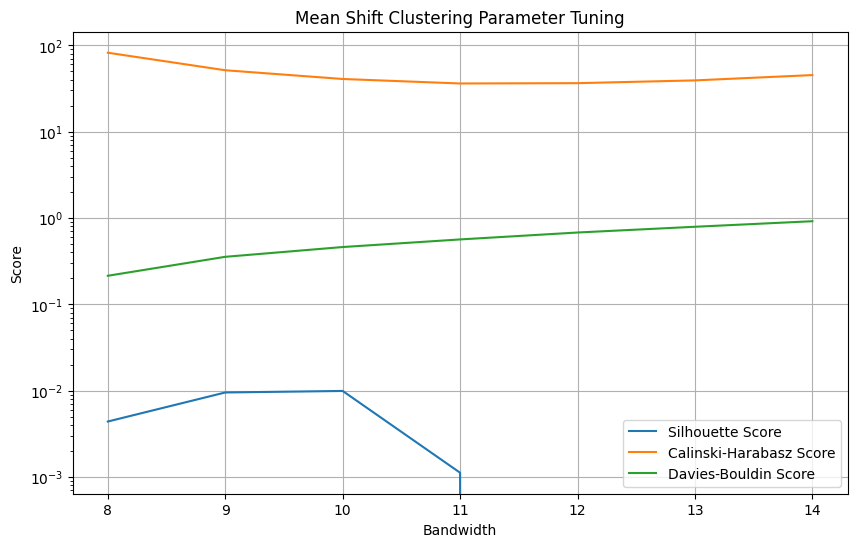

In [382]:
meanshift_search_param('Data/GSE73002.csv', bandwidth_range=np.arange(8,15,1))

- 调用meanshift_search_param，搜索GSE137140数据集的最优参数

Bandwidth=9:
Silhouette Score: 0.00011752078717924427
Calinski-Harabasz Score: 49.85802030632222
Davies-Bouldin Score: 0.05622828553183216

Bandwidth=10:
Silhouette Score: 0.0003959989202214269
Calinski-Harabasz Score: 41.623332667320796
Davies-Bouldin Score: 0.07280495375566357

Bandwidth=11:
Silhouette Score: 0.0011488959097577499
Calinski-Harabasz Score: 25.86953131509551
Davies-Bouldin Score: 0.12221159643366353

Bandwidth=12:
Silhouette Score: 0.00024133332589113638
Calinski-Harabasz Score: 17.79508560028627
Davies-Bouldin Score: 0.14112876069572952

Bandwidth=13:
Silhouette Score: 0.00028217286406882725
Calinski-Harabasz Score: 15.431690049760267
Davies-Bouldin Score: 0.15086320573202655

Bandwidth=14:
Silhouette Score: 0.0006240269074913127
Calinski-Harabasz Score: 12.47159899164673
Davies-Bouldin Score: 0.16414766792857638

Bandwidth with Best Silhouette Score: 11
Bandwidth with Best Calinski-Harabasz Score: 9
Bandwidth with Best Davies-Bouldin Score: 9


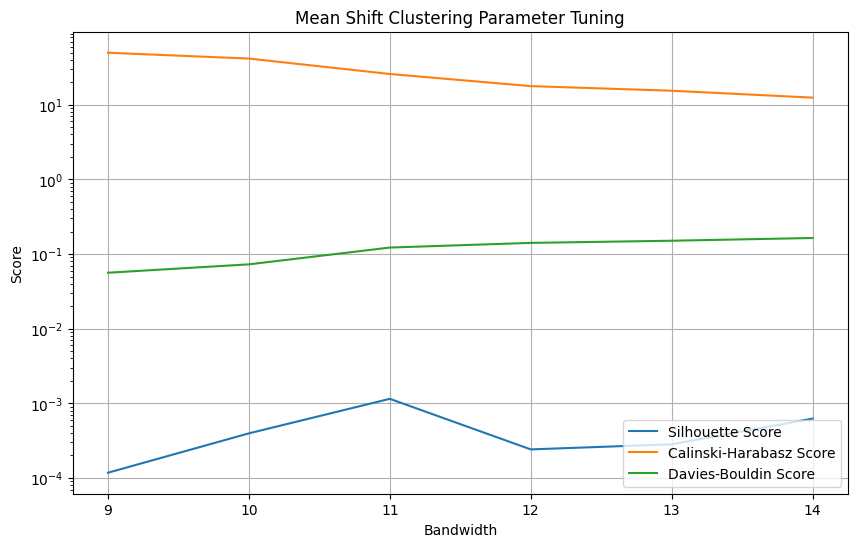

In [383]:
meanshift_search_param('Data/GSE137140.csv', bandwidth_range=np.arange(9,15,1))

### 10.2 数据集聚类、结果可视化和打印评估指标

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, fowlkes_mallows_score

def my_meanshift(filename, bandwidth, true_labels_filename):
    # 读取数据集
    data = pd.read_csv(filename)
    # 读取真实标签数据
    true_labels = pd.read_csv(true_labels_filename).values.ravel()
    # 设置最佳带宽
    best_bandwidth = bandwidth

    # 创建Mean Shift聚类对象
    ms = MeanShift(bandwidth=best_bandwidth)
    # 执行Mean Shift聚类
    labels = ms.fit_predict(data)

    # 绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Mean Shift Clustering')
    plt.colorbar()
    plt.show()

    # 计算轮廓系数
    silhouette_avg = silhouette_score(data, labels)
    # 绘制轮廓图
    sample_silhouette_values = silhouette_samples(data, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    for i in np.unique(labels):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(np.unique(labels)))
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            fontsize=10,
            ha='center',
            va='center',
        )

        y_lower = y_upper + 10

    ax.set_title("Silhouette Plot for Mean Shift Clustering")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()

    print("Silhouette Coefficient:", silhouette_avg)  # 打印轮廓系数

    # 计算Calinski-Harabasz指数
    calinski_harabasz = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)

    # 计算Davies-Bouldin指数
    davies_bouldin = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    # 计算评价指标
    rand_index = rand_score(true_labels, labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)

    print("Rand index:", rand_index)  # 打印Rand index
    print("Fowlkes-Mallows score:", fowlkes_mallows)  # 打印Fowlkes-Mallows score

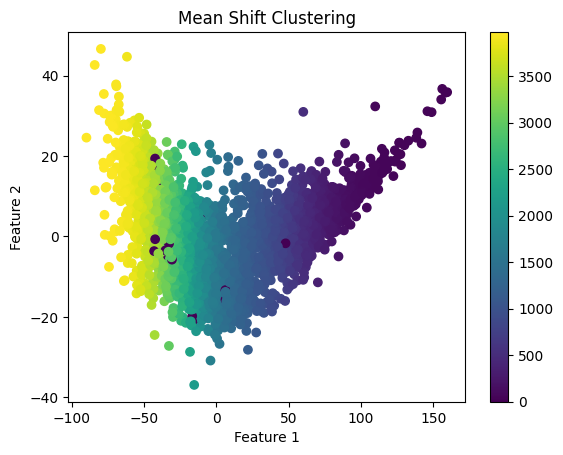

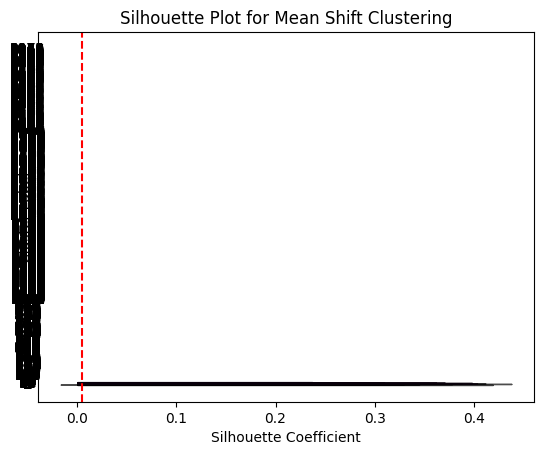

Silhouette Coefficient: 0.004385838308376867
Calinski-Harabasz Index: 81.90686841765873
Davies-Bouldin Index: 0.21383765085164225
Rand index: 0.4774115571206613
Fowlkes-Mallows score: 0.0029681507961996064


In [385]:
my_meanshift('Data/GSE73002.csv', bandwidth=8, true_labels_filename='Data/GSE73002_labels.csv')

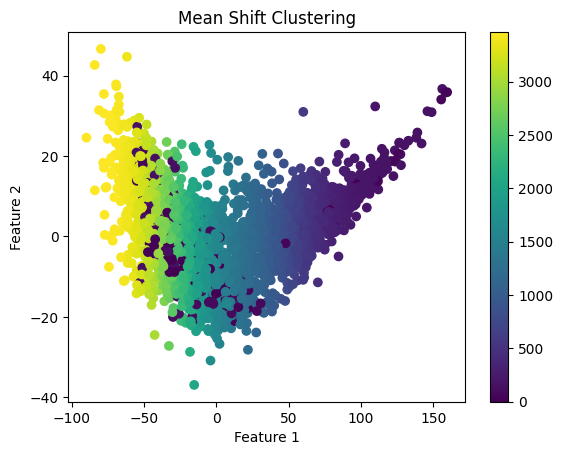

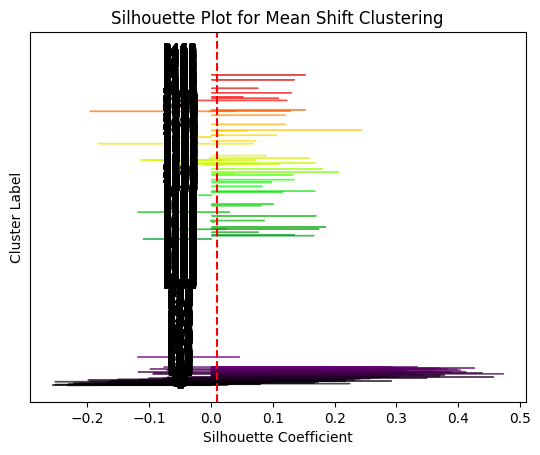

Silhouette Coefficient: 0.009911145271559138
Calinski-Harabasz Index: 40.66635049662225
Davies-Bouldin Index: 0.46004981024680563
Rand index: 0.47779591161711776
Fowlkes-Mallows score: 0.027281499666220645


In [386]:
my_meanshift('Data/GSE73002.csv', bandwidth=10, true_labels_filename='Data/GSE73002_labels.csv')

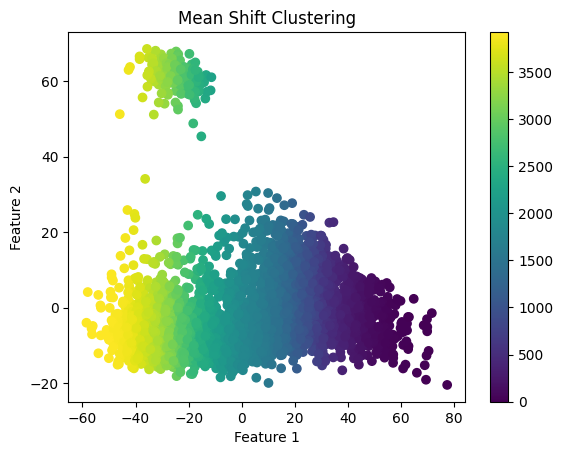

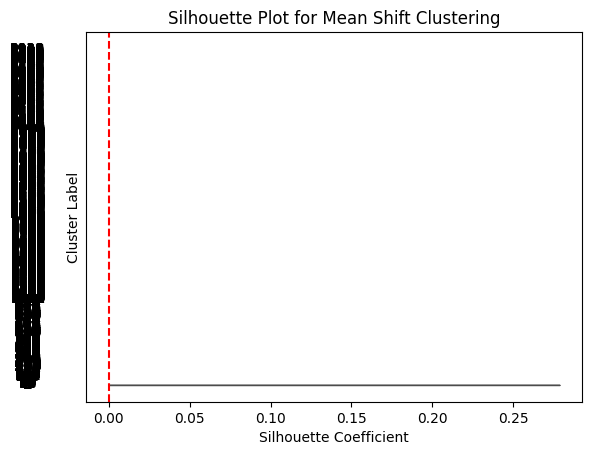

Silhouette Coefficient: 0.00011752078717924427
Calinski-Harabasz Index: 49.85802030632222
Davies-Bouldin Index: 0.05622828553183216
Rand index: 0.5306883553252298
Fowlkes-Mallows score: 0.0005261512653963133


In [387]:
my_meanshift('Data/GSE137140.csv', bandwidth=9, true_labels_filename='Data/GSE137140_labels.csv')

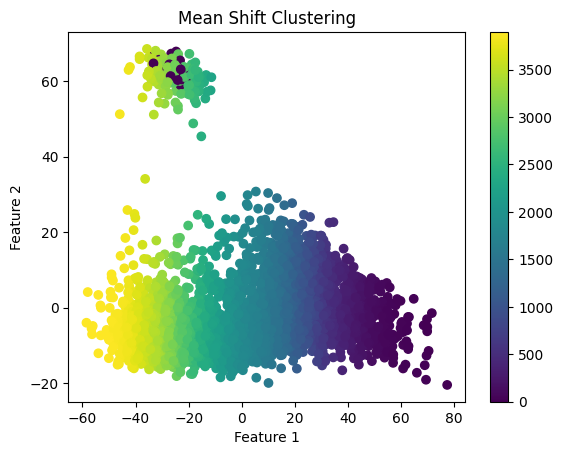

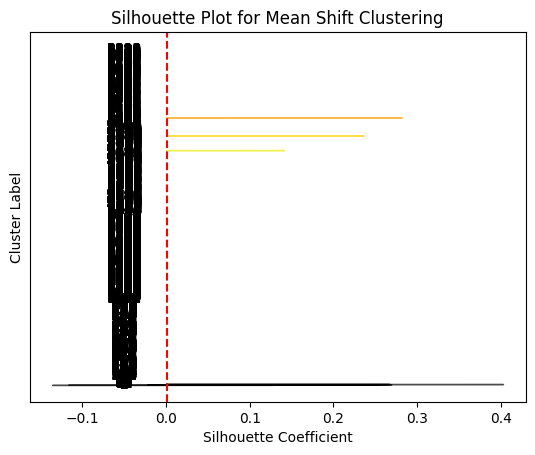

Silhouette Coefficient: 0.0011488959097577499
Calinski-Harabasz Index: 25.86953131509551
Davies-Bouldin Index: 0.12221159643366353
Rand index: 0.5306977097090448
Fowlkes-Mallows score: 0.004495438382149659


In [389]:
my_meanshift('Data/GSE137140.csv', bandwidth=11, true_labels_filename='Data/GSE137140_labels.csv')

## 十一、Affinity Propagation

### 11.1调参

- 通过调整AffinityPropagation模型的参数damping来寻找最优的参数值，最终输出最优的damping值。在这个过程中，每个damping值都会被用来计算对应的聚类结果的轮廓系数。轮廓系数用于衡量聚类结果的质量，轮廓系数越大则聚类结果越好。在代码的最后，使用Matplotlib进行数据可视化，展示轮廓系数对damping值的变化：

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

def ap_searech_param(filename, damping_range):
    data = pd.read_csv(filename)
    damping_range = damping_range

    silhouette_scores = [] # 存储不同参数下的轮廓系数
    for damping in damping_range:
        ap = AffinityPropagation(damping=damping)
        labels = ap.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels)) # 计算轮廓系数
    plt.figure(figsize=(10, 6))
    plt.plot(damping_range, silhouette_scores, marker='o')
    plt.xlabel('Damping')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()
    best_damping_index = silhouette_scores.index(max(silhouette_scores))
    best_damping = damping_range[best_damping_index]
    print("Best damping value:", best_damping)

- 分别寻找两个数据集的最优参数：

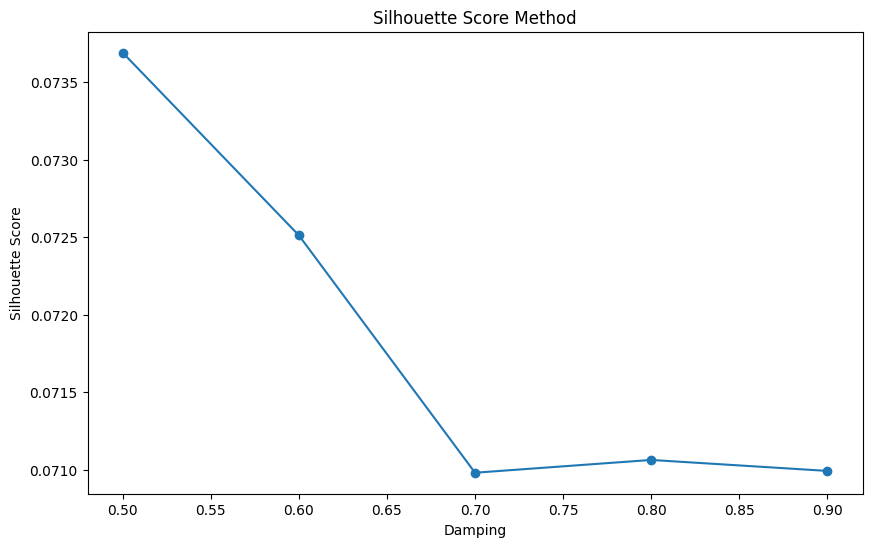

Best damping value: 0.5


In [395]:
ap_searech_param('Data/GSE73002.csv', damping_range=[0.5, 0.6, 0.7, 0.8, 0.9]) 

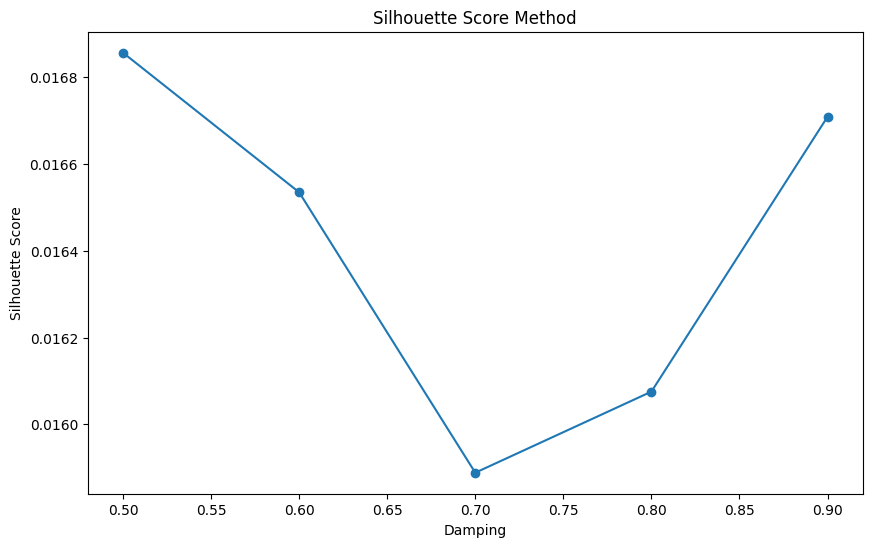

Best damping value: 0.5


In [392]:
ap_searech_param('Data/GSE137140.csv', damping_range=[0.5, 0.6, 0.7, 0.8, 0.9])

### 11.2 数据集聚类、结果可视化和打印评估指标

- 进行亲和传播聚类（Affinity Propagation Clustering）并评估聚类质量的代码。首先，通过pandas库读取数据并创建AffinityPropagation对象，传入阻尼因子（damping）参数。然后，使用传入的数据执行聚类并得到聚类标签。接下来，通过matplotlib库将聚类结果可视化，包括散点图和轮廓图。最后，使用sklearn.metrics中的一些评估指标计算聚类质量，包括轮廓系数（Silhouette Coefficient）、Calinski-Harabasz指数、Davies-Bouldin指数、Rand index和Fowlkes-Mallows score。

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, fowlkes_mallows_score

def my_affinity_propagation(filename, damping, true_labels_filename):
    data = pd.read_csv(filename)  # 读取数据
    true_labels = pd.read_csv(true_labels_filename).values.ravel() # 读取真实标签
    
    affinity_prop = AffinityPropagation(damping=damping)  # 创建 Affinity Propagation 对象
    labels = affinity_prop.fit_predict(data)  # 执行聚类

    # 绘制散点图
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Affinity Propagation Clustering')
    plt.colorbar()
    plt.show()

    # 计算轮廓系数
    silhouette_avg = silhouette_score(data, labels)

    # 绘制轮廓图
    plt.figure(figsize=(7, 5))
    silhouette_values = silhouette_samples(data, labels)
    y_lower = 10
    for i in np.unique(labels):
        ith_cluster_silhouette_values = silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for Affinity Propagation Clustering")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()

    print("Silhouette Coefficient:", silhouette_avg)
    # 计算Calinski-Harabasz指数
    calinski_harabasz = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)

    # 计算Davies-Bouldin指数
    davies_bouldin = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin)

    # 计算Rand index
    rand_index = rand_score(true_labels, labels)
    print("Rand Index:", rand_index)

    # 计算Fowlkes-Mallows score
    fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)
    print("Fowlkes-Mallows Score:", fowlkes_mallows)

- 分别对两个数据集聚类：

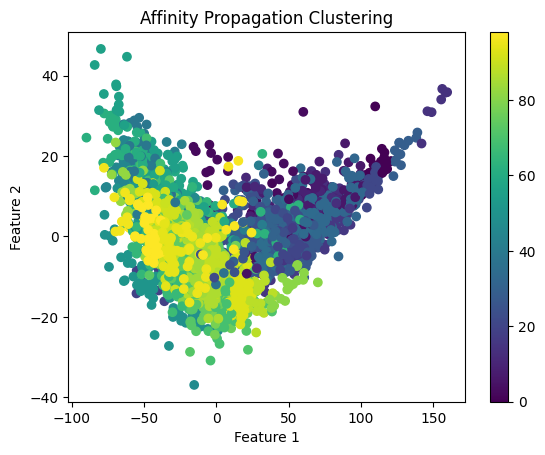

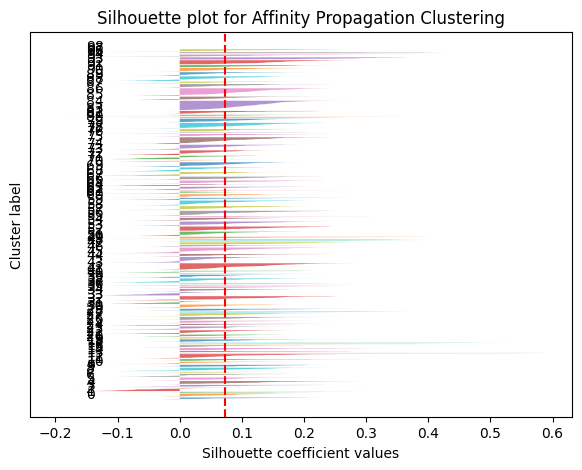

Silhouette Coefficient: 0.07368851716570343
Calinski-Harabasz Index: 367.222918880252
Davies-Bouldin Index: 2.124521659768364
Rand Index: 0.4897493240222804
Fowlkes-Mallows Score: 0.15376176166738695


In [397]:
my_affinity_propagation('Data/GSE73002.csv', damping=0.5, true_labels_filename='Data/GSE73002_labels.csv')

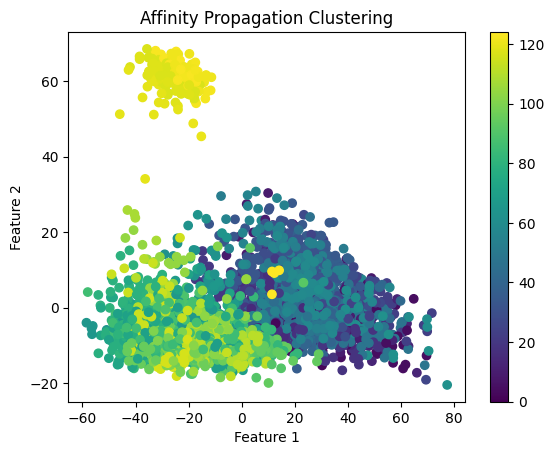

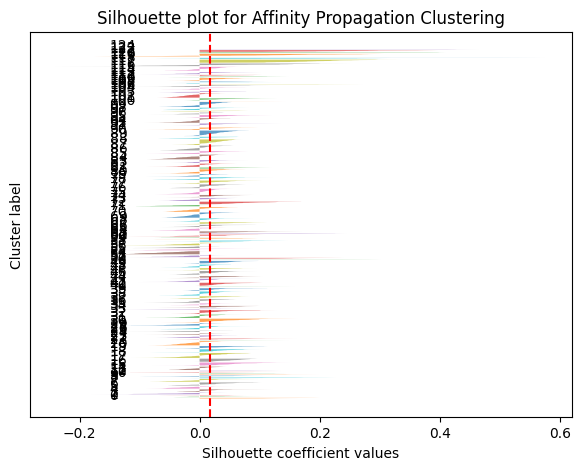

Silhouette Coefficient: 0.016856660629001128
Calinski-Harabasz Index: 57.24597660081103
Davies-Bouldin Index: 2.936368286119751
Rand Index: 0.5410410597685361
Fowlkes-Mallows Score: 0.1487212137898237


In [398]:
my_affinity_propagation('Data/GSE137140.csv', damping=0.5, true_labels_filename='Data/GSE137140_labels.csv')

## 十二、对比分析

### 12.1 Mini Batch K-Mean 与 K-Means

- 计算效率：

    虽然Mini Batch K-Means相对于传统的K-Means算法在处理大规模数据集时具有一定的计算效率优势，但在三个数据集中，<mark>Mini Batch K-Means运行时间与K-Means相近或甚至更长。</mark>

    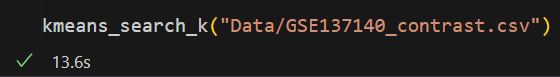
    
    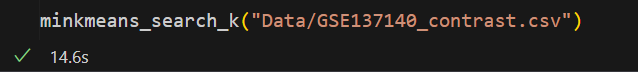

    经分析，下面是一些主要原因：

    - 数据集大小：Mini Batch K-Means的优势主要在于处理大规模数据集时，因为它只使用数据集的子集（即小批量）进行更新，而不是使用整个数据集。由于数据集的大小与内存容量相比较小，那么K-Means算法会更快，因为它可以一次性处理整个数据集。

    - 簇的数量：Mini Batch K-Means的性能通常与簇的数量成正比。由于簇的数量较少，Mini Batch K-Means会因为额外的更新操作而导致运行时间较长，而K-Means只需进行一次迭代即可。

- 聚类质量：
    
    通过对GSE73002(数据集1)、GSE137140(数据集2)和GSE73002_contrast(数据集3)上的K-Means和Mini Batch K-Means算法的五个聚类指标进行分析，可以得到以下观察：
    - Silhouette Coefficient（轮廓系数）：
        - 在数据集1上，K-Means和Mini Batch K-Means算法的轮廓系数都为0.33，表示聚类结果的紧密度较高。
        - 在数据集2上，K-Means的轮廓系数为0.31，而Mini Batch K-Means的轮廓系数为0.18，说明K-Means在该数据集上的聚类效果更好。
        - 在数据集3上，K-Means的轮廓系数为0.22，而Mini Batch K-Means的轮廓系数为0.12，同样表明K-Means在该数据集上的聚类效果更好。
    - Calinski-Harabasz Index（Calinski-Harabasz指数）：
        - 在数据集1、数据集2和数据集3上，K-Means的Calinski-Harabasz指数都略高于Mini Batch K-Means指数，这表示K-Means算法在这些数据集上的聚类结果更优。
    - Davies-Bouldin Index（Davies-Bouldin指数）：
        - 在数据集1和数据集2上，K-Means和Mini Batch K-Means算法的Davies-Bouldin指数非常接近，表明它们在这些数据集上的聚类效果相似。
        - 在数据集3上，K-Means的Davies-Bouldin指数较低，而Mini Batch K-Means的指数较高，说明K-Means在该数据集上的聚类效果更好。
    - Rand index（兰德指数）：
        - 在数据集1、数据集2和数据集3上，K-Means和Mini Batch K-Means算法的Rand index相对接近，表明它们在这些数据集上的聚类结果有较高的一致性。
    - Fowlkes-Mallows scores（Fowlkes-Mallows分数）：
        - 在数据集1和数据集3上，K-Means和Mini Batch K-Means算法的Fowlkes-Mallows分数相同，表示它们在这些数据集上的聚类结果相似。
        - 在数据集2上，K-Means的Fowlkes-Mallows分数较高，说明K-Means在该数据集上的聚类效果更好。

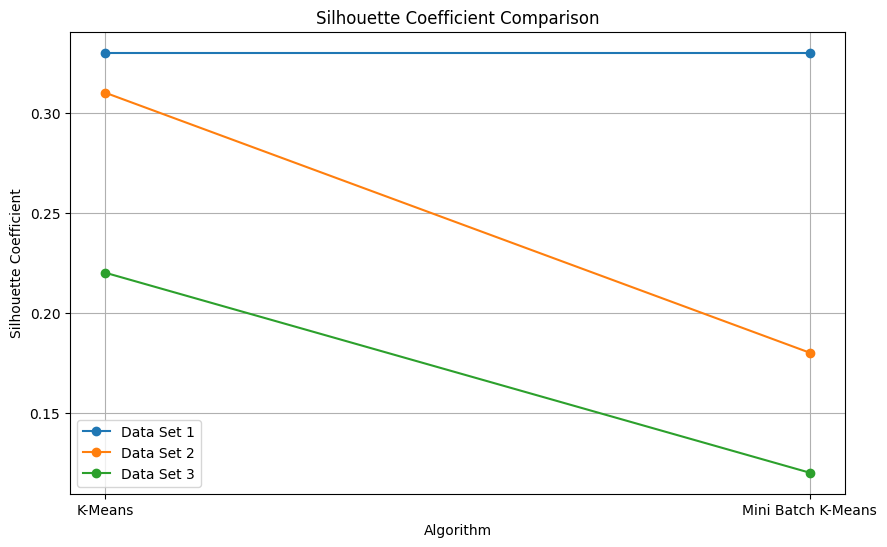

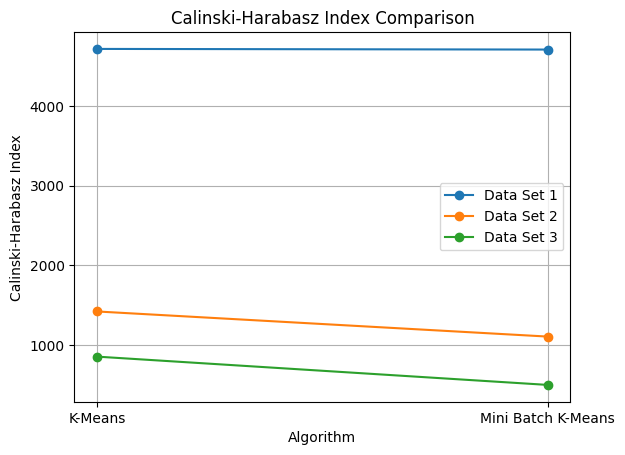

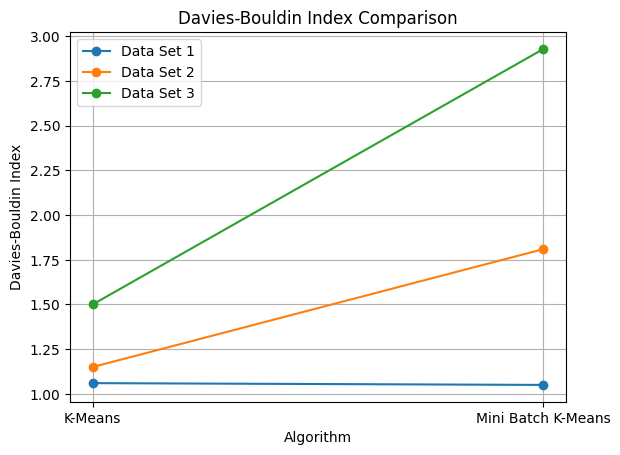

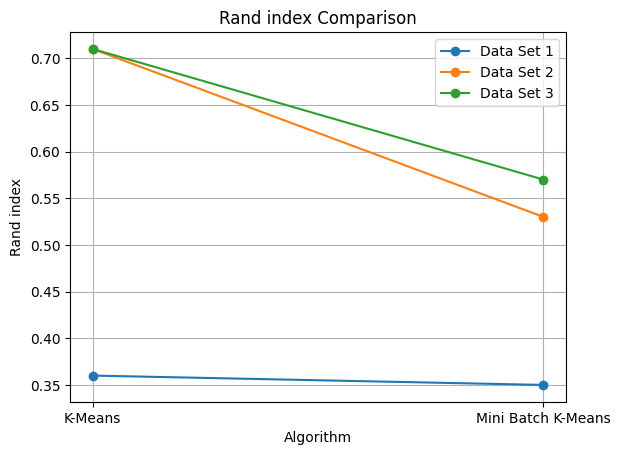

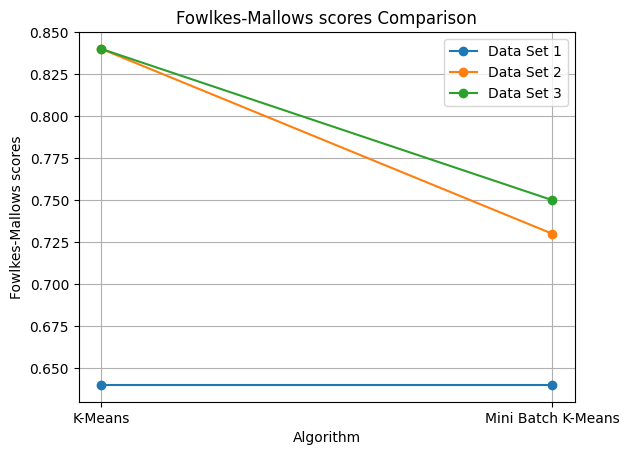

In [399]:
import matplotlib.pyplot as plt

# 聚类指标数据
data = {
    'Data Set 1': {
        'Silhouette Coefficient': [0.33, 0.33],
        'Calinski-Harabasz Index': [4718.74, 4710.75],
        'Davies-Bouldin Index': [1.06, 1.05],
        'Rand index': [0.36, 0.35],
        'Fowlkes-Mallows scores': [0.64, 0.64]
    },
    'Data Set 2': {
        'Silhouette Coefficient': [0.31, 0.18],
        'Calinski-Harabasz Index': [1420.57, 1104.86],
        'Davies-Bouldin Index': [1.15, 1.81],
        'Rand index': [0.71, 0.53],
        'Fowlkes-Mallows scores': [0.84, 0.73]
    },
    'Data Set 3': {
        'Silhouette Coefficient': [0.22, 0.12],
        'Calinski-Harabasz Index': [853.24, 497.72],
        'Davies-Bouldin Index': [1.50, 2.93],
        'Rand index': [0.71, 0.57],
        'Fowlkes-Mallows scores': [0.84, 0.75]
    }
}

# 聚类算法名称
algorithms = ['K-Means', 'Mini Batch K-Means']

# 聚类指标名称
metrics = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Rand index', 'Fowlkes-Mallows scores']

# 绘制折线图
plt.figure(figsize=(10, 6))

for metric in metrics:
    for i, dataset in enumerate(data.keys()):
        values = data[dataset][metric]
        plt.plot(algorithms, values, marker='o', label=dataset)

    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.title(metric + ' Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

### 12.2 GSE73002数据集

- Silhouette Coefficient（轮廓系数）：在大多数算法中，Silhouette Coefficient 的值都在 0.3 到 0.5 之间，表示聚类结果的一致性较好。其中，Hierarchical Clustering的 Silhouette Coefficient 较高，达到了 0.51，表明该算法在数据集上的聚类效果较好。

- Calinski-Harabasz Index（Calinski-Harabasz指数）：该指标越大表示聚类效果越好，具有较高的值意味着簇内的相似度高、簇间的差异性大。在给定的数据中，Hierarchical Clustering和 GMM 具有较高的 Calinski-Harabasz Index 值，分别为 5565.16 和 4877.28，表明它们在数据集上的聚类效果较好。

- Davies-Bouldin Index（Davies-Bouldin指数）：该指数越小表示聚类效果越好，反映了簇内的紧密度和簇间的分离程度。根据给定的数据，Mean Shift 具有最低的 Davies-Bouldin Index 值为 0.21，表明它在数据集上的聚类效果较好。

- Rand index（兰德指数）和 Fowlkes-Mallows scores（Fowlkes-Mallows分数）：这两个指标用于评估聚类结果与真实标签之间的相似度，值越接近 1 表示聚类结果与真实标签的一致性越高。根据给定的数据，GMM 具有较高的 Rand index 值和 Fowlkes-Mallows scores 值，表明它在数据集上的聚类效果较好。

    综合考虑这些指标，Hierarchical Clustering 在多个指标上表现较好，而 Mean Shift 在 Davies-Bouldin Index 上表现较好。故更推荐在GSE73002数据集上使用Hierarchical Clustering聚类算法。

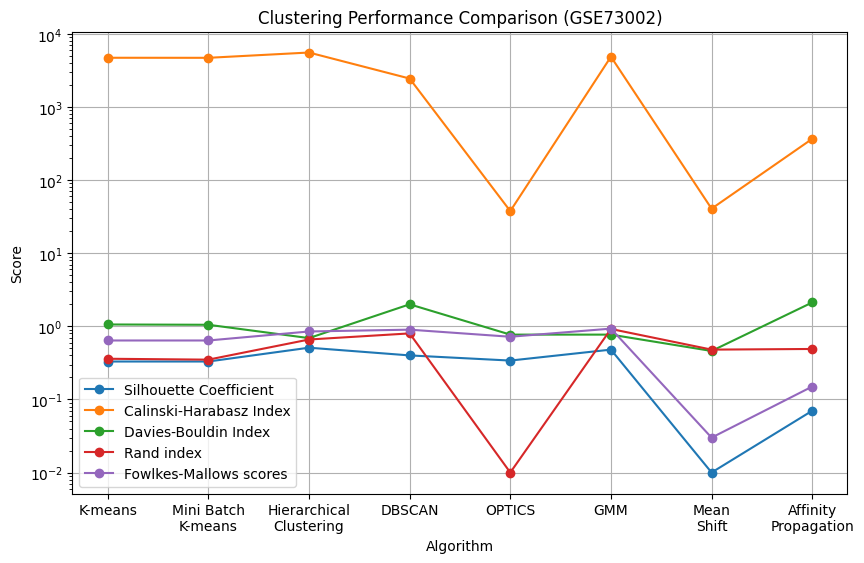

In [406]:
import matplotlib.pyplot as plt

# 聚类指标数据
data = {
    'Silhouette Coefficient': [0.33, 0.33, 0.51, 0.40, 0.34, 0.48, 0.01, 0.07],
    'Calinski-Harabasz Index': [4718.74, 4710.75, 5565.16, 2452.13, 37.72, 4877.28, 40.67, 367.22],
    'Davies-Bouldin Index': [1.06, 1.05, 0.69, 2.00, 0.77, 0.77, 0.46, 2.12],
    'Rand index': [0.36, 0.35, 0.66, 0.80, 0.01, 0.92, 0.48, 0.49],
    'Fowlkes-Mallows scores': [0.64, 0.64, 0.85, 0.9, 0.72, 0.93, 0.03, 0.15]
}

# 聚类算法名称
algorithms = ['K-means', 'Mini Batch\nK-means', 'Hierarchical\nClustering', 'DBSCAN', 'OPTICS', 'GMM', 'Mean\nShift', 'Affinity\nPropagation']

# 绘制折线图
plt.figure(figsize=(10, 6))

for metric, values in data.items():
    plt.plot(algorithms, values, marker='o', label=metric)

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.yscale('log')  # 设置对数刻度
plt.title('Clustering Performance Comparison (GSE73002)')
plt.legend()
plt.grid(True)
plt.show()


### 12.3 GSE137140数据集

- Silhouette Coefficient（轮廓系数）：K-means、Mini Batch K-means 和 Affinity Propagation 算法在数据集上表现相对较好，得分在较高的范围内，而 Mean Shift、Hierarchical Clustering、DBSCAN、OPTICS 和 GMM 的得分较低，甚至有为零的情况。

- Calinski-Harabasz Index（Calinski-Harabasz 指数）：Hierarchical Clustering、DBSCAN 和 OPTICS 算法的得分较低，而 K-means、Mini Batch K-means、Affinity Propagation 和 GMM 的得分较高。

- Davies-Bouldin Index（Davies-Bouldin 指数）：Hierarchical Clustering、DBSCAN 和 GMM 的得分较高，表明聚类结果的差异度较大。K-means 和 Mini Batch K-means 算法在数据集上表现相对较好。

- Rand index（兰德指数）：Hierarchical Clustering、DBSCAN 和 OPTICS 的得分较低，而 K-means、Mini Batch K-means、GMM 和 Affinity Propagation 的得分较高。

- Fowlkes-Mallows scores（Fowlkes-Mallows 分数）：Hierarchical Clustering、DBSCAN 和 Mean Shift 的得分较低，而 K-means、Mini Batch K-means、GMM 和 Affinity Propagation 的得分较高。

    综合分析，K-means 和 Mini Batch K-means 在多个指标上表现较好，而 Hierarchical Clustering、DBSCAN 和 OPTICS 在多个指标上表现较差。Affinity Propagation 和 GMM 在大部分指标上也取得了较好的结果。所以对于GSE137140数据聚集，更推荐使用K-means聚类算法。

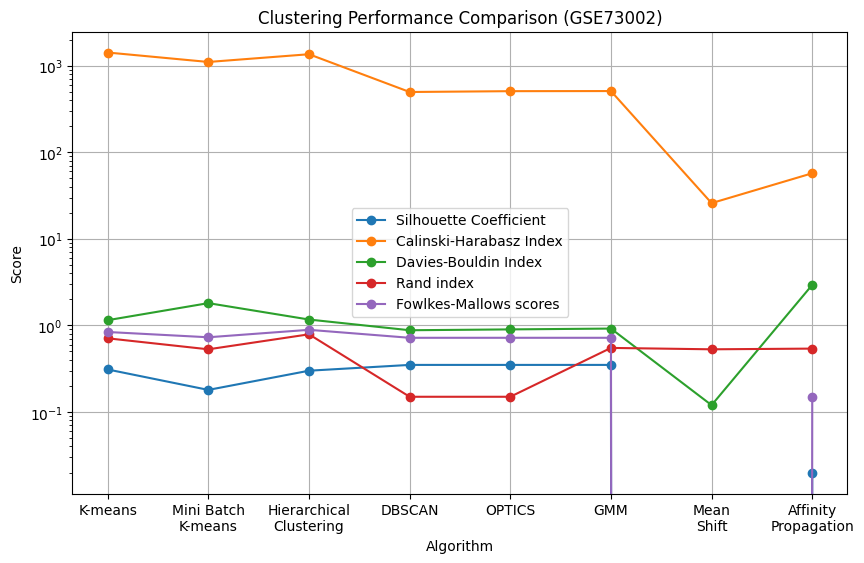

In [407]:
import matplotlib.pyplot as plt

# 聚类指标数据
data = {
    'Silhouette Coefficient': [0.31, 0.18, 0.30, 0.35, 0.35, 0.35, 0.00, 0.02],
    'Calinski-Harabasz Index': [1420.57, 1104.86, 1357.50, 497.17, 508.23, 509.68, 25.87, 57.25],
    'Davies-Bouldin Index': [1.15, 1.81, 1.17, 0.88, 0.90, 0.92, 0.12, 2.94],
    'Rand index': [0.71, 0.53, 0.79, 0.15, 0.15, 0.55, 0.53, 0.54],
    'Fowlkes-Mallows scores': [0.84, 0.73, 0.89,0.72, 0.72, 0.72, 0.00, 0.15]
}

# 聚类算法名称
algorithms = ['K-means', 'Mini Batch\nK-means', 'Hierarchical\nClustering', 'DBSCAN', 'OPTICS', 'GMM', 'Mean\nShift', 'Affinity\nPropagation']

# 绘制折线图
plt.figure(figsize=(10, 6))

for metric, values in data.items():
    plt.plot(algorithms, values, marker='o', label=metric)

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.yscale('log')  # 设置对数刻度
plt.title('Clustering Performance Comparison (GSE73002)')
plt.legend()
plt.grid(True)
plt.show()

## 十三、总结

我通过本次实验，学习及掌握了如下内容：
- 参数调优是一个迭代的过程，需要根据实际情况进行反复尝试和调整。同时，不同算法和模型可能具有不同的参数，因此针对具体的算法和模型，需要参考其文档和相关资料，了解参数的含义和推荐范围。进行参数调优时，可以参考以下几个准则：
    - 经验范围：对于一些常用的参数，可以参考已有的经验范围进行设定（在sklearn官方文档中一般会有说明）。例如，学习率通常在0.01到0.0001之间，决策树的深度通常在5到10之间等。
    - 网格搜索：通过使用网格搜索技术，可以在给定的参数范围内进行全面的搜索和评估。通过定义参数的候选值列表，遍历所有可能的组合，并评估每个组合的性能，从而找到最佳参数组合。
    - 目标指标：根据具体问题的需求和优化目标，选择合适的指标进行评估和比较。例如，对于聚类问题可以使用轮廓系数、Calinski-Harabasz指数或Davies-Bouldin指数等指标。
    - 逐步调优：可以先进行粗略的参数调优，在找到一个较好的参数范围后，再进行更细致的调优。这样可以逐步逼近最佳参数组合，并减少搜索空间。
- 不同聚类算法在原理、参数设置、计算效率上各有千秋，分别适用于不同的聚类场景和数据特征。选择合适的算法取决于数据的性质、聚类目标以及对计算效率和模型解释性的要求：
    - K-means: 简单而高效的聚类算法，通过迭代优化样本与聚类中心之间的距离来进行聚类，适用于大规模数据集和凸形状的聚类簇。
    - Mini Batch K-means: 是对K-means算法的一种优化版本，通过随机选择一部分样本进行更新，加快了算法的收敛速度，适用于大规模数据集。
    - Hierarchical Clustering: 基于样本之间的相似性构建聚类层次结构，具有自底向上（聚合）或自顶向下（分裂）两种方法，可以灵活地处理任意形状的聚类簇。
    - DBSCAN: 基于密度的聚类算法，通过定义样本点周围的密度来划分聚类簇，能够自动发现任意形状和大小的聚类簇，并对噪声数据进行剔除。
    - OPTICS: 是DBSCAN的扩展版本，通过引入“可及性图”来优化聚类结果，能够处理具有不同密度的聚类簇，并提供更灵活的参数选择。
    - GMM (Gaussian Mixture Model): 基于高斯分布建模的聚类算法，假设数据服从多个高斯分布，能够对复杂的数据分布进行建模，适用于混合分布的聚类问题。
    - Mean Shift: 基于样本密度的非参数聚类算法，通过不断更新样本的位置，使其移向密度更高的区域，适用于不规则形状和密度变化的聚类簇。
    - Affinity Propagation: 基于样本之间的相似度进行聚类，不需要预先指定聚类数目，能够自动发现样本的聚类中心，并能够处理噪声和异常数据。

